In [36]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(readr)
library(hrbrthemes)
library(patchwork)
library(zoo)
library(forecast)
library(Metrics)
library(tseries)

In [37]:
# load data
data<-read.csv("/kaggle/input/spiff-data/spiff_data.csv", header=TRUE)

In [38]:
# just as in the data cleaning we replace the outliers with values > 100 by Nan
#replacing outliers by mean for ACF and PACF plot (will set them back to NA after the ACF and PACF plots are visualized)
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
for (i in c(36,1194,2836,3430,4118)) {
  data[c(i-1,i,i+1),] <- na.approx(data[c(i-1,i,i+1),])   
}

In [39]:
ndiffs(data[,3]) # gurkor recommneded differentiations is 1 (same for all other time series as well..)
ndiffs(data[,4])
ndiffs(data[,5])
ndiffs(data[,6])
ndiffs(data[,7])
ndiffs(data[,8])
ndiffs(data[,9])

[1] 1

[1] 1

[1] 1

[1] 1

[1] 1

[1] 1

[1] 1

In [40]:
# Compute log-returns for a more stationary time series
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))

In [41]:
data_lr

X    day  gurkor   guitars  slingshots stocks    sugar    water   
1     0    1   6.154653 2.794285 2.136536   10.653684 3.324896 3.896149
2     1    2   6.189623 2.843068 2.113582   10.674465 3.355736 3.899915
3     2    3   6.168641 2.839644 2.116336   10.822372 3.336461 3.897404
4     3    4   6.156401 2.823384 2.096137   10.848804 3.288274 3.901170
5     4    5   6.124929 2.832798 2.099810   10.860731 3.303694 3.905355
6     5    6   6.145911 2.865319 2.108991   10.816348 3.303694 3.910795
7     6    7   6.152904 2.858473 2.097055   10.960951 3.253579 3.909121
8     7    8   6.152904 2.890138 2.097055   11.195429 3.305621 3.909121
9     8    9   6.159898 2.867031 2.032785   11.095663 3.282492 3.921674
10    9   10   6.184377 2.853338 2.007076   11.134843 3.282492 3.925859
11   10   11   6.236832 2.889283 2.015340   11.262769 3.282492 3.930880
12   11   12   6.240328 2.890138 2.028194   11.021771 3.297911 3.949292
13   12   13   6.268304 2.886715 2.006158   10.831230 3.253579 3.961426
14   13   14   6.329501 2.857617 2.004322   10.760803 3.255507 3.963519
15   14   15   6.296280 2.843924 2.035539   10.682140 3.255507 3.955150
16   15   16   6.282292 2.859329 2.036457   10.629023 3.268999 3.960171
17   16   17   6.289286 2.890138 2.044721   10.485834 3.267072 3.981930
18   17   18   6.331733 2.909823 2.047475   10.435863 3.257434 4.004526
19   18   19   6.324659 2.922660 2.065838   10.396603 3.268999 3.996576
20   19   20   6.356494 2.902976 2.080069   10.297285 3.253579 4.009129
21   20   21   6.374181 2.891850 2.071347   10.395443 3.238160 4.012058
22   21   22   6.342345 2.895273 2.075020   10.200810 3.259286 4.030826
23   22   23   6.351188 2.914958 2.104400   10.187168 3.374523 4.029575
24   23   24   6.322890 2.931218 2.105318   10.148035 3.449427 4.022068
25   24   25   6.305204 2.935497 2.114500   10.373390 3.453269 4.039167
26   25   26   6.303435 2.928651 2.116336   10.162716 3.464792 4.026655
27   26   27   6.246839 2.877301 2.097055   10.142695 3.489760 4.008305
28   27   28   6.225615 2.922660 2.115738   10.048650 3.499363 4.014144
29   28   29   6.269831 2.905543 2.104346    9.657829 3.466713 4.009139
30   29   30   6.287517 2.889509 2.092954    9.609104 3.516649 3.997462
⋮    ⋮    ⋮    ⋮        ⋮        ⋮          ⋮         ⋮        ⋮       
5427 5426 5427 NA       NA       NA         NA        NA       NA      
5428 5427 5428 NA       NA       NA         NA        NA       NA      
5429 5428 5429 NA       NA       NA         NA        NA       NA      
5430 5429 5430 NA       NA       NA         NA        NA       NA      
5431 5430 5431 NA       NA       NA         NA        NA       NA      
5432 5431 5432 NA       NA       NA         NA        NA       NA      
5433 5432 5433 NA       NA       NA         NA        NA       NA      
5434 5433 5434 NA       NA       NA         NA        NA       NA      
5435 5434 5435 NA       NA       NA         NA        NA       NA      
5436 5435 5436 NA       NA       NA         NA        NA       NA      
5437 5436 5437 NA       NA       NA         NA        NA       NA      
5438 5437 5438 NA       NA       NA         NA        NA       NA      
5439 5438 5439 NA       NA       NA         NA        NA       NA      
5440 5439 5440 NA       NA       NA         NA        NA       NA      
5441 5440 5441 NA       NA       NA         NA        NA       NA      
5442 5441 5442 NA       NA       NA         NA        NA       NA      
5443 5442 5443 NA       NA       NA         NA        NA       NA      
5444 5443 5444 NA       NA       NA         NA        NA       NA      
5445 5444 5445 NA       NA       NA         NA        NA       NA      
5446 5445 5446 NA       NA       NA         NA        NA       NA      
5447 5446 5447 NA       NA       NA         NA        NA       NA      
5448 5447 5448 NA       NA       NA         NA        NA       NA      
5449 5448 5449 NA       NA       NA         NA        NA       NA      
5450 5449 5450 NA       NA       NA         N

# (i.) We begin in this notebook with extrapolations without using any interpolated values 

## Gurkor - Water (highly correalted time series)

### 1. Using gurkor to make predictions for water, and using water to make predictions for gurkor

In [42]:
gurkor_lr <- data_lr[,10]    # gurkor 
water_lr <- data_lr[,15] # we want to use information from water when extrapolating for gurkor since they are highly correlated 

which(is.na(gurkor_lr))    #Looking for missing values in gurkor, 5256 is last gurkor value

[1]    1  199  200  201  202  203  204  205  206  207  208  209  210  211  212
 [16]  213  214  215  216  217  218  219  220  221  222  223  224  225  226  227
 [31]  228  229  230  231  232  233  234  235  236  237  238  239  240  241  242
 [46]  243  244  245  246  247  248  249 5257 5258 5259 5260 5261 5262 5263 5264
 [61] 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279
 [76] 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294
 [91] 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309
[106] 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324
[121] 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339
[136] 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354
[151] 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369
[166] 5370 5371 5372 5373 5374 5375 5376 5377 5378 5379 5380 5381 5382 5383 5384
[181] 5385 5386 5387 5388 5389 5390 5391 5392 5393 5394 5395 5396 5397 5398 5399
[196] 5400 5401 5402 5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414
[211] 5415 5416 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429
[226] 5430 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444
[241] 5445 5446 5447 5448 5449 5450 5451 5452 5453 5454 5455 5456

In [43]:
which(is.na(water_lr))    #Looking for missing values in water

[1]    1 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212
 [16] 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227
 [31] 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242
 [46] 1243 1244 1245 1246 1247 1248 1249 5257 5258 5259 5260 5261 5262 5263 5264
 [61] 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279
 [76] 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294
 [91] 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309
[106] 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324
[121] 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339
[136] 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354
[151] 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369
[166] 5370 5371 5372 5373 5374 5375 5376 5377 5378 5379 5380 5381 5382 5383 5384
[181] 5385 5386 5387 5388 5389 5390 5391 5392 5393 5394 5395 5396 5397 5398 5399
[196] 5400 5401 5402 5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414
[211] 5415 5416 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429
[226] 5430 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444
[241] 5445 5446 5447 5448 5449 5450 5451 5452 5453 5454 5455 5456

Since we in this first run only want to use observed data (no interpolated values) we choose to only model the continuous subsections for the 2 time series. We therefore chop off the time periods with data gaps.

In [44]:
# Create a data frame for smoothly omitting the nan where they occur in any of the time series
df <- data.frame(gurkor_lr = gurkor_lr, water_lr = water_lr)
df_clean <- na.omit(df)

gurkor_clean <- df_clean$gurkor_lr
water_clean <- df_clean$water_lr

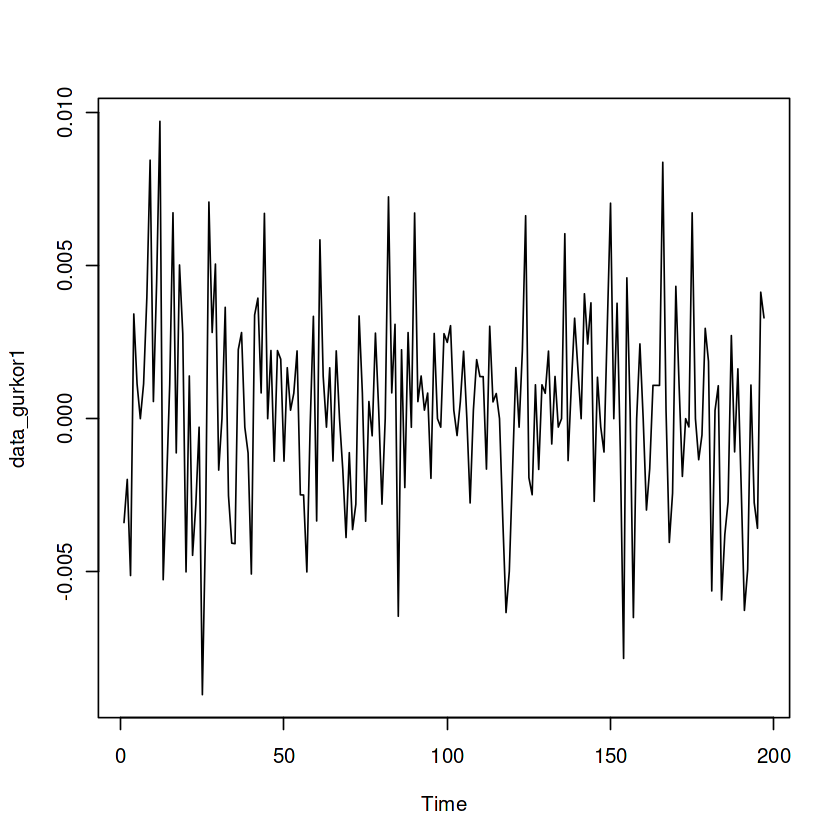

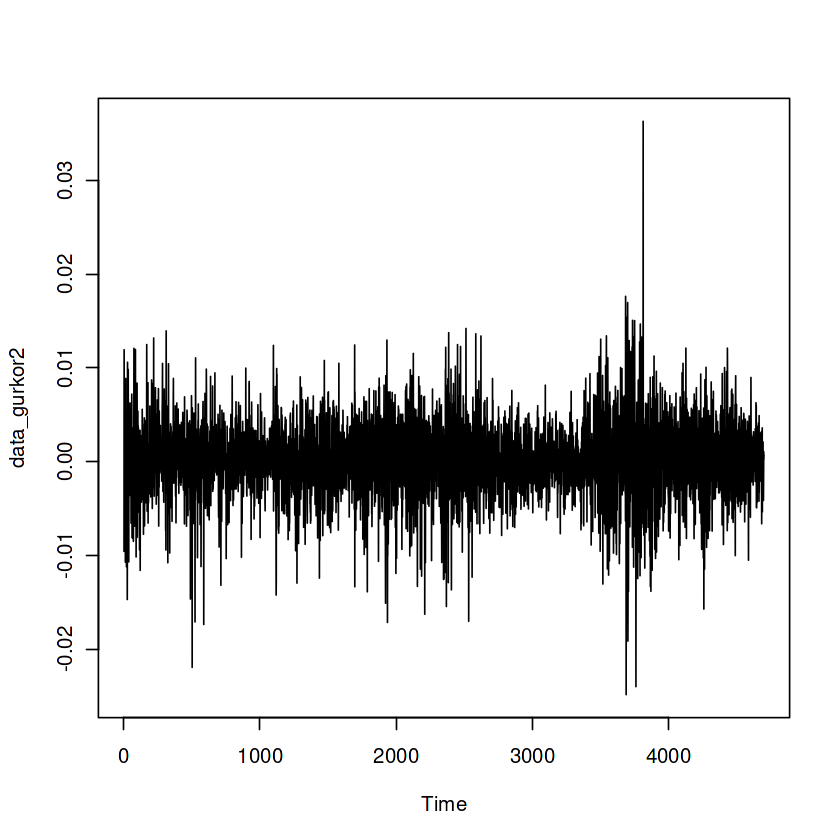

In [45]:
data_gurkor1 <- gurkor_clean[2:198]   #Creating object consisting of values before the NA gap at the beginning of the t.s.
data_gurkor2 <- gurkor_clean[250:4953]   #Creating object consisting of values after the NA gap at the endo of the t.s. (not including the last 200 points that will be used for the testing set).

plot.ts(data_gurkor1)   
plot.ts(data_gurkor2)

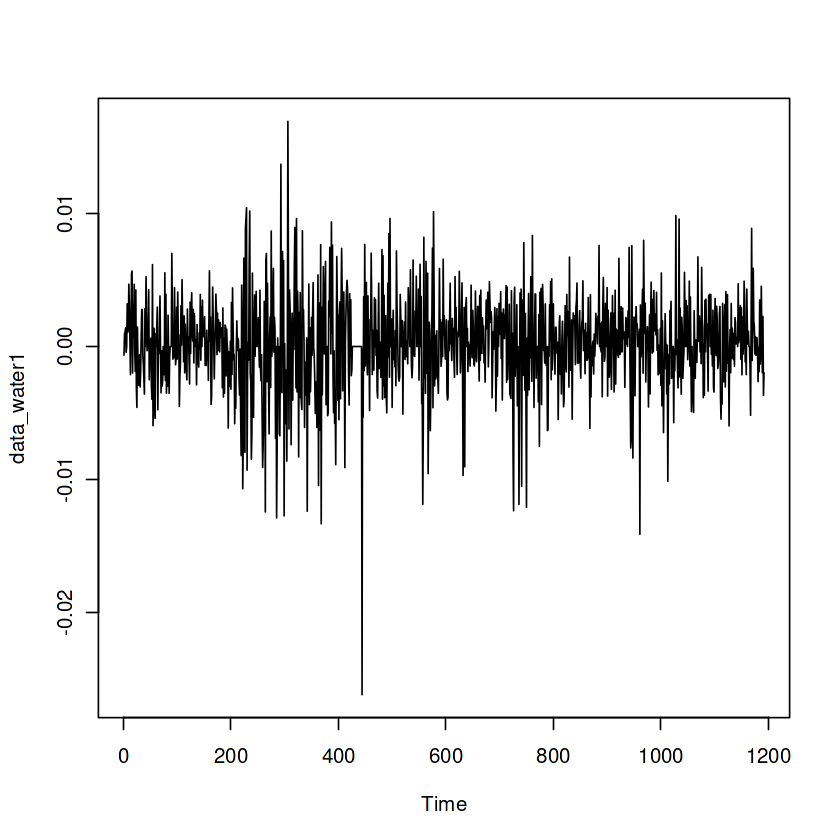

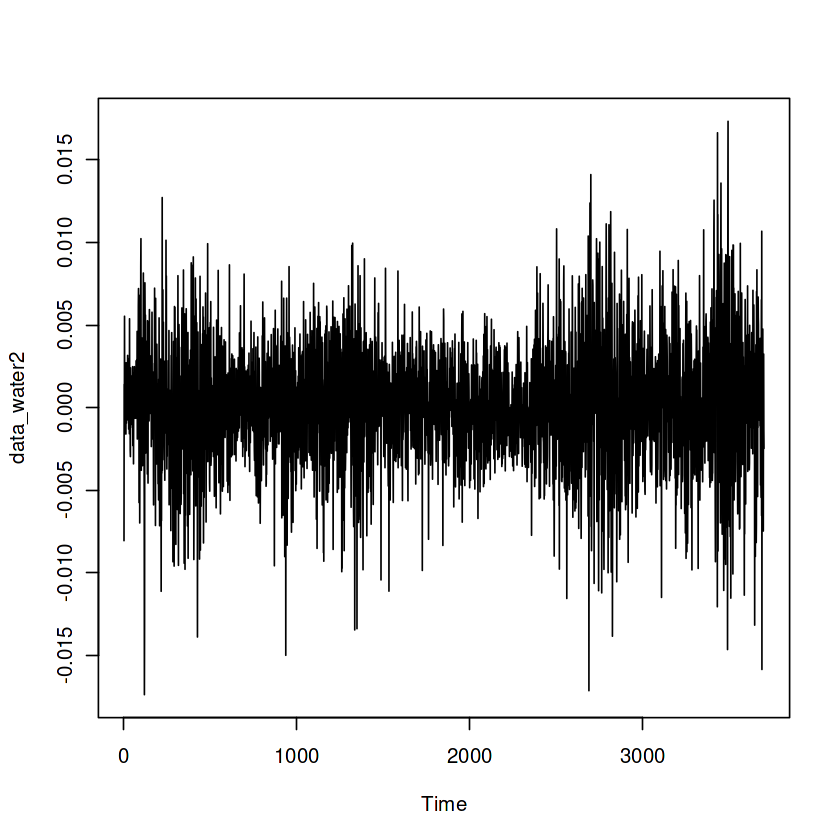

In [46]:
data_water1 <- water_clean[2:1193]  #Creating object consisting of values before the NA gap at the beginning of the t.s.
data_water2 <- water_clean[1250:4953]   #Creating object consisting of values after the NA gap at the endo of the t.s (not including the last 200 points that will be used for the testing set).

plot.ts(data_water1)   
plot.ts(data_water2)

#### 1. Split into train/test/eval for the model fitting and evaluation of the best model approach

In [47]:
index <- 1:(5153 - 200) # to get 200 obs tests set for gurkor and water 
gurkor_train <- gurkor_clean[index]
gurkor_test <- gurkor_clean[-index]   
water_train <- water_clean[index]
water_test <- water_clean[-index]  

#### 2. Look at the ACF and PACF for what param. values for q and p to try out during the model fittings

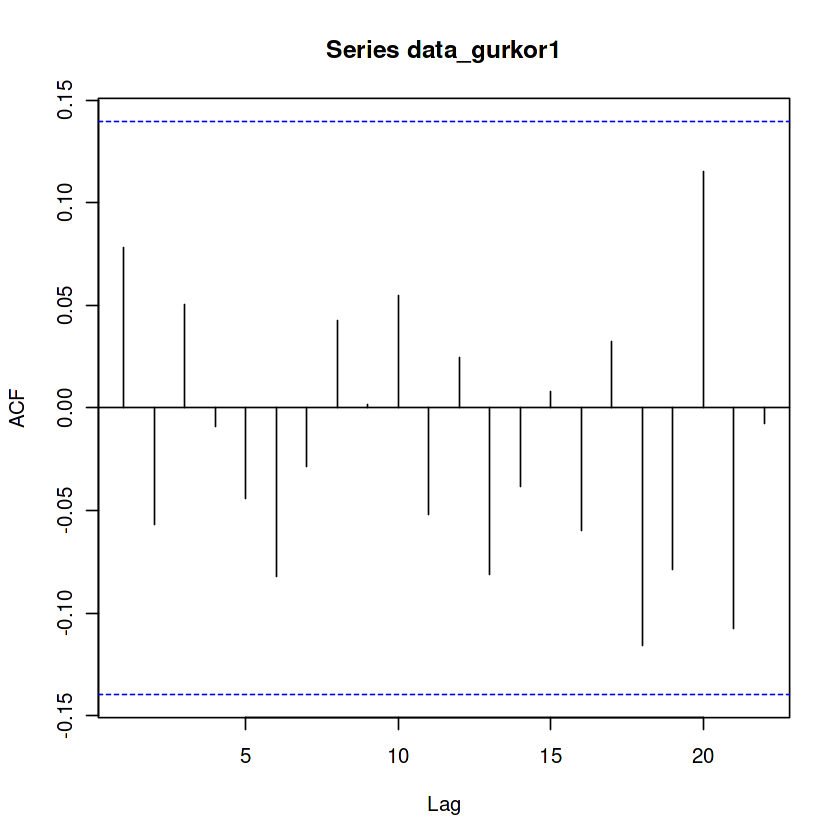

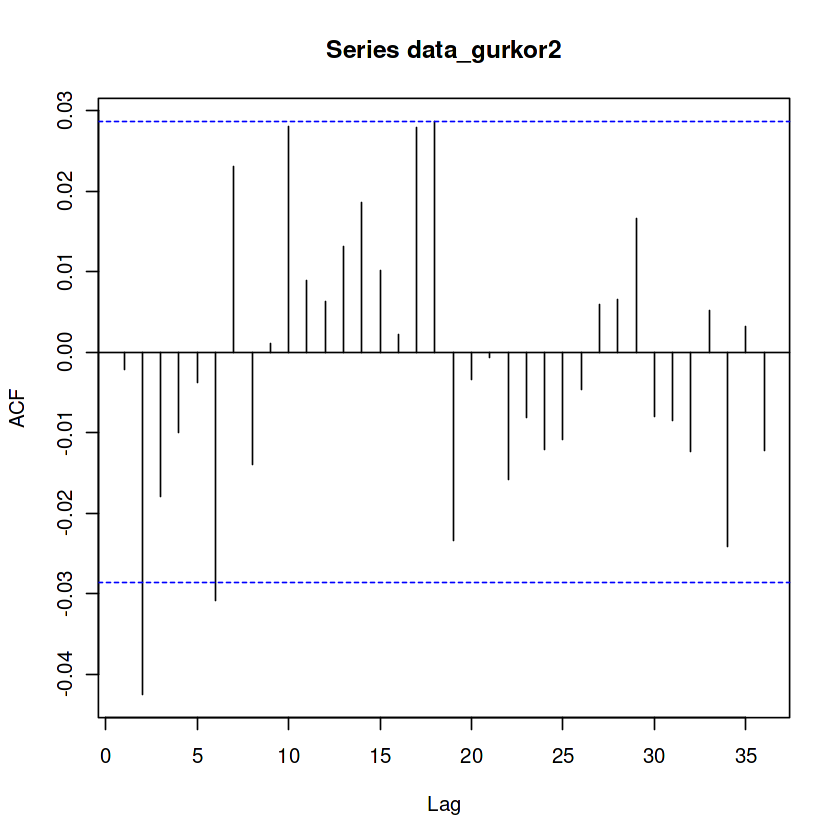

In [48]:
# ACF for gurkor (looking at the time series training data before and after the nan gap separately)
acf(data_gurkor1)  
acf(data_gurkor2)

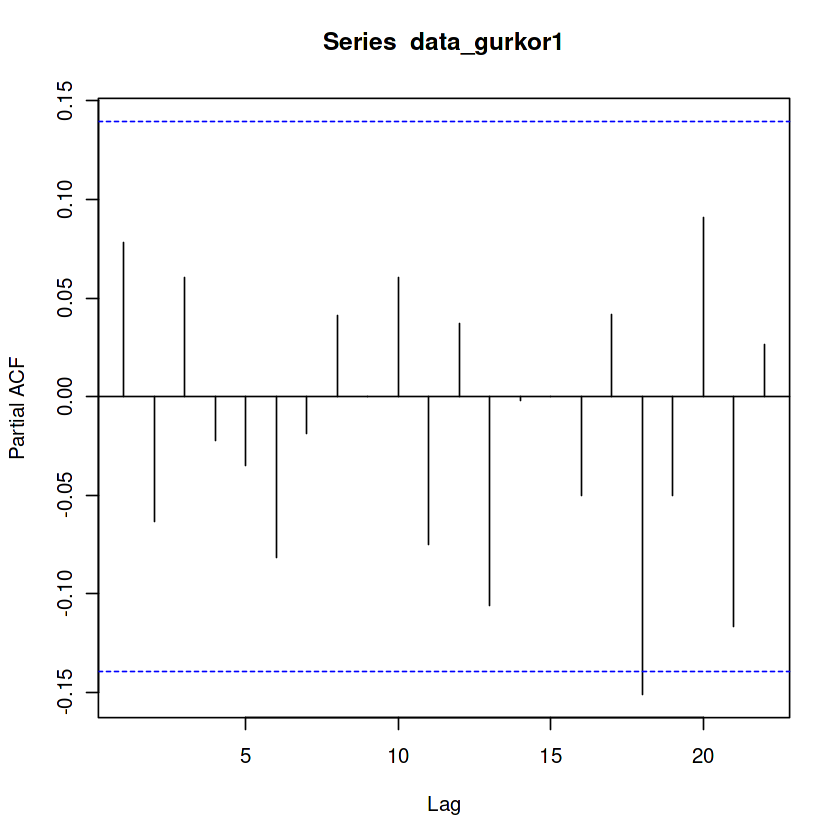

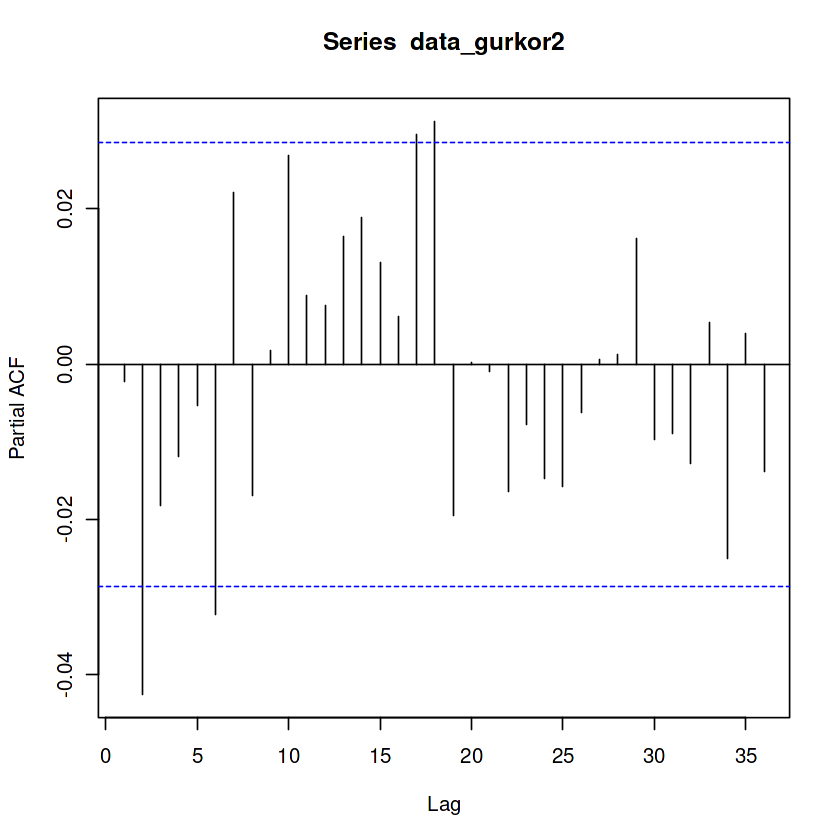

In [49]:
# PACF for gurkor (looking at the time series training data before and after the nan gap separately)
pacf(data_gurkor1)     #Looking at pacf
pacf(data_gurkor2)

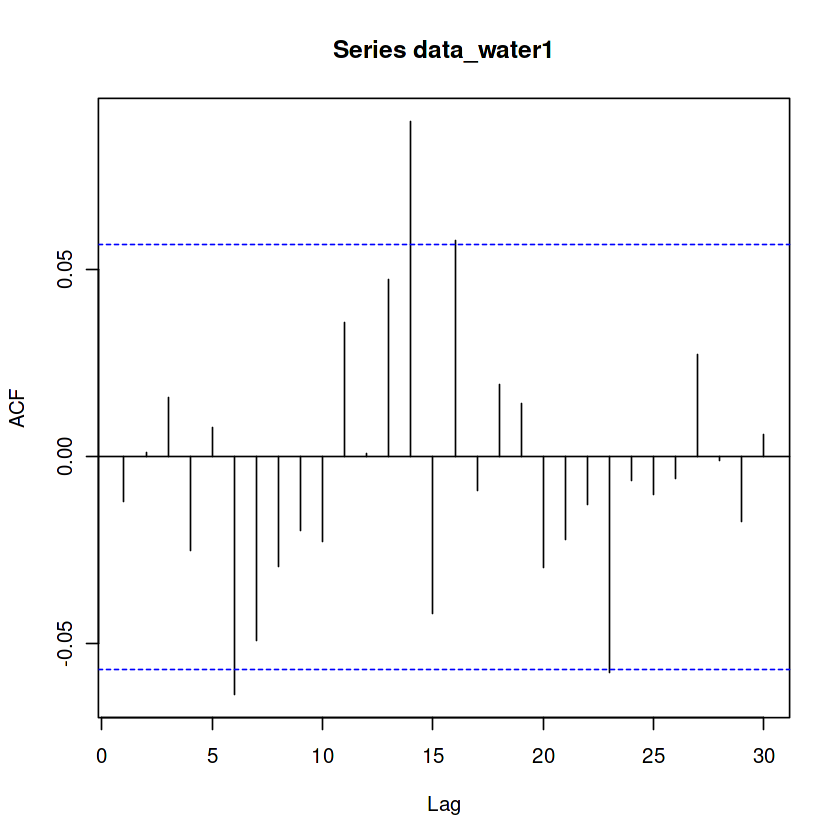

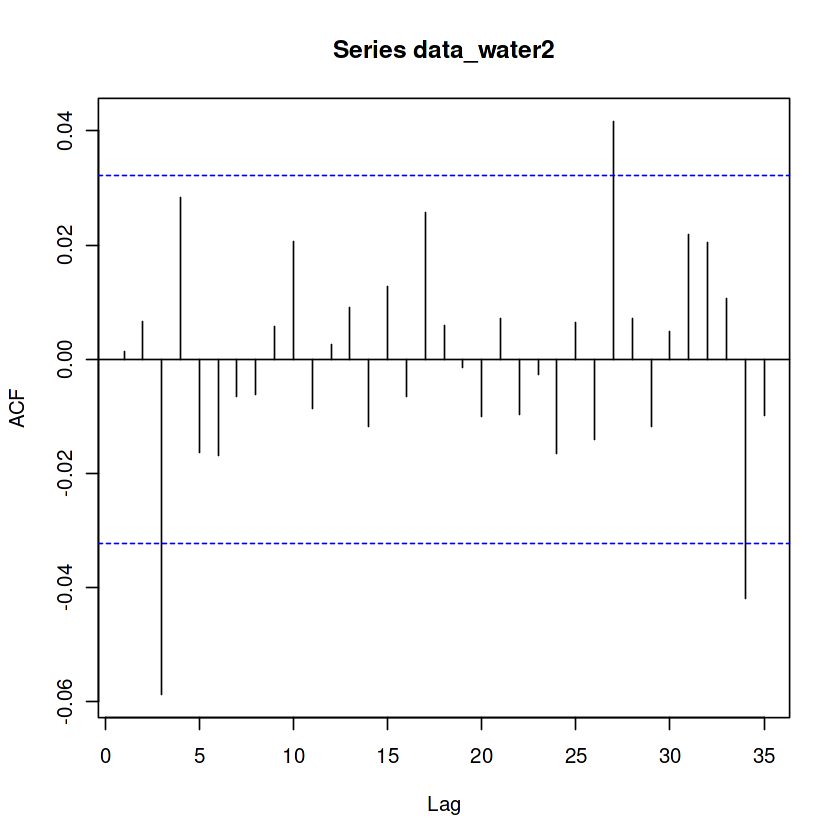

In [50]:
# water (looking at the time series training data before and after the nan gap separately)
acf(data_water1)
acf(data_water2)

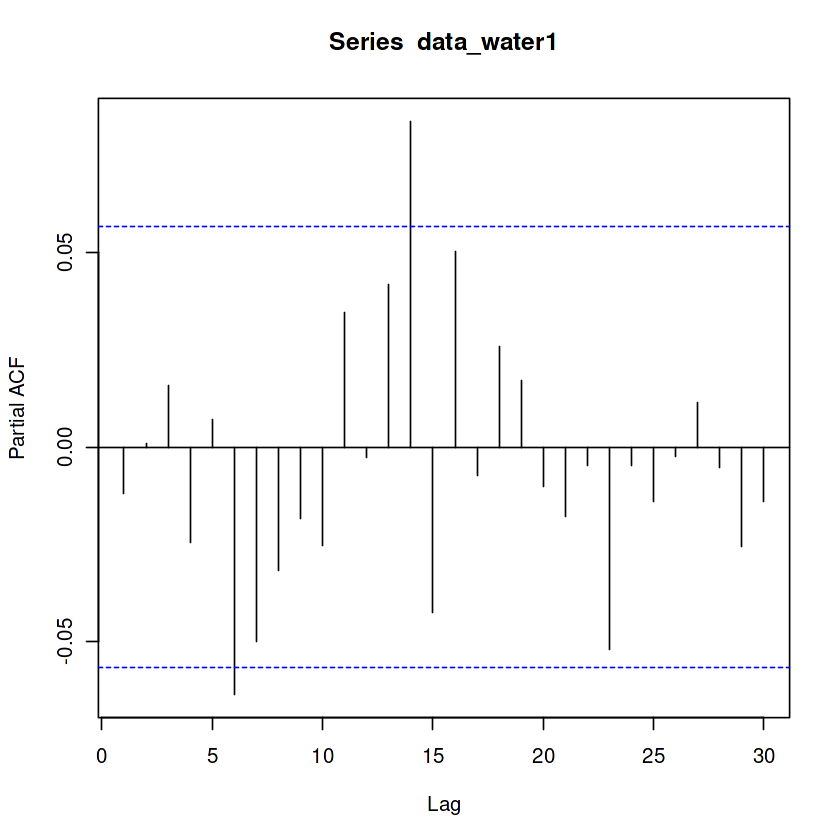

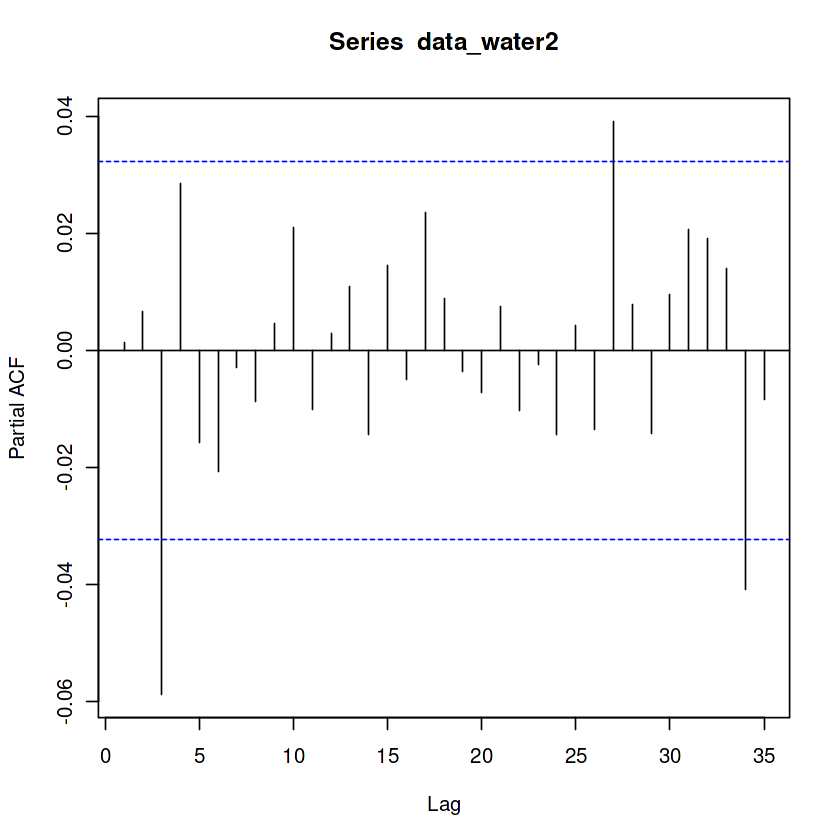

In [51]:
# water (looking at the time series training data before and after the nan gap separately)
pacf(data_water1)
pacf(data_water2)

In [52]:
# we now replace the interpolated values with NA where the outliers with values > 100 were
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))
gurkor_lr <- data_lr[,10]    # gurkor data
water_lr <- data_lr[,15] # water data

# Create a data frame for smoothly omitting the nan where they occur in any of the time series
df <- data.frame(gurkor_lr = gurkor_lr, water_lr = water_lr)
df_clean <- na.omit(df)

gurkor_clean <- df_clean$gurkor_lr
water_clean <- df_clean$water_lr

index <- 1:(5143 - 200) # to get 200 obs of gurkor in test (we have 10 less than before because of the removal of the scattered NA-values)
gurkor_train <- gurkor_clean[index]
gurkor_test <- gurkor_clean[-index] 
water_train <- water_clean[index]
water_test <- water_clean[-index] 


#### gurkor ACF & PACF gives:

- q={0,1,2,3}, (there is a significant spike at 0 in the ACFs but on one occasion a small one at 3 as well so we'll check a few out.)
- p={0} (The PACF seems to be exponnetially decaying and or sinusoidal so we set p=0 )
- d=0 (since we already differentiated by taking the log-returns of the time series)

#### water ACF & PACF gives:

- q={0,1,2,3}, (there is a significant spike at 0 in the ACFs but on one occasion a small one at 3 as well so we'll check a few out.)
- p={0} (The PACF seems to be exponnetially decaying and or sinusoidal so we set p=0 )
- d=0 (since we already differentiated by taking the log-returns of the time series)

As the ADF tests conducted had that all series with the log return transformation were stationary we can assume stationarity

#### 3. Train/fit the models on the training data 

In [53]:
gurk_arma1 <- Arima(gurkor_train, order = c(0,0,0)) 
gurk_arma2 <- Arima(gurkor_train, order = c(0,0,1)) 
gurk_arma3 <- Arima(gurkor_train, order = c(0,0,2)) 
gurk_arma4 <- Arima(gurkor_train, order = c(0,0,3))


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 25.239, df = 10, p-value = 0.00491

Model df: 0.   Total lags used: 10



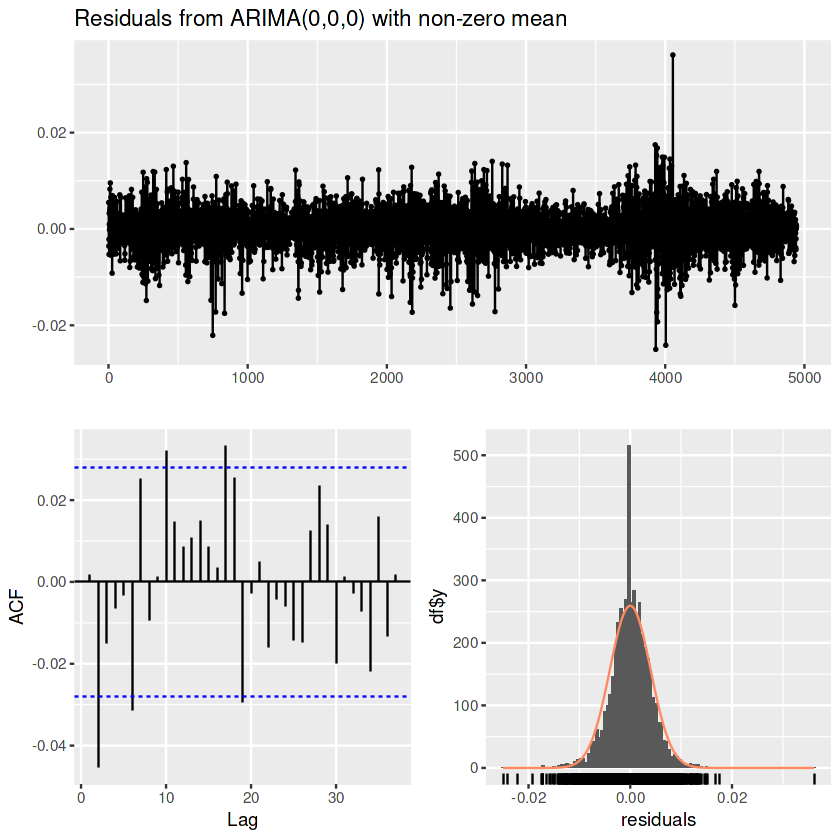


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 25.216, df = 9, p-value = 0.002741

Model df: 1.   Total lags used: 10



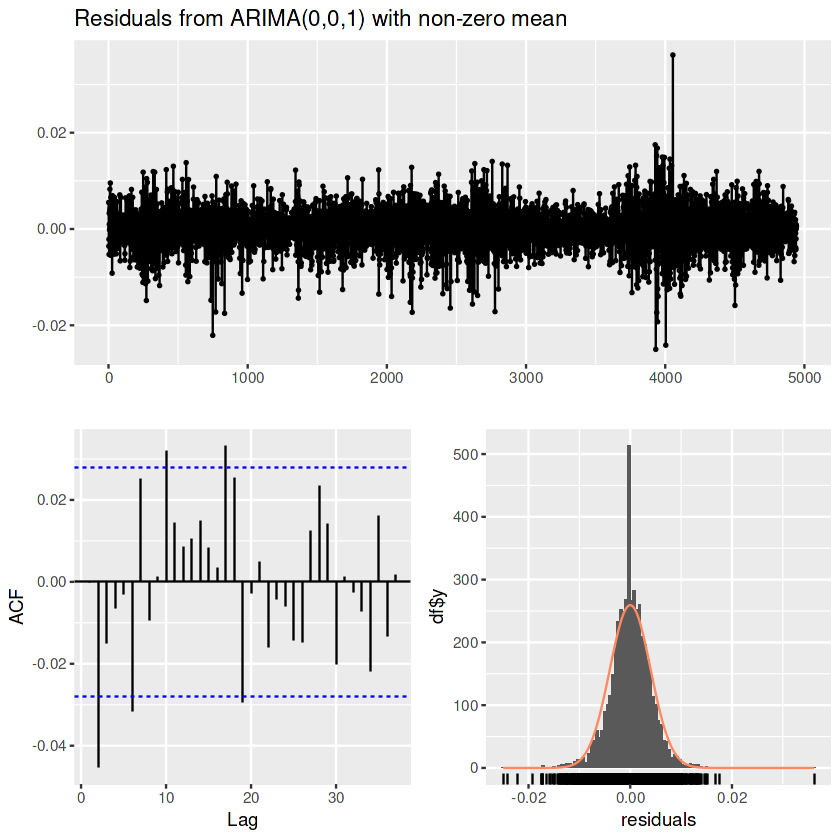


	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 15.437, df = 8, p-value = 0.05119

Model df: 2.   Total lags used: 10



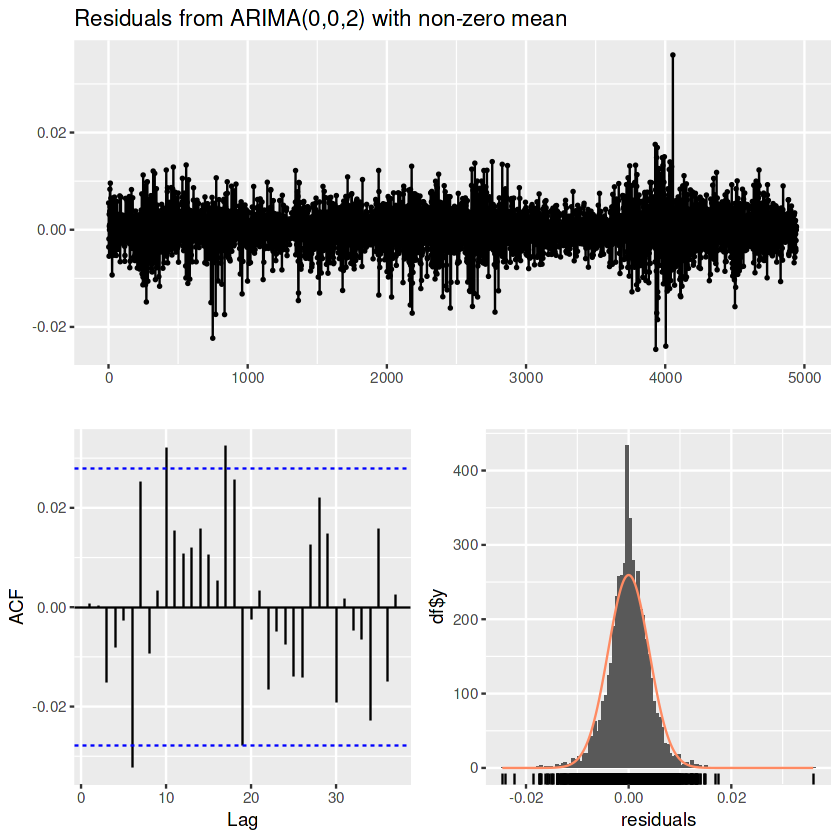


	Ljung-Box test

data:  Residuals from ARIMA(0,0,3) with non-zero mean
Q* = 14.517, df = 7, p-value = 0.04272

Model df: 3.   Total lags used: 10



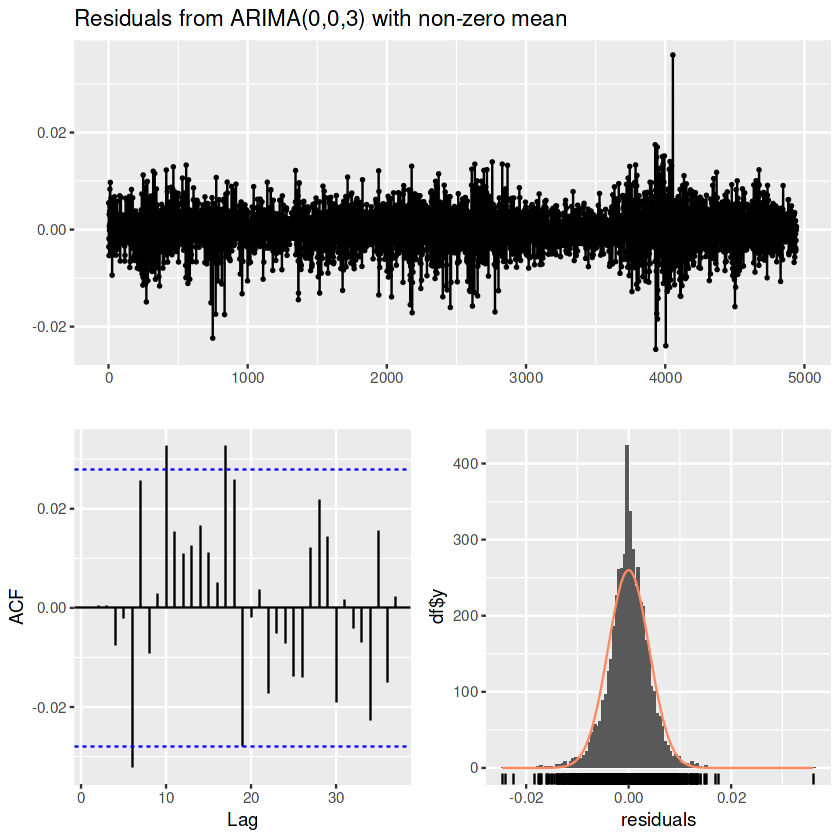

In [54]:
checkresiduals(gurk_arma1)
checkresiduals(gurk_arma2)
checkresiduals(gurk_arma3)
checkresiduals(gurk_arma4)

The ARIMA(0,0,2) model has the best ACF and p-value when comparing the checkresiduals() metrics. We'll use this model for the future modelling of the time series.

In [55]:
# looking at the model chosen by auto.arima as well, it chooses the same model as we prevoiusly found
opt_fit <- auto.arima(gurkor_train)
opt_fit

Series: gurkor_train 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
         ma1      ma2   mean
      0.0005  -0.0464  2e-04
s.e.  0.0142   0.0144  1e-04

sigma^2 = 1.603e-05:  log likelihood = 20275.73
AIC=-40543.45   AICc=-40543.44   BIC=-40517.43

Using auto.arima() we get the same optimal order-values. We'll continue modelling the time series as a ARIMA(0,0,2) model.

In [56]:
# Looking at the information criterions for comparing the arima model
gurk_arma3

Series: gurkor_train 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
         ma1      ma2   mean
      0.0005  -0.0464  2e-04
s.e.  0.0142   0.0144  1e-04

sigma^2 = 1.603e-05:  log likelihood = 20275.73
AIC=-40543.45   AICc=-40543.44   BIC=-40517.43

Now looking at water ARMA models

In [57]:
water_arma1 <- Arima(water_train, order = c(0,0,0)) 
water_arma2 <- Arima(water_train, order = c(0,0,1)) 
water_arma3 <- Arima(water_train, order = c(0,0,2)) 
water_arma4 <- Arima(water_train, order = c(0,0,3))


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 15.862, df = 10, p-value = 0.1036

Model df: 0.   Total lags used: 10



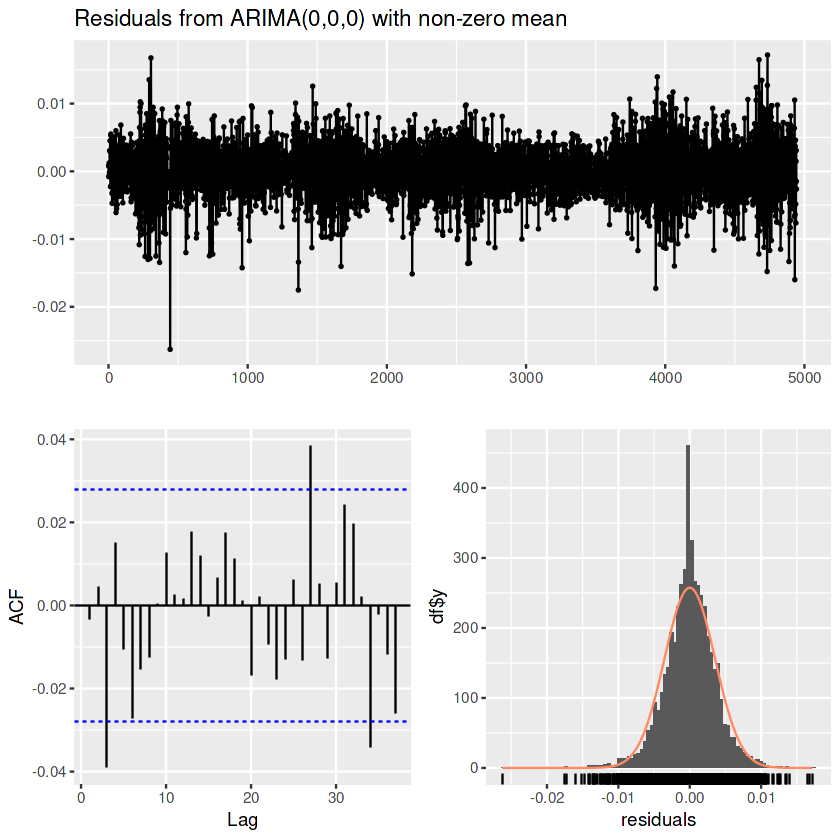


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 15.805, df = 9, p-value = 0.07106

Model df: 1.   Total lags used: 10



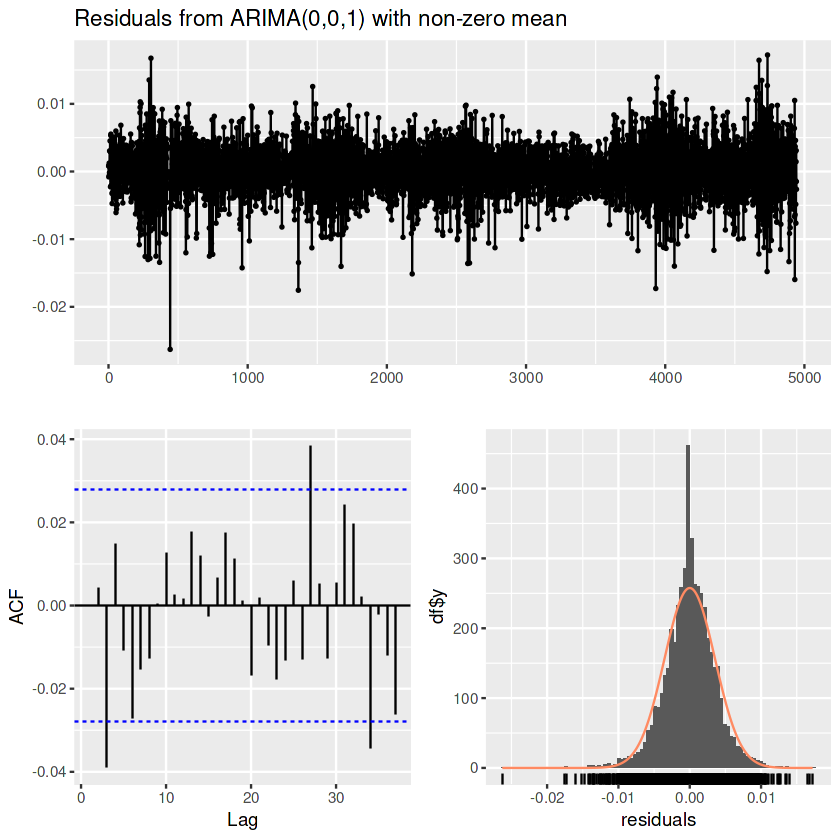


	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 15.687, df = 8, p-value = 0.04708

Model df: 2.   Total lags used: 10



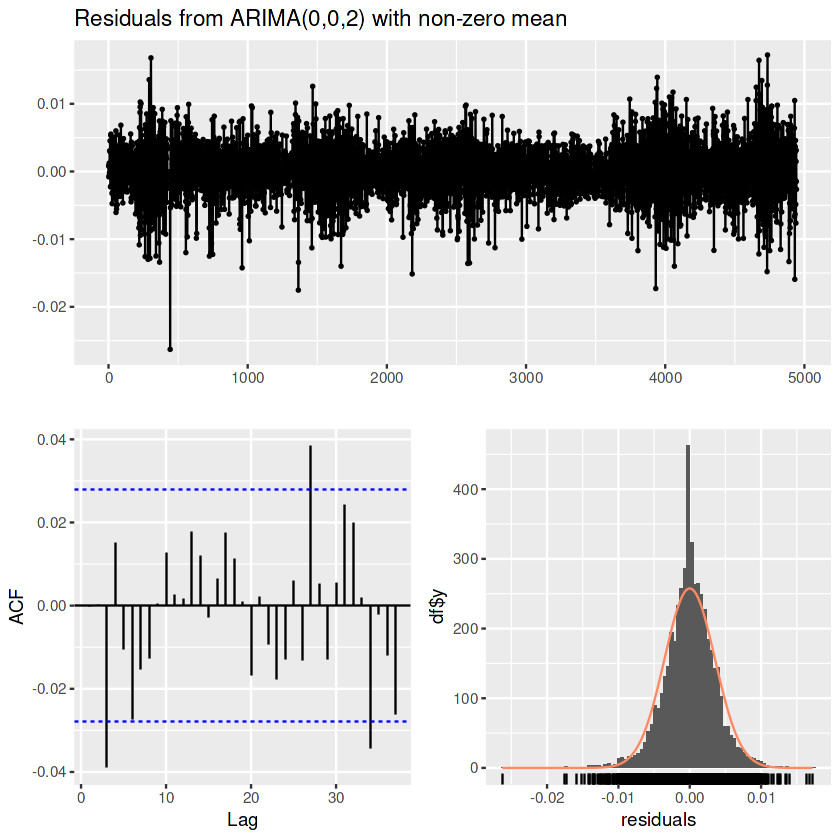


	Ljung-Box test

data:  Residuals from ARIMA(0,0,3) with non-zero mean
Q* = 8.0345, df = 7, p-value = 0.3296

Model df: 3.   Total lags used: 10



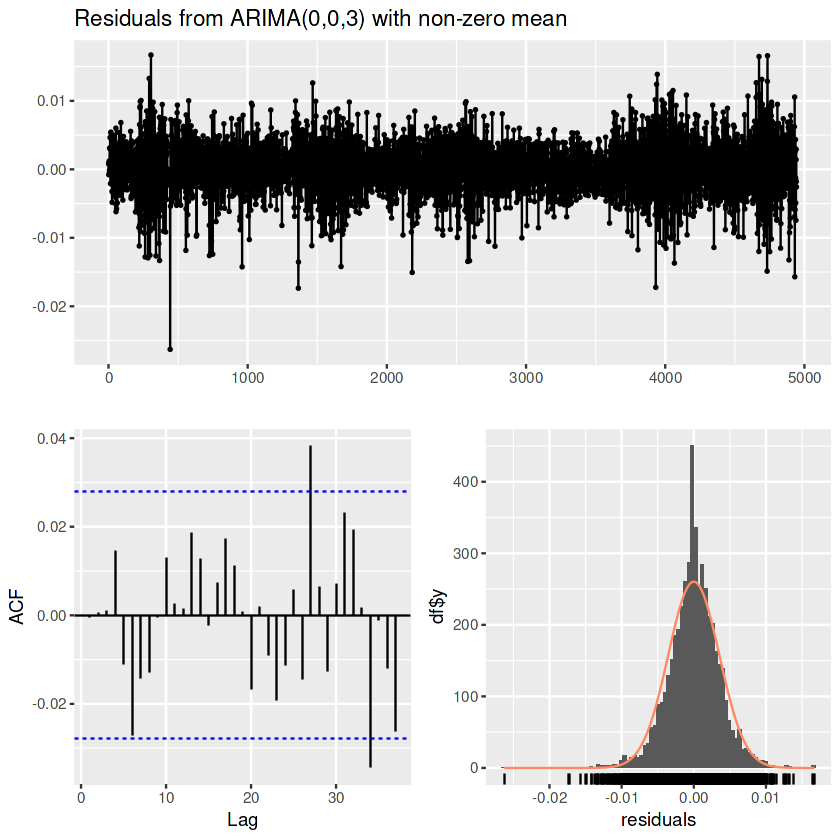

In [58]:
checkresiduals(water_arma1)
checkresiduals(water_arma2)
checkresiduals(water_arma3)
checkresiduals(water_arma4)

In [59]:
# looking at the model chosen by auto.arima as well, it chooses the same model as we prevoiusly found
opt_fit <- auto.arima(water_train)
opt_fit

Series: water_train 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
       mean
      2e-04
s.e.  1e-04

sigma^2 = 1.255e-05:  log likelihood = 20879.26
AIC=-41754.52   AICc=-41754.52   BIC=-41741.51

In [60]:
# Looking at the information criterions for comparing the arima model with accebtable p-value
water_arma1
water_arma2
water_arma4

Series: water_train 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
       mean
      2e-04
s.e.  1e-04

sigma^2 = 1.255e-05:  log likelihood = 20879.26
AIC=-41754.52   AICc=-41754.52   BIC=-41741.51

Series: water_train 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1   mean
      -0.0034  2e-04
s.e.   0.0142  1e-04

sigma^2 = 1.255e-05:  log likelihood = 20879.29
AIC=-41752.58   AICc=-41752.57   BIC=-41733.06

Series: water_train 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
          ma1     ma2      ma3   mean
      -0.0021  0.0033  -0.0413  2e-04
s.e.   0.0142  0.0140   0.0146  1e-04

sigma^2 = 1.254e-05:  log likelihood = 20883.31
AIC=-41756.62   AICc=-41756.6   BIC=-41724.09

#### 4. If the series has a high correlation with another model, we make an additional set of models that use the same set up as was tried in 3. but now using the ARIMAX model version using the predictions from the correlated model as an additional input to the models 

Now using the order values found for the ARMA/ARIMA model we use ARIMAX for incorporating the information from both time series into one for the forecasting

In [61]:
library(TSA)

# use our best model ARIMA(0,0,2) to predict 200 future points for gurkor
pred <- forecast(gurk_arma3,200) # create pred for all 200 points
# Add in the forecasted 200 points for the gurkor time series for the ARIMAX model predictions for water
additional_gurkor_200 <- pred$mean
# Fit ARIMAX model for water (water doesnt have any seasonality so we just use the non-seasonal orders)
water_arimax <- arimax(water_train, xreg=gurkor_train, order=c(0,0,2))

water_residuals_arimax <- residuals(water_arimax)

In [62]:

# use our best model ARIMA(0,0,0) to predict 200 future points for gurkor
pred <- forecast(water_arma1,200) # create pred for all 200 points
# Add in the forecasted 200 points for the gurkor time series for the ARIMAX model predictions for water
additional_water_200 <- pred$mean
# Fit ARIMAX model for water (gurkor doesnt have any seasonality so we just use the non-seasonal orders)
gurkor_arimax <- arimax(gurkor_train, xreg=water_train, order=c(0,0,2))

gurkor_residuals_arimax <- residuals(gurkor_arimax)

#### 5. For capturing volatility in the models an additional set of models are produced using the training data with GARCH and the model makeups from 3. and 4. as additional models to evaluate for performance in order to find the best model fit for the time series currently being investigated 

Incorporating this ARIMAX models residuals into a GARCH model for volatility modelling as well

In [63]:
library(rugarch)

# Fit GARCH(1,1) model (simplest as the first GARCH model) to residuals from ARIMAX
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(0,0), include.mean = TRUE, external.regressors = matrix(gurkor_train, ncol = 1))
)
water_garch <- ugarchfit(spec, data = water_residuals_arimax)


In [64]:
# Fit GARCH(1,1) model (simplest as the first GARCH model) to residuals from ARIMAX
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(0,2), include.mean = TRUE, external.regressors = matrix(water_train, ncol = 1))
)
gurkor_garch <- ugarchfit(spec, data = gurkor_residuals_arimax)

#### 6. Using the test/evaluation set we now evaluate which of the models collected up to now that makes the best fit on the actual data. The best performing model will be chosen for predicting the extrapolated 200 point.

In [65]:
# We have 3 different models for water forecasting to be evaluated on the test set to find the best performing model for forecasting
water_arma1
water_arimax
water_garch

Series: water_train 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
       mean
      2e-04
s.e.  1e-04

sigma^2 = 1.255e-05:  log likelihood = 20879.26
AIC=-41754.52   AICc=-41754.52   BIC=-41741.51


Call:
arimax(x = water_train, order = c(0, 0, 2), xreg = gurkor_train)

Coefficients:
          ma1      ma2  intercept    xreg
      -0.1292  -0.0088      1e-04  0.5209
s.e.   0.0144   0.0142      0e+00  0.0104

sigma^2 estimated as 8.332e-06:  log likelihood = 21891.51,  aic = -43775.01


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000002    0.000035   0.066845  0.94671
mxreg1 -0.009648    0.009714  -0.993236  0.32060
omega   0.000000    0.000000   0.230794  0.81747
alpha1  0.033708    0.001480  22.776325  0.00000
beta1   0.962352    0.001214 793.037765  0.00000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000002    0.000038  0.061632  0.95086
mxreg1 -0.009648    0.014742 -0.654476  0.51280
omega   0.000000    0.000007  0.004642  0.99630
alpha1  0.033708    0.023818  1.415238  0.15700
beta1   0.962352    0.024697 38.966171  0.00000

LogLikelihood : 22305.09 

Information Criteria
-----------------------------------

In [66]:
# We have 3 different models for gurkor forecasting to be evaluated on the test set to find the best performing model for forecasting
gurk_arma3
gurkor_arimax
gurkor_garch

Series: gurkor_train 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
         ma1      ma2   mean
      0.0005  -0.0464  2e-04
s.e.  0.0142   0.0144  1e-04

sigma^2 = 1.603e-05:  log likelihood = 20275.73
AIC=-40543.45   AICc=-40543.44   BIC=-40517.43


Call:
arimax(x = gurkor_train, order = c(0, 0, 2), xreg = water_train)

Coefficients:
          ma1      ma2  intercept    xreg
      -0.1305  -0.0546      1e-04  0.6658
s.e.   0.0144   0.0144      0e+00  0.0132

sigma^2 estimated as 1.063e-05:  log likelihood = 21290.38,  aic = -42572.76


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000000    0.000040   0.002593  0.99793
ma1     0.004571    0.015039   0.303926  0.76118
ma2     0.006978    0.014801   0.471468  0.63731
mxreg1  0.001815    0.013155   0.137944  0.89028
omega   0.000000    0.000000   0.246492  0.80530
alpha1  0.041066    0.002566  16.005675  0.00000
beta1   0.955530    0.002228 428.913834  0.00000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000000    0.000045  0.002310  0.99816
ma1     0.004571    0.016492  0.277152  0.78166
ma2     0.006978    0.014673  0.475579  0.63437
mxreg1  0.001815    0.024473  0.074146  0.94089
omega   0.000000    0.000006  0.00

### How do the models perform on the test data

In [67]:
# Water ARMA evaluation on test data
pred_opt <- forecast(water_arma1,200) # create pred for 200 points to evaluatea against the test data (of size 200)
water_pred_values_arma <- as.numeric(pred_opt$mean)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
water_arma_mae <- mean(abs(water_test - water_pred_values_arma))
# Root Mean Squared Error
water_arma_rmse <- sqrt(mean((water_test - water_pred_values_arma)^2))

water_arma_aic <- AIC(water_arma1)
water_arma_bic <- BIC(water_arma1)

In [68]:
# Water ARIMAX evaluation on test data
water_arimax_forecast <- predict(water_arimax, n.ahead = 200, newxreg = as.matrix(additional_gurkor_200))
water_pred_values_arimax <- as.numeric(water_arimax_forecast$pred)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
water_arimax_mae <- mean(abs(water_test - water_pred_values_arimax))
# Root Mean Squared Error
water_arimax_rmse <- sqrt(mean((water_test - water_pred_values_arimax)^2))

water_arimax_aic <- AIC(water_arimax)
water_arimax_bic <- BIC(water_arimax)

In [69]:
# Water GARCH evaluation on test data
water_garch_forecast <- ugarchforecast(water_garch, n.ahead = 200, external.forecasts = list(mregfor = matrix(additional_gurkor_200, ncol = 1)))
water_pred_values_garch <- as.numeric(fitted(water_garch_forecast))

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
water_garch_mae <- mean(abs(water_test - water_pred_values_garch))
# Root Mean Squared Error
water_garch_rmse <- sqrt(mean((water_test - water_pred_values_garch)^2))
ic <- infocriteria(water_garch)
water_garch_aic <- ic[1]
water_garch_bic <- ic[2]

In [70]:
rmse_values <- c(water_arma_rmse, water_arimax_rmse, water_garch_rmse)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(rmse_values)]
cat("Best model based on RMSE is:", best_model, "\n")


Best model based on RMSE is: ARIMAX 


In [71]:
mae_values <- c(water_arma_mae, water_arimax_mae, water_garch_mae)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(mae_values)]
cat("Best model based on MAE is:", best_model, "\n")


Best model based on MAE is: ARIMAX 


In [72]:
aic_values <- c(water_arma_aic, water_arimax_aic, water_garch_aic)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(aic_values)]
cat("Best model based on AIC is:", best_model, "\n")

Best model based on AIC is: ARIMAX 


In [73]:
bic_values <- c(water_arma_bic, water_arimax_bic, water_garch_bic)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(bic_values)]
cat("Best model based on BIC is:", best_model, "\n")

Best model based on BIC is: ARIMAX 


The best performing model for water by majority is: arimax

In [74]:
# Gurkor ARMA evaluation on test data
pred_opt <- forecast(gurk_arma3,200) # create pred for 200 points to evaluatea against the test data (of size 200)
gurkor_pred_values_arma <- as.numeric(pred_opt$mean)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
gurkor_arma_mae <- mean(abs(gurkor_test - gurkor_pred_values_arma))
# Root Mean Squared Error
gurkor_arma_rmse <- sqrt(mean((gurkor_test - gurkor_pred_values_arma)^2))

gurkor_arma_aic <- AIC(gurk_arma3)
gurkor_arma_bic <- BIC(gurk_arma3)

In [75]:
# Gurkor ARIMAX evaluation on test data
gurkor_arimax_forecast <- predict(gurkor_arimax, n.ahead = 200, newxreg = as.matrix(additional_water_200))
gurkor_pred_values_arimax <- as.numeric(gurkor_arimax_forecast$pred)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
gurkor_arimax_mae <- mean(abs(gurkor_test - gurkor_pred_values_arimax))
# Root Mean Squared Error
gurkor_arimax_rmse <- sqrt(mean((gurkor_test - gurkor_pred_values_arimax)^2))

gurkor_arimax_aic <- AIC(gurkor_arimax)
gurkor_arimax_bic <- BIC(gurkor_arimax)

In [76]:
# Gurkor GARCH evaluation on test data
gurkor_garch_forecast <- ugarchforecast(gurkor_garch, n.ahead = 200)
gurkor_pred_values_garch <- as.numeric(fitted(gurkor_garch_forecast))

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
gurkor_garch_mae <- mean(abs(gurkor_test - gurkor_pred_values_garch))
# Root Mean Squared Error
gurkor_garch_rmse <- sqrt(mean((gurkor_test - gurkor_pred_values_garch)^2))
ic <- infocriteria(gurkor_garch)
gurkor_garch_aic <- ic[1]
gurkor_garch_bic <- ic[2]

In [77]:
rmse_values <- c(gurkor_arma_rmse, gurkor_arimax_rmse, gurkor_garch_rmse)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(rmse_values)]
cat("Best model based on RMSE is:", best_model, "\n")


Best model based on RMSE is: GARCH 


In [78]:
mae_values <- c(gurkor_arma_mae, gurkor_arimax_mae, gurkor_garch_mae)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(mae_values)]
cat("Best model based on MAE is:", best_model, "\n")


Best model based on MAE is: ARMA 


In [79]:
aic_values <- c(gurkor_arma_aic, gurkor_arimax_aic, gurkor_garch_aic)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(aic_values)]
cat("Best model based on AIC is:", best_model, "\n")

Best model based on AIC is: ARIMAX 


In [80]:
bic_values <- c(gurkor_arma_bic, gurkor_arimax_bic, gurkor_garch_bic)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(bic_values)]
cat("Best model based on BIC is:", best_model, "\n")

Best model based on BIC is: ARIMAX 


The best performing model for gurkor by majority is: arimax

#########################################################################

### Now forecasting using the best models for each time series

## Guitars - Slingshots (highly correlated time series)

### 1. Using slingshots to make predictions for guitars

In [89]:
# for acf and pacf plots we once again use interpolated values for the scattered NA values
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
for (i in c(36,1194,2836,3430,4118)) {
  data[c(i-1,i,i+1),] <- na.approx(data[c(i-1,i,i+1),])   
}
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))

In [90]:
guitars_lr <- data_lr[,11]
slingshots_lr <- data_lr[,12]
which(is.na(guitars_lr))

[1]    1  399  400  401  402  403  404  405  406  407  408  409  410  411  412
 [16]  413  414  415  416  417  418  419  420  421  422  423  424  425  426  427
 [31]  428  429  430  431  432  433  434  435  436  437  438  439  440  441  442
 [46]  443  444  445  446  447  448  449 5257 5258 5259 5260 5261 5262 5263 5264
 [61] 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279
 [76] 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294
 [91] 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309
[106] 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324
[121] 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339
[136] 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354
[151] 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369
[166] 5370 5371 5372 5373 5374 5375 5376 5377 5378 5379 5380 5381 5382 5383 5384
[181] 5385 5386 5387 5388 5389 5390 5391 5392 5393 5394 5395 5396 5397 5398 5399
[196] 5400 5401 5402 5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414
[211] 5415 5416 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429
[226] 5430 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444
[241] 5445 5446 5447 5448 5449 5450 5451 5452 5453 5454 5455 5456

In [91]:
which(is.na(slingshots_lr))

[1]    1  599  600  601  602  603  604  605  606  607  608  609  610  611  612
 [16]  613  614  615  616  617  618  619  620  621  622  623  624  625  626  627
 [31]  628  629  630  631  632  633  634  635  636  637  638  639  640  641  642
 [46]  643  644  645  646  647  648  649 5257 5258 5259 5260 5261 5262 5263 5264
 [61] 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279
 [76] 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294
 [91] 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309
[106] 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324
[121] 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339
[136] 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354
[151] 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369
[166] 5370 5371 5372 5373 5374 5375 5376 5377 5378 5379 5380 5381 5382 5383 5384
[181] 5385 5386 5387 5388 5389 5390 5391 5392 5393 5394 5395 5396 5397 5398 5399
[196] 5400 5401 5402 5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414
[211] 5415 5416 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429
[226] 5430 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444
[241] 5445 5446 5447 5448 5449 5450 5451 5452 5453 5454 5455 5456

In [92]:
# Create a data frame for smoothly omitting the nan where they occur in any of the time series
df <- data.frame(guitars_lr = guitars_lr, slingshots_lr = slingshots_lr)
df_clean <- na.omit(df)

guitars_clean <- df_clean$guitars_lr
slingshots_clean <- df_clean$slingshots_lr

#### 1. Split into train/test/eval for the model fitting and evaluation of the best model approach

In [93]:
index <- 1:(5153 - 200) # to get 200 obs of guitars in test 
guitars_train <- guitars_clean[index]
guitars_test <- guitars_clean[-index]  
slingshots_train <- slingshots_clean[index]
slingshots_test <- slingshots_clean[-index] 

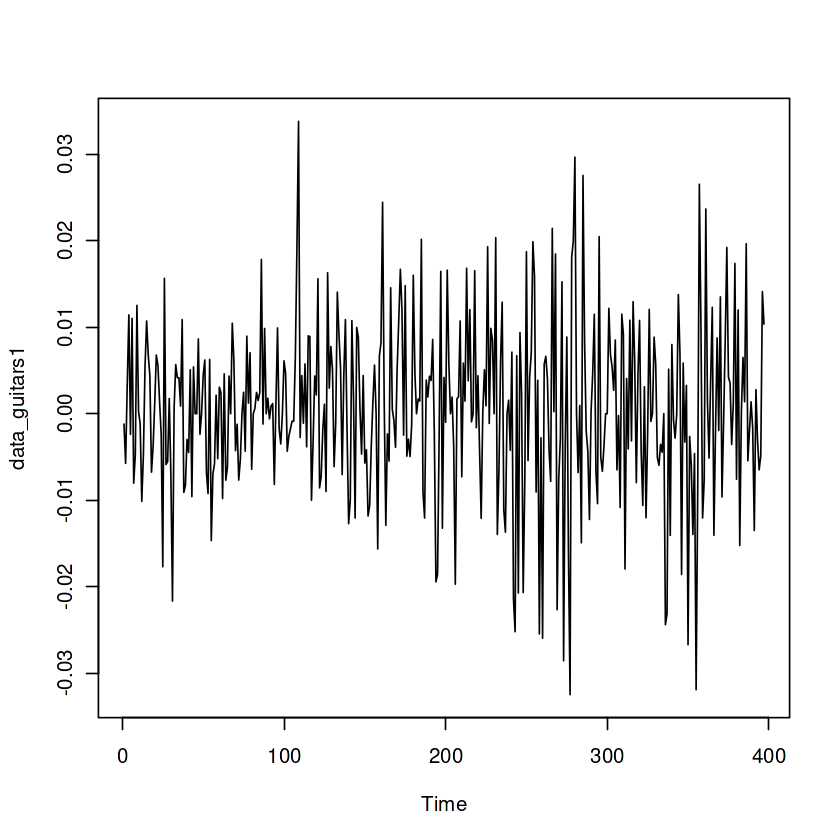

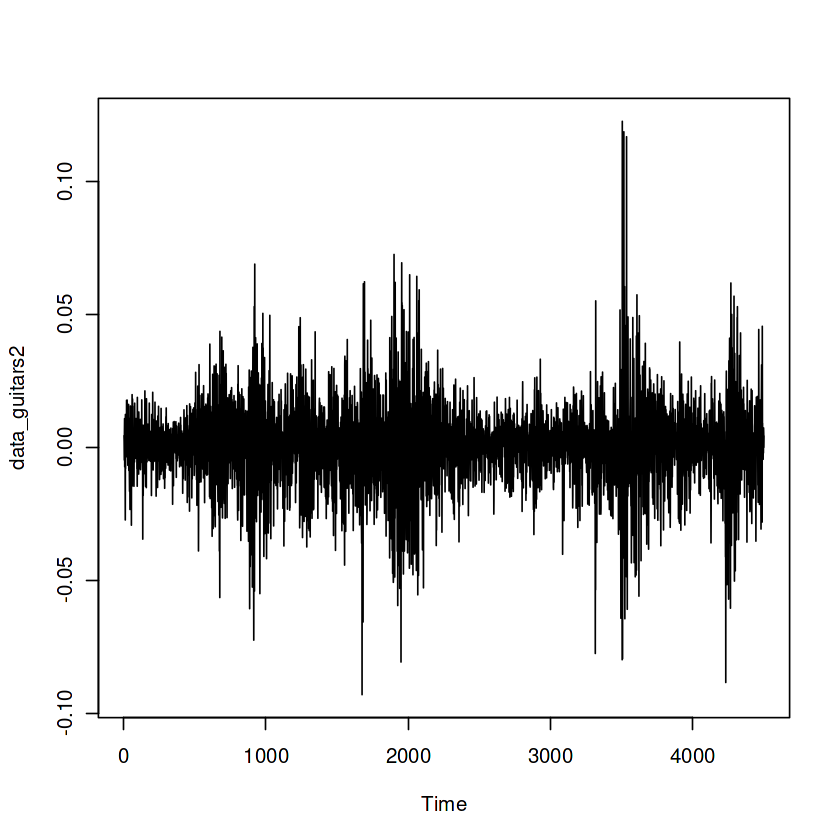

In [94]:
data_guitars1 <- guitars_train[2:398]   #Creating object consisting of values before the NA gap at the endo of the t.s.
data_guitars2 <- guitars_train[450:4953]   #Creating object consisting of values before the NA gap at the endo of the t.s.

plot.ts(data_guitars1)   
plot.ts(data_guitars2)

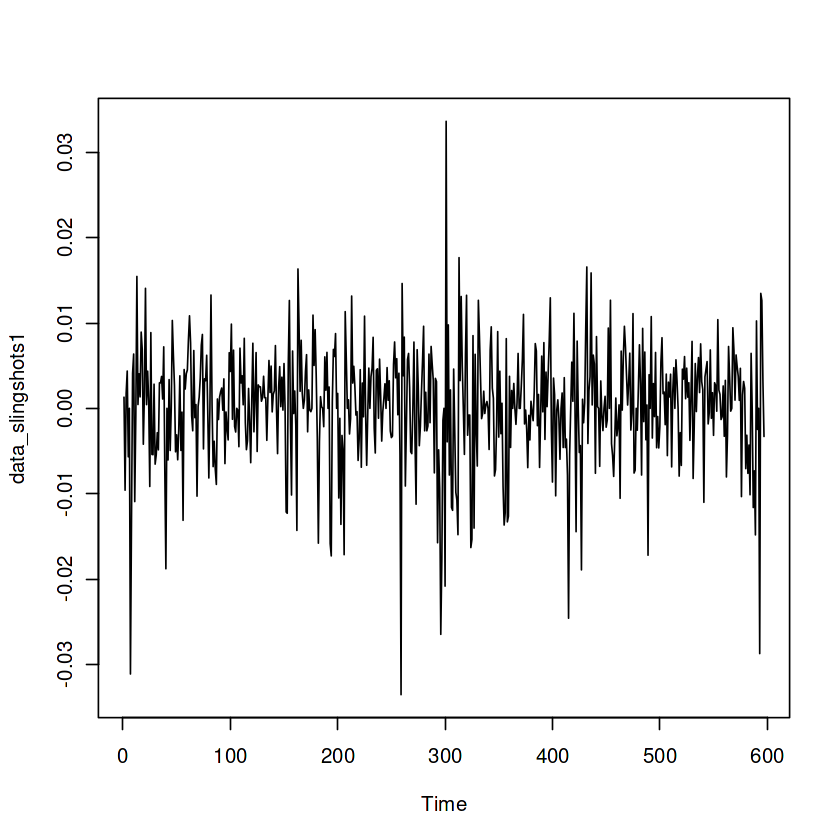

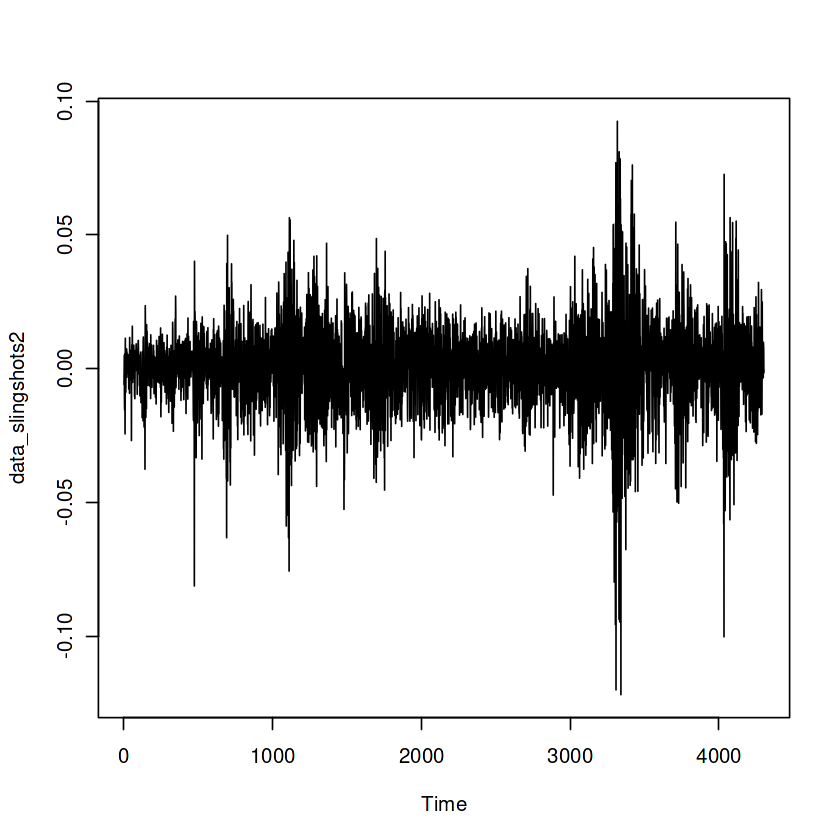

In [95]:
data_slingshots1 <- slingshots_train[2:598]   #Creating object consisting of values before the NA gap at the endo of the t.s.
data_slingshots2 <- slingshots_train[650:4953]   #Creating object consisting of values before the NA gap at the endo of the t.s.

plot.ts(data_slingshots1)   
plot.ts(data_slingshots2)

#### 2. Look at the ACF and PACF for what param. values for q and p to try out during the model fittings

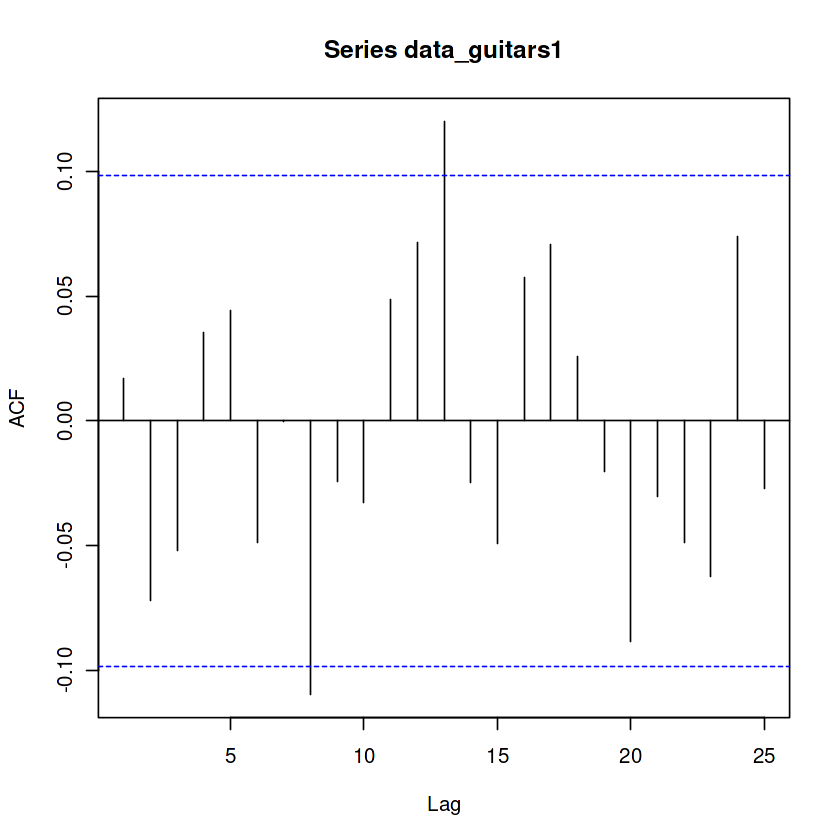

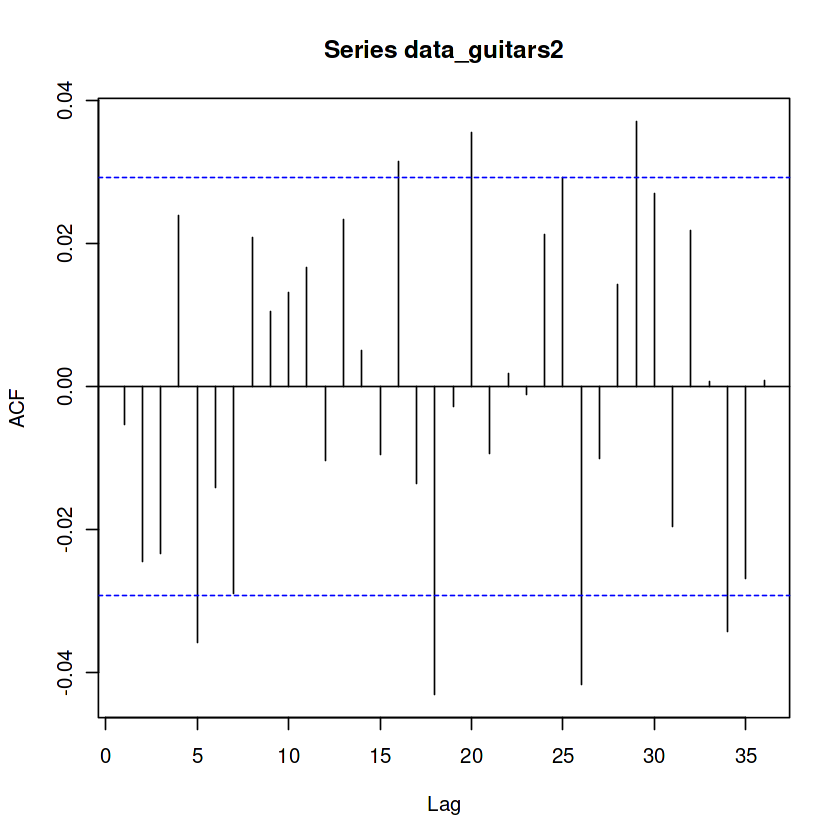

In [96]:
# ACF for guitars (looking at the time series training data before and after the nan gap separately)
acf(data_guitars1)     
acf(data_guitars2)

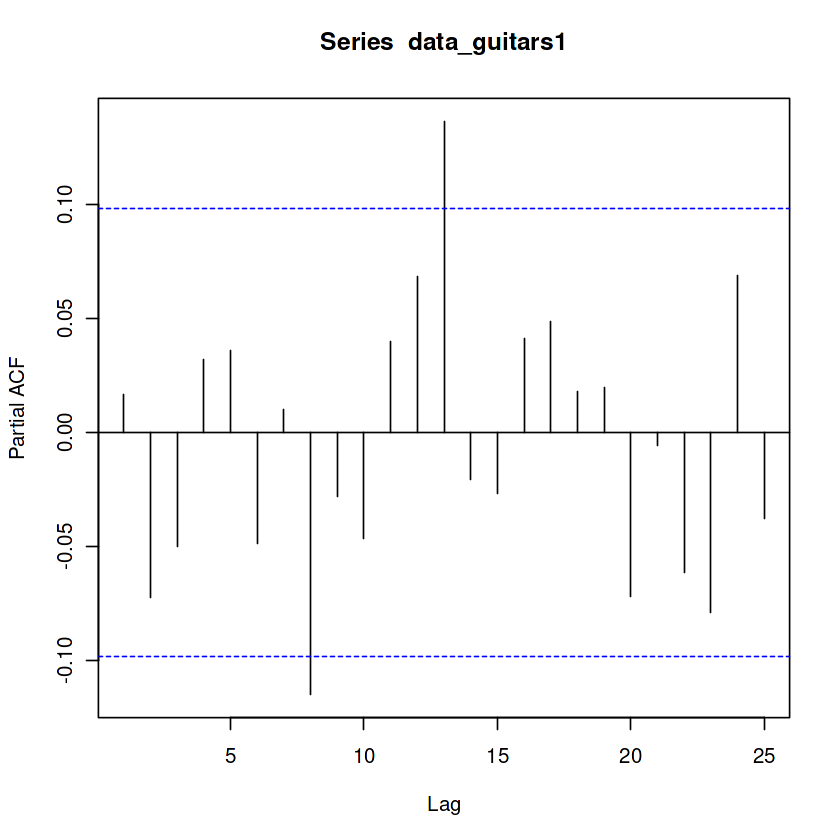

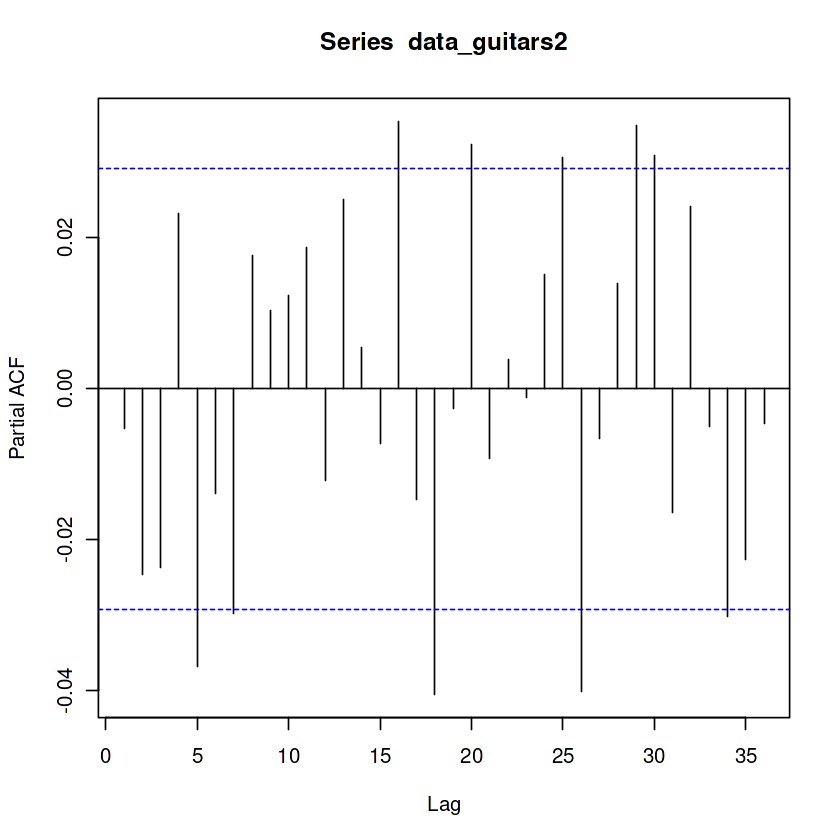

In [97]:
# PACF for guitars (looking at the time series training data before and after the nan gap separately)
pacf(data_guitars1)     #Looking at pacf
pacf(data_guitars2)     #Looking at pacf

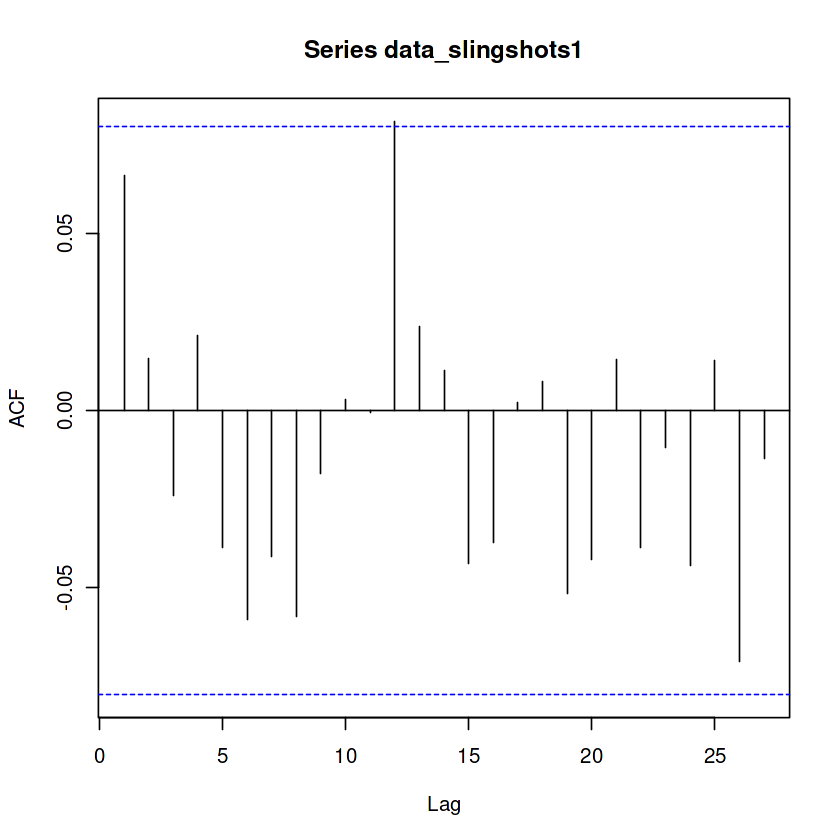

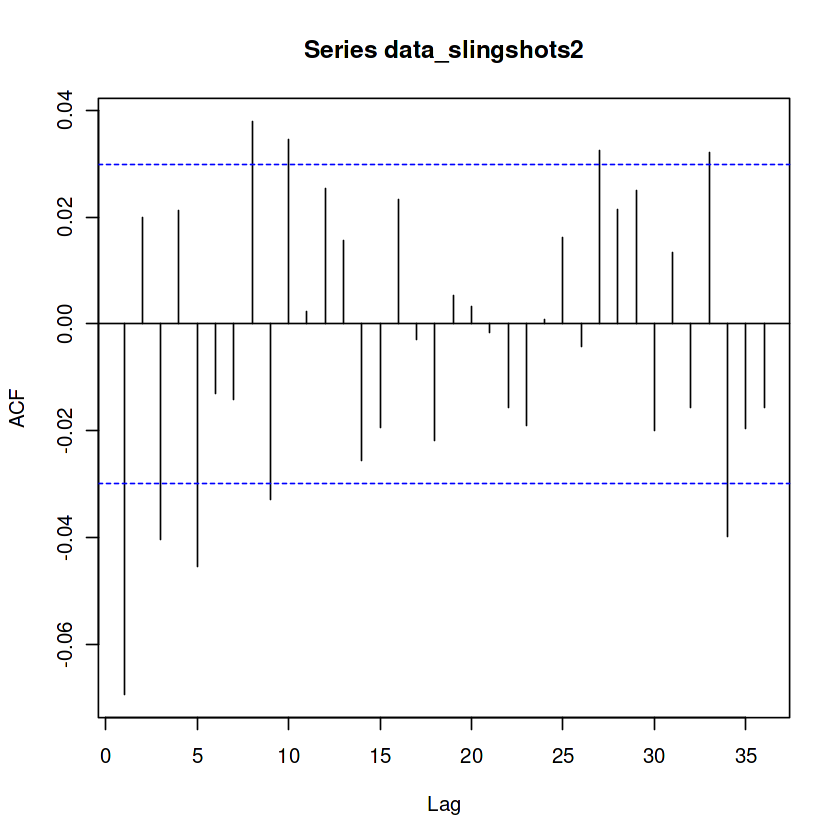

In [98]:
# ACF for slingshots (looking at the time series training data before and after the nan gap separately)
acf(data_slingshots1)     
acf(data_slingshots2)

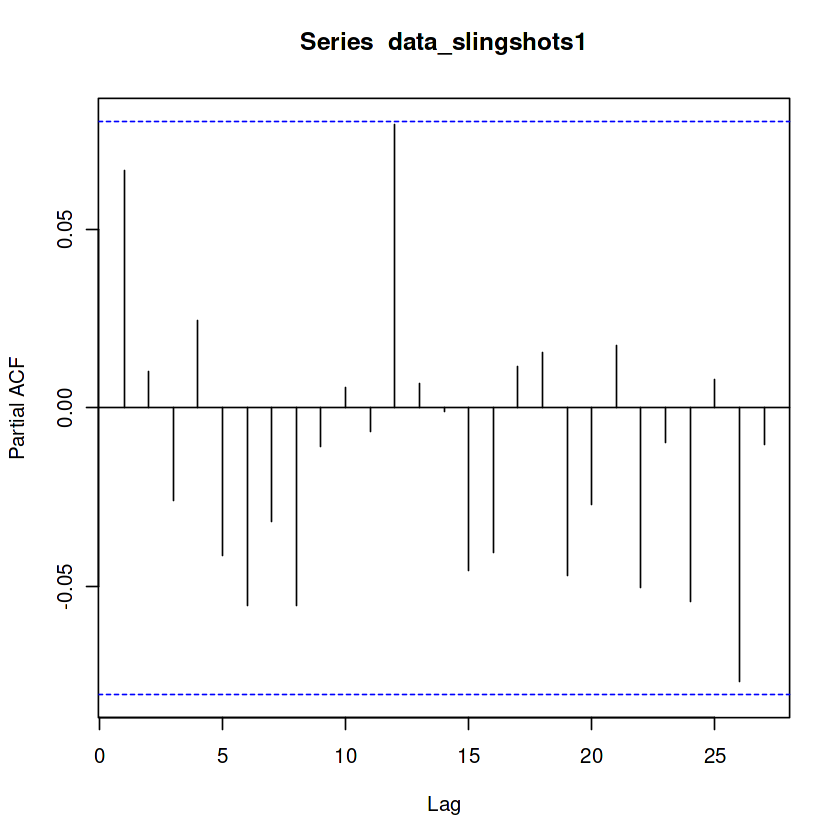

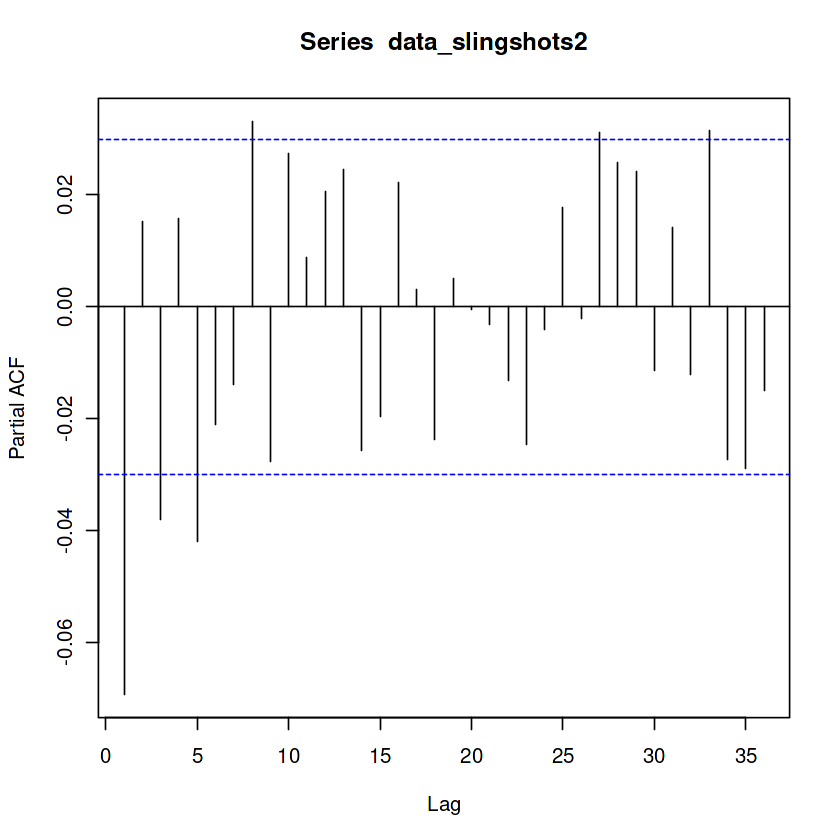

In [99]:
# PACF for slingshots (looking at the time series training data before and after the nan gap separately)
pacf(data_slingshots1)     #Looking at pacf
pacf(data_slingshots2)     #Looking at pacf

In [100]:
# we replace the outliers (with values > 100) by NA
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))
guitars_lr <- data_lr[,11]    # guitars data
slingshots_lr <- data_lr[,12] # slingshot data

# redo the NA cleaning and train test split
df <- data.frame(guitars_lr = guitars_lr, slingshots_lr = slingshots_lr)
df_clean <- na.omit(df)

guitars_clean <- df_clean$guitars_lr
slingshots_clean <- df_clean$slingshots_lr

index <- 1:(5143 - 200) # to get 200 obs of gurkor in test 

guitars_train <- guitars_clean[index]
guitars_test <- guitars_clean[-index] 
slingshots_train <- slingshots_clean[index]
slingshots_test <- slingshots_clean[-index] 


#### From ACF and PACF of guitars:
- q={0,1,2,3},(guitars)
- p={0,1,2,3},(guitars)
- d=0 (since we already differentiated by taking the log-returns of the time series)

#### From ACF and PACF of slingshots:
- q={0,1,2,3},(slingshots)
- p={0,1,2,3},(slingshots)
- d=0 (since we already differentiated by taking the log-returns of the time series)

#### 3. Train/fit the models on the training data

In [101]:
guitars_arma1 <- Arima(guitars_train, order = c(0,0,0))
guitars_arma2 <- Arima(guitars_train, order = c(1,0,0))
guitars_arma3 <- Arima(guitars_train, order = c(2,0,0))
guitars_arma4 <- Arima(guitars_train, order = c(3,0,0))

guitars_arma5 <- Arima(guitars_train, order = c(0,0,1))
guitars_arma6 <- Arima(guitars_train, order = c(1,0,1))
guitars_arma7 <- Arima(guitars_train, order = c(2,0,1))
guitars_arma8 <- Arima(guitars_train, order = c(3,0,1))

guitars_arma9 <- Arima(guitars_train, order = c(0,0,2))
guitars_arma10 <- Arima(guitars_train, order = c(1,0,2))
guitars_arma11 <- Arima(guitars_train, order = c(2,0,2))
guitars_arma12 <- Arima(guitars_train, order = c(3,0,2))

guitars_arma13 <- Arima(guitars_train, order = c(0,0,3))
guitars_arma14 <- Arima(guitars_train, order = c(1,0,3))
guitars_arma15 <- Arima(guitars_train, order = c(2,0,3))
guitars_arma16 <- Arima(guitars_train, order = c(3,0,3))


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 24.016, df = 10, p-value = 0.007558

Model df: 0.   Total lags used: 10



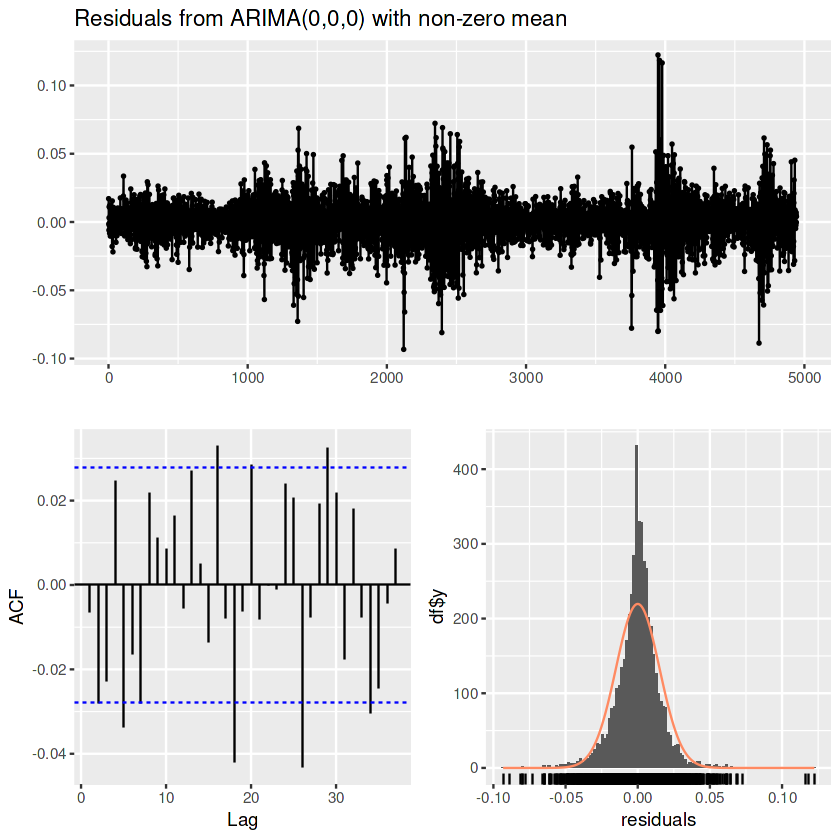


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 23.828, df = 9, p-value = 0.004582

Model df: 1.   Total lags used: 10



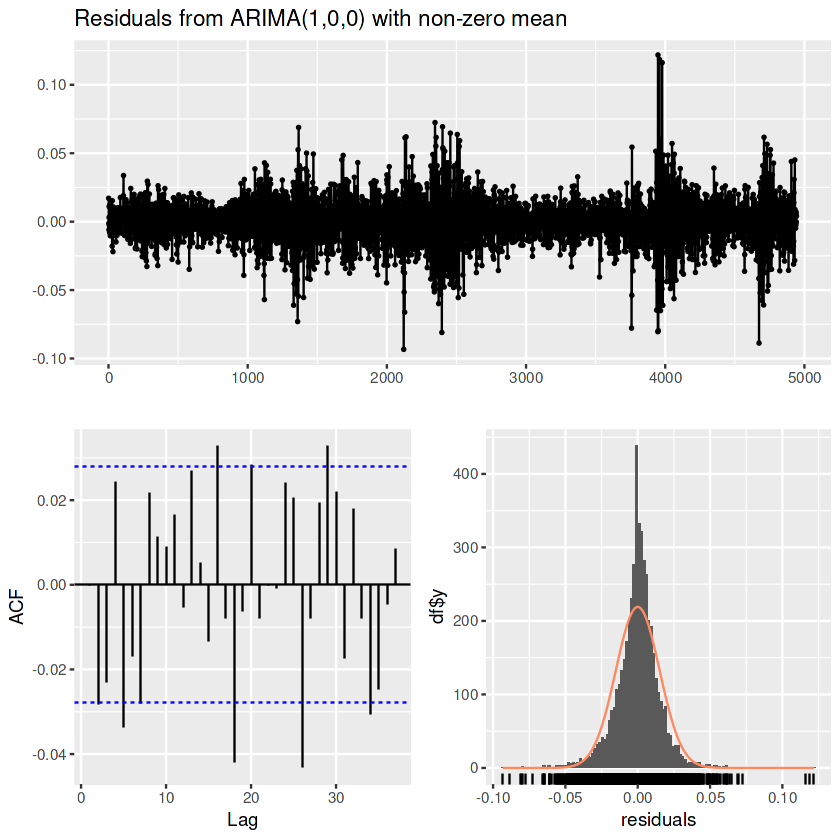


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 20.333, df = 8, p-value = 0.009146

Model df: 2.   Total lags used: 10



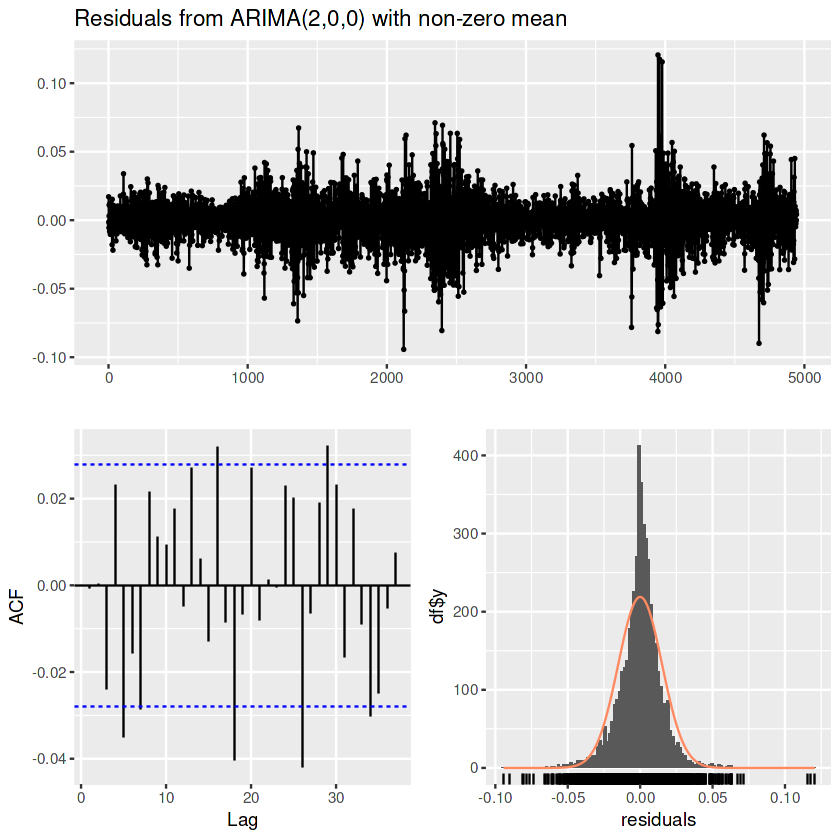


	Ljung-Box test

data:  Residuals from ARIMA(3,0,0) with non-zero mean
Q* = 17.034, df = 7, p-value = 0.01718

Model df: 3.   Total lags used: 10



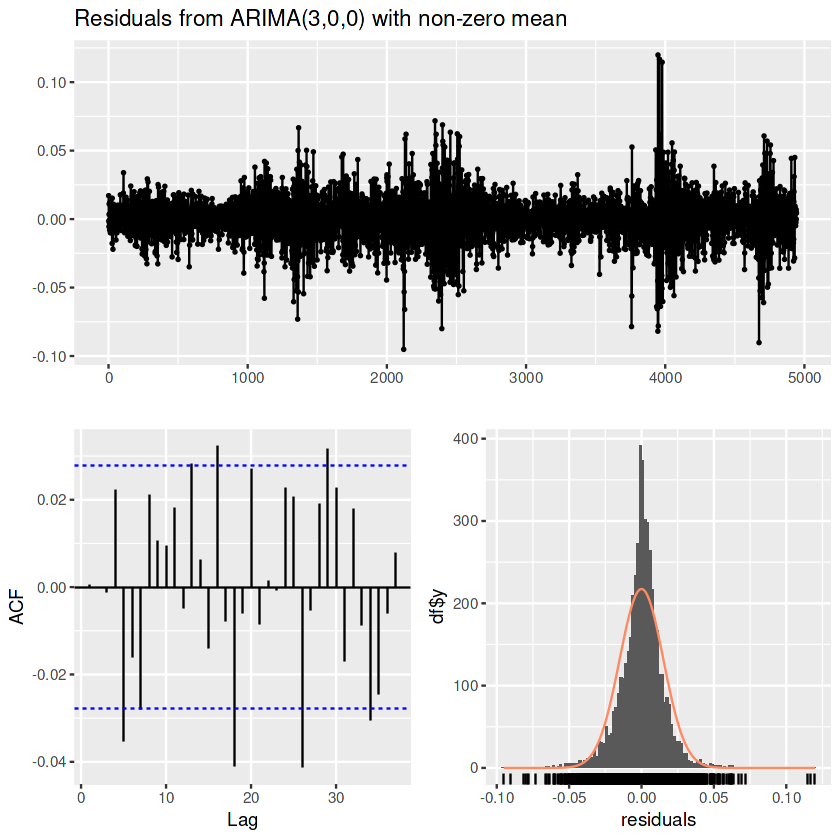


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 23.817, df = 9, p-value = 0.004601

Model df: 1.   Total lags used: 10



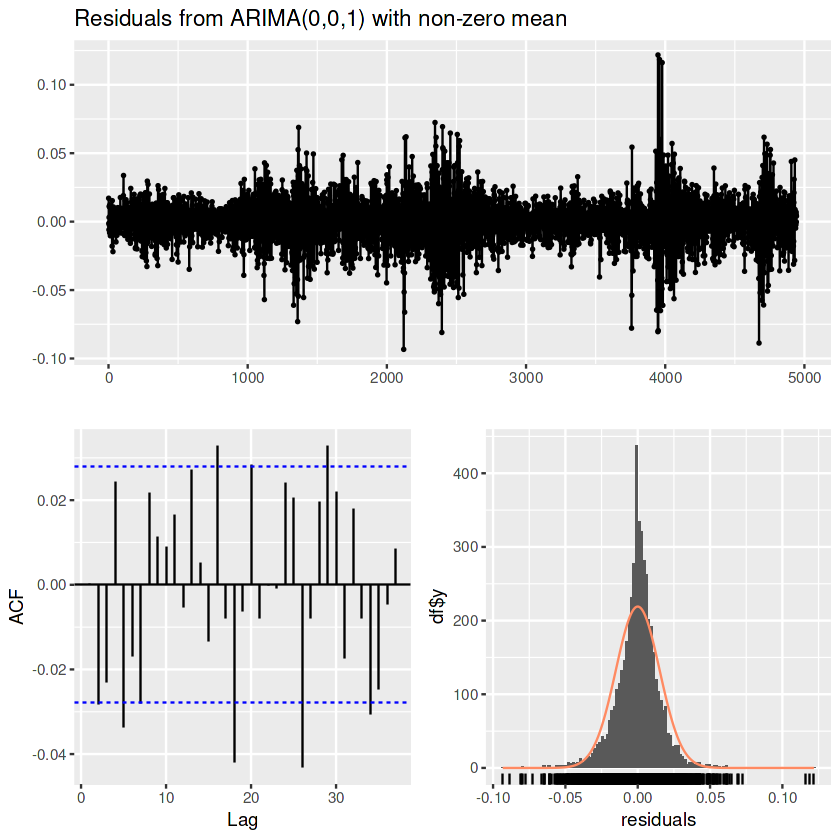


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 23.822, df = 8, p-value = 0.002455

Model df: 2.   Total lags used: 10



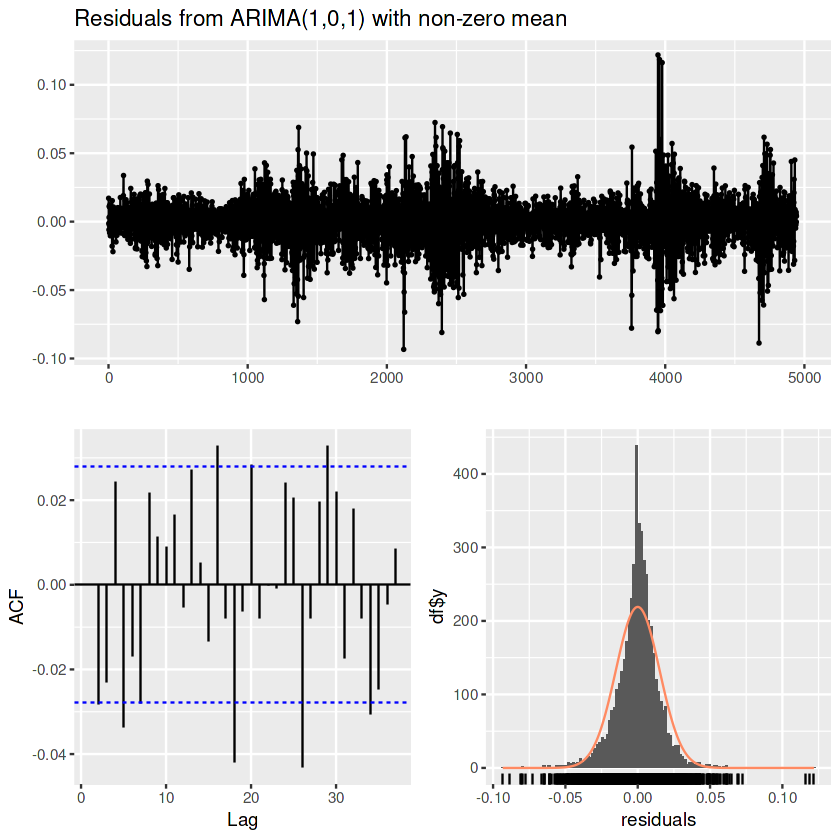


	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with non-zero mean
Q* = 17.704, df = 7, p-value = 0.01338

Model df: 3.   Total lags used: 10



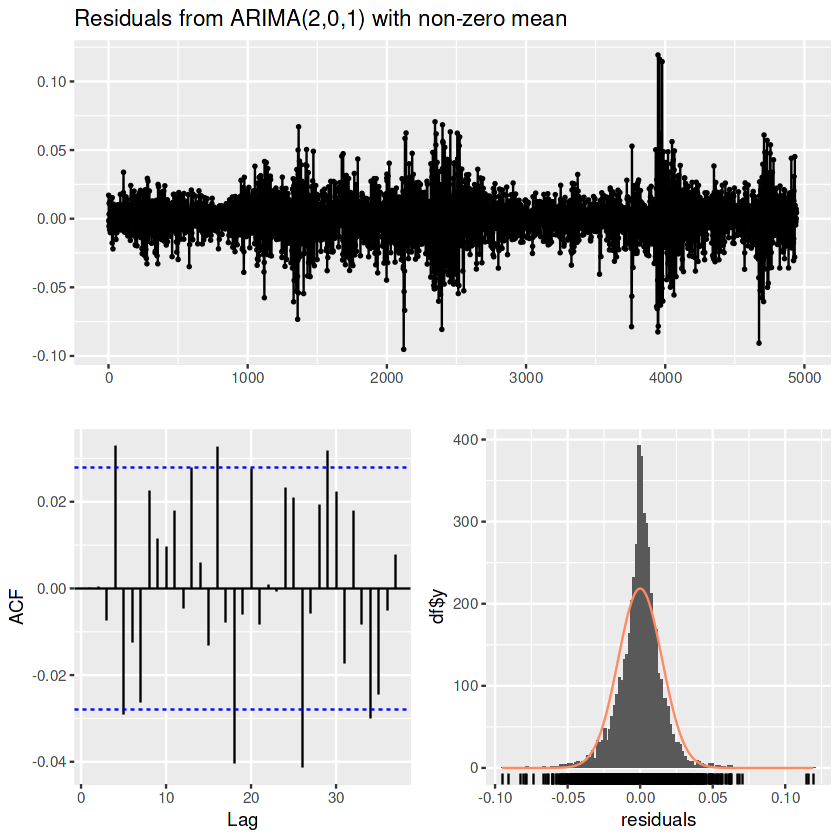


	Ljung-Box test

data:  Residuals from ARIMA(3,0,1) with non-zero mean
Q* = 10.329, df = 6, p-value = 0.1114

Model df: 4.   Total lags used: 10



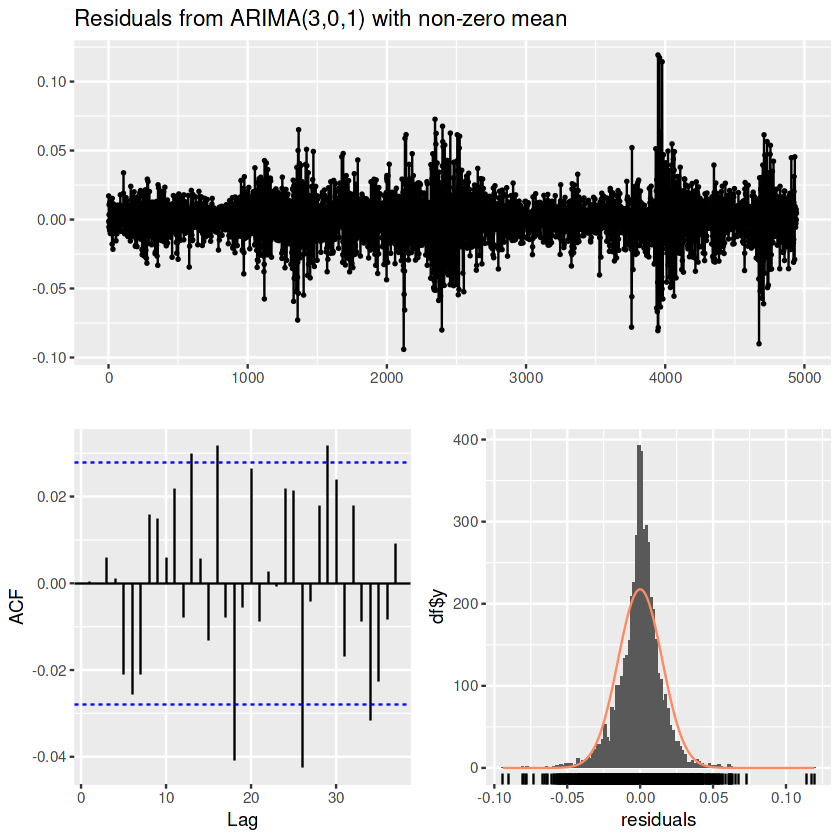


	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 20.377, df = 8, p-value = 0.008999

Model df: 2.   Total lags used: 10



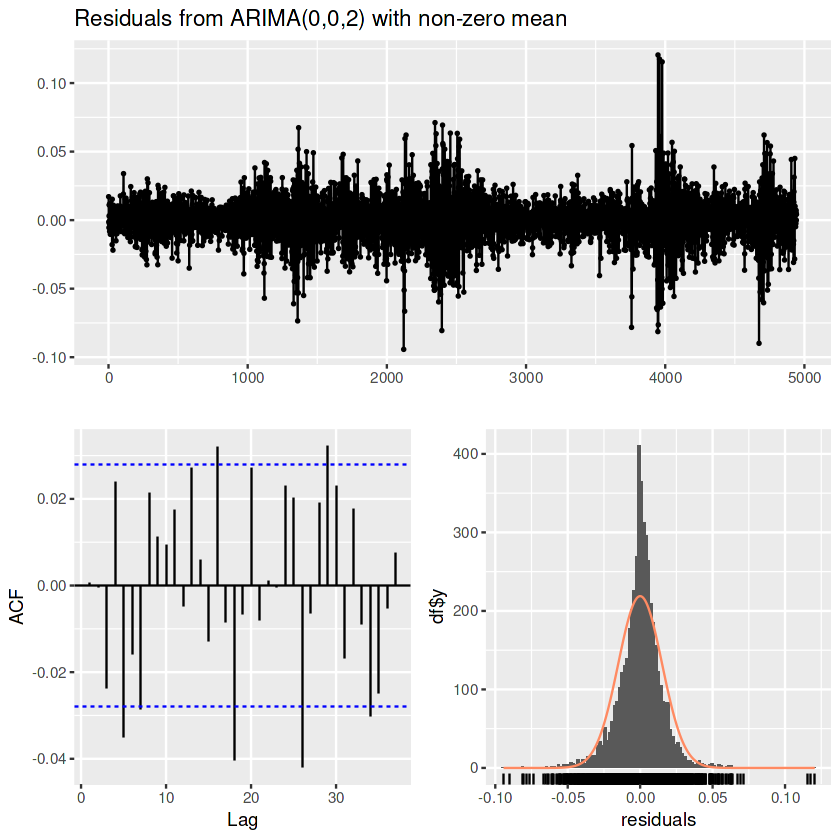


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with non-zero mean
Q* = 17.979, df = 7, p-value = 0.01207

Model df: 3.   Total lags used: 10



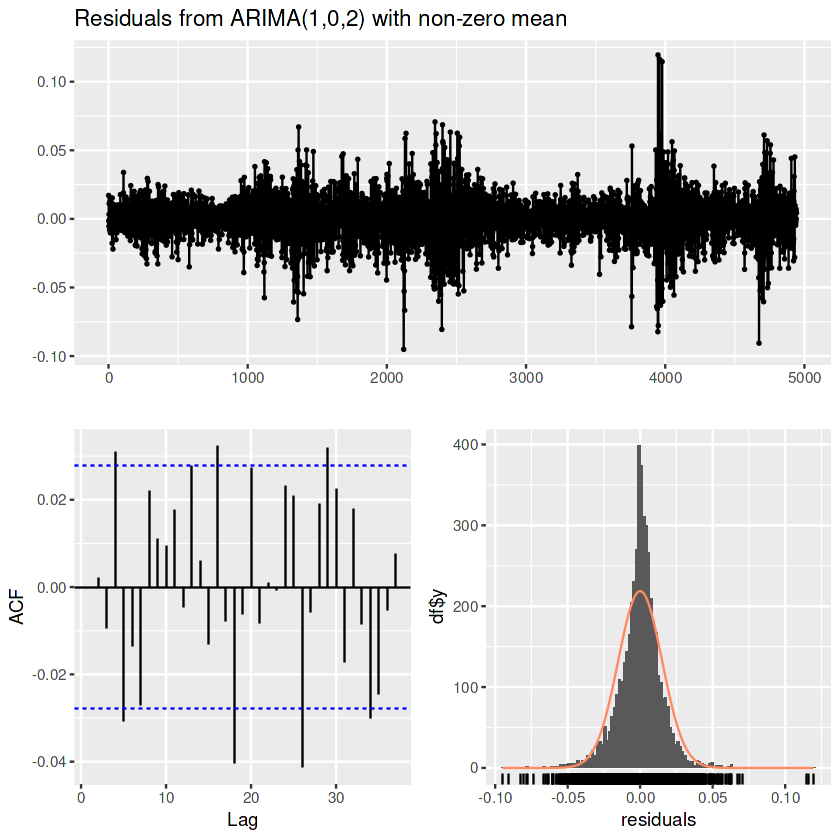


	Ljung-Box test

data:  Residuals from ARIMA(2,0,2) with non-zero mean
Q* = 16.343, df = 6, p-value = 0.01203

Model df: 4.   Total lags used: 10



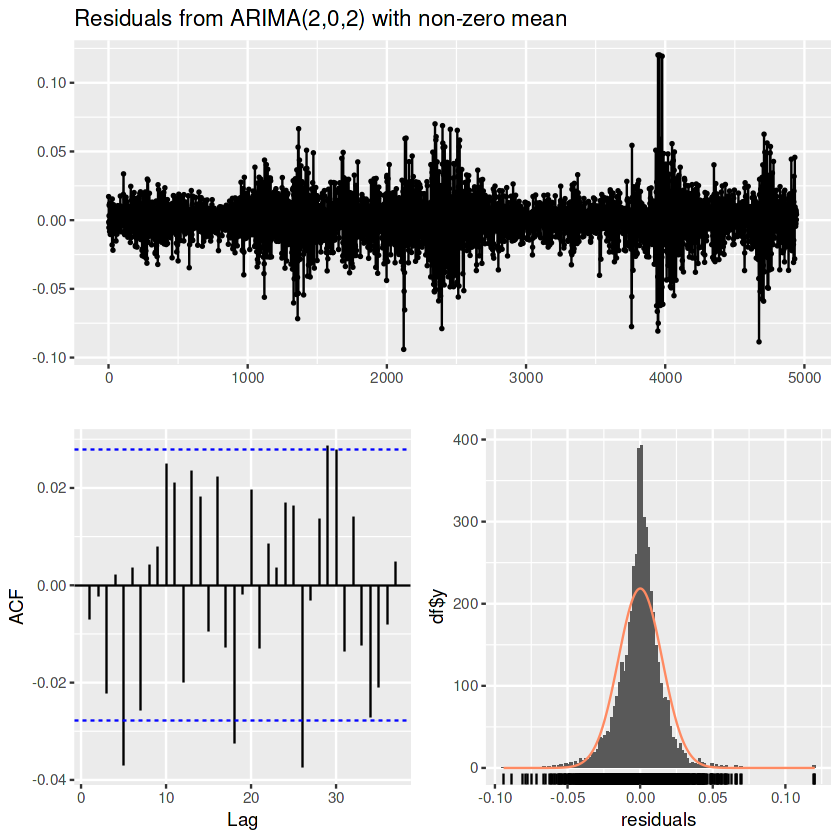


	Ljung-Box test

data:  Residuals from ARIMA(3,0,2) with non-zero mean
Q* = 10.129, df = 5, p-value = 0.07165

Model df: 5.   Total lags used: 10



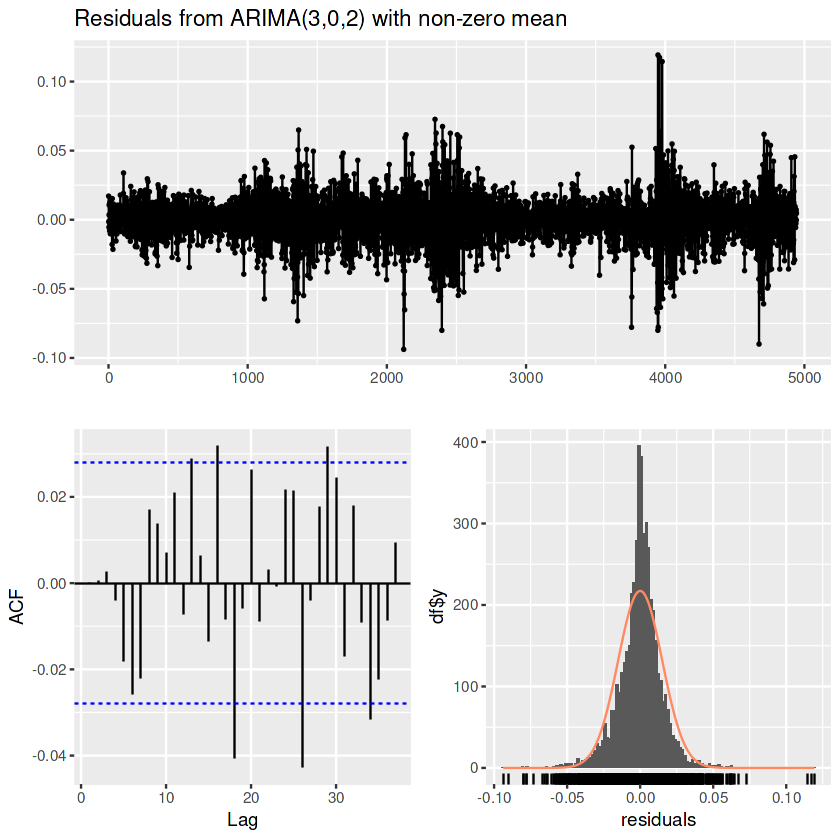


	Ljung-Box test

data:  Residuals from ARIMA(0,0,3) with non-zero mean
Q* = 16.653, df = 7, p-value = 0.01978

Model df: 3.   Total lags used: 10



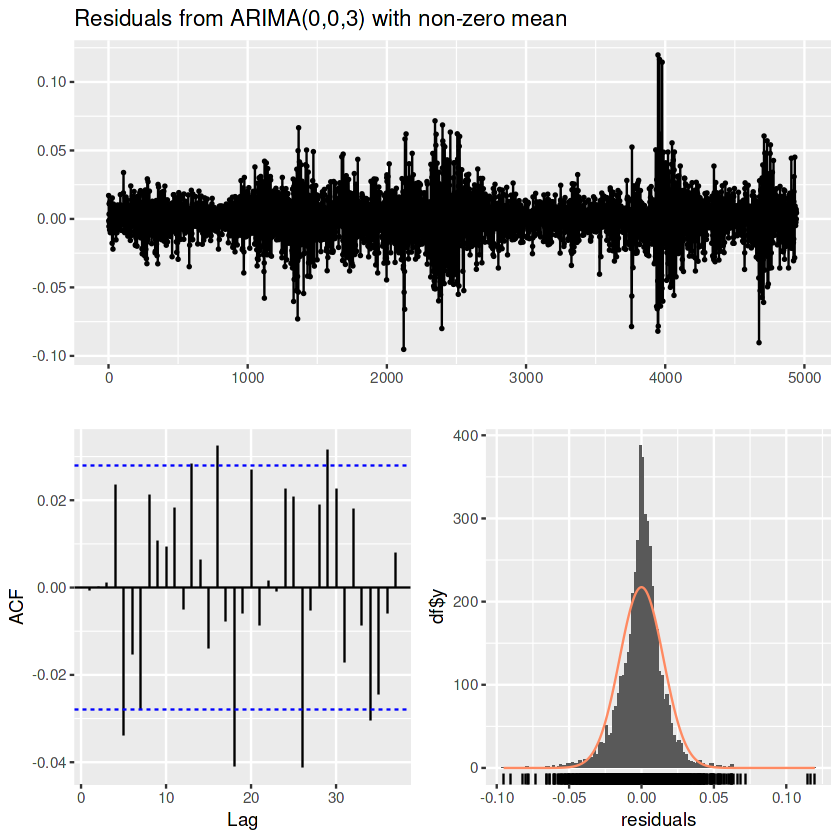


	Ljung-Box test

data:  Residuals from ARIMA(1,0,3) with non-zero mean
Q* = 9.9859, df = 6, p-value = 0.1252

Model df: 4.   Total lags used: 10



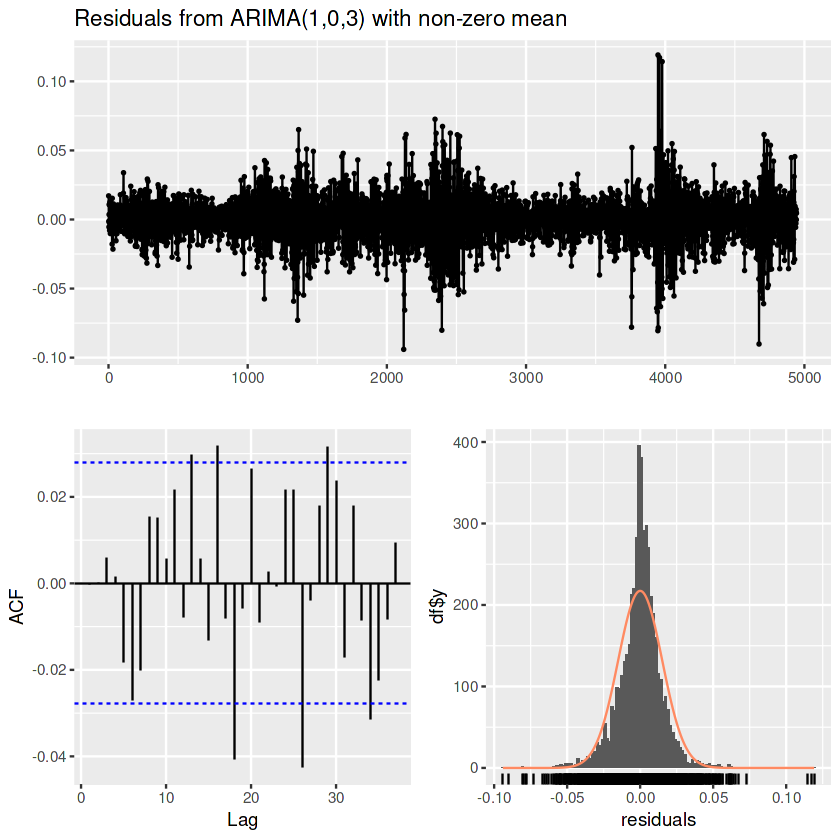


	Ljung-Box test

data:  Residuals from ARIMA(2,0,3) with non-zero mean
Q* = 10.033, df = 5, p-value = 0.0743

Model df: 5.   Total lags used: 10



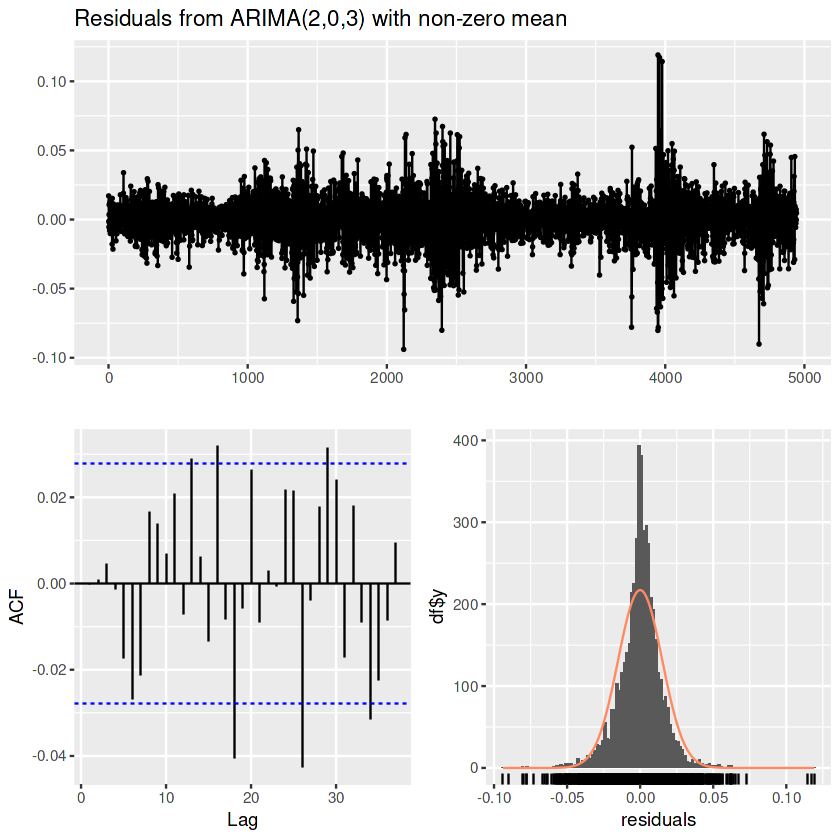


	Ljung-Box test

data:  Residuals from ARIMA(3,0,3) with non-zero mean
Q* = 13.966, df = 4, p-value = 0.007405

Model df: 6.   Total lags used: 10



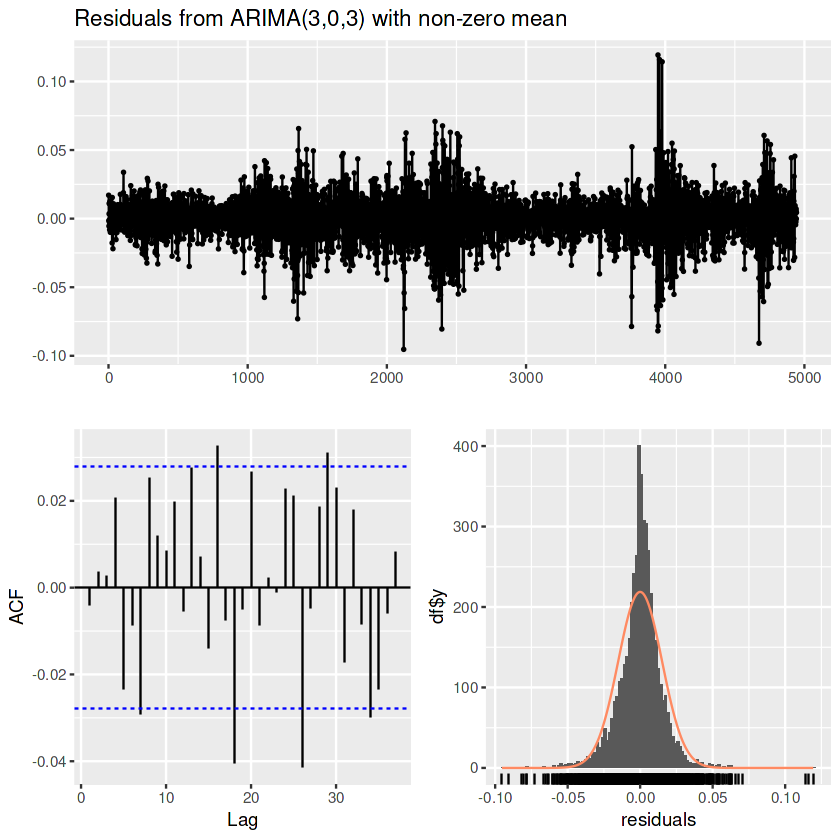

In [102]:
checkresiduals(guitars_arma1)
checkresiduals(guitars_arma2)
checkresiduals(guitars_arma3)
checkresiduals(guitars_arma4)

checkresiduals(guitars_arma5)
checkresiduals(guitars_arma6)
checkresiduals(guitars_arma7)
checkresiduals(guitars_arma8)

checkresiduals(guitars_arma9)
checkresiduals(guitars_arma10)
checkresiduals(guitars_arma11)
checkresiduals(guitars_arma12)

checkresiduals(guitars_arma13)
checkresiduals(guitars_arma14)
checkresiduals(guitars_arma15)
checkresiduals(guitars_arma16)


In [103]:
opt_fit <- auto.arima(guitars_train)
opt_fit

Series: guitars_train 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.0002288:  log likelihood = 13703.46
AIC=-27404.91   AICc=-27404.91   BIC=-27398.41

In [104]:
# models with acceptable p-value
guitars_arma8
guitars_arma12
guitars_arma14 # looks best I think with the AIC/BIC values?
guitars_arma15

Series: guitars_train 
ARIMA(3,0,1) with non-zero mean 

Coefficients:
          ar1      ar2      ar3     ma1   mean
      -0.7057  -0.0330  -0.0499  0.6995  2e-04
s.e.   0.1348   0.0174   0.0143  0.1344  2e-04

sigma^2 = 0.0002284:  log likelihood = 13710.4
AIC=-27408.81   AICc=-27408.79   BIC=-27369.77

Series: guitars_train 
ARIMA(3,0,2) with non-zero mean 

Coefficients:
          ar1      ar2      ar3     ma1     ma2   mean
      -0.8309  -0.1804  -0.0514  0.8249  0.1461  2e-04
s.e.   0.2975   0.2671   0.0143  0.2978  0.2656  2e-04

sigma^2 = 0.0002285:  log likelihood = 13710.71
AIC=-27407.42   AICc=-27407.4   BIC=-27361.88

Series: guitars_train 
ARIMA(1,0,3) with non-zero mean 

Coefficients:
          ar1     ma1      ma2      ma3   mean
      -0.7323  0.7268  -0.0331  -0.0509  2e-04
s.e.   0.1252  0.1254   0.0175   0.0146  2e-04

sigma^2 = 0.0002284:  log likelihood = 13710.57
AIC=-27409.14   AICc=-27409.12   BIC=-27370.1

Series: guitars_train 
ARIMA(2,0,3) with non-zero mean 

Coefficients:
          ar1      ar2     ma1     ma2      ma3   mean
      -0.7885  -0.0830  0.7828  0.0488  -0.0519  2e-04
s.e.   0.3447   0.3249  0.3442  0.3223   0.0144  2e-04

sigma^2 = 0.0002284:  log likelihood = 13710.73
AIC=-27407.46   AICc=-27407.44   BIC=-27361.92

In [105]:
slingshots_arma1 <- Arima(slingshots_train, order = c(0,0,0))
slingshots_arma2 <- Arima(slingshots_train, order = c(1,0,0))
slingshots_arma3 <- Arima(slingshots_train, order = c(2,0,0))
slingshots_arma4 <- Arima(slingshots_train, order = c(3,0,0))

slingshots_arma5 <- Arima(slingshots_train, order = c(0,0,1))
slingshots_arma6 <- Arima(slingshots_train, order = c(1,0,1))
slingshots_arma7 <- Arima(slingshots_train, order = c(2,0,1))
slingshots_arma8 <- Arima(slingshots_train, order = c(3,0,1))

slingshots_arma9 <- Arima(slingshots_train, order = c(0,0,2))
slingshots_arma10 <- Arima(slingshots_train, order = c(1,0,2))
slingshots_arma11 <- Arima(slingshots_train, order = c(2,0,2))
slingshots_arma12 <- Arima(slingshots_train, order = c(3,0,2))

slingshots_arma13 <- Arima(slingshots_train, order = c(0,0,3))
slingshots_arma14 <- Arima(slingshots_train, order = c(1,0,3))
slingshots_arma15 <- Arima(slingshots_train, order = c(2,0,3))
slingshots_arma16 <- Arima(slingshots_train, order = c(3,0,3))


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 61.893, df = 10, p-value = 1.586e-09

Model df: 0.   Total lags used: 10



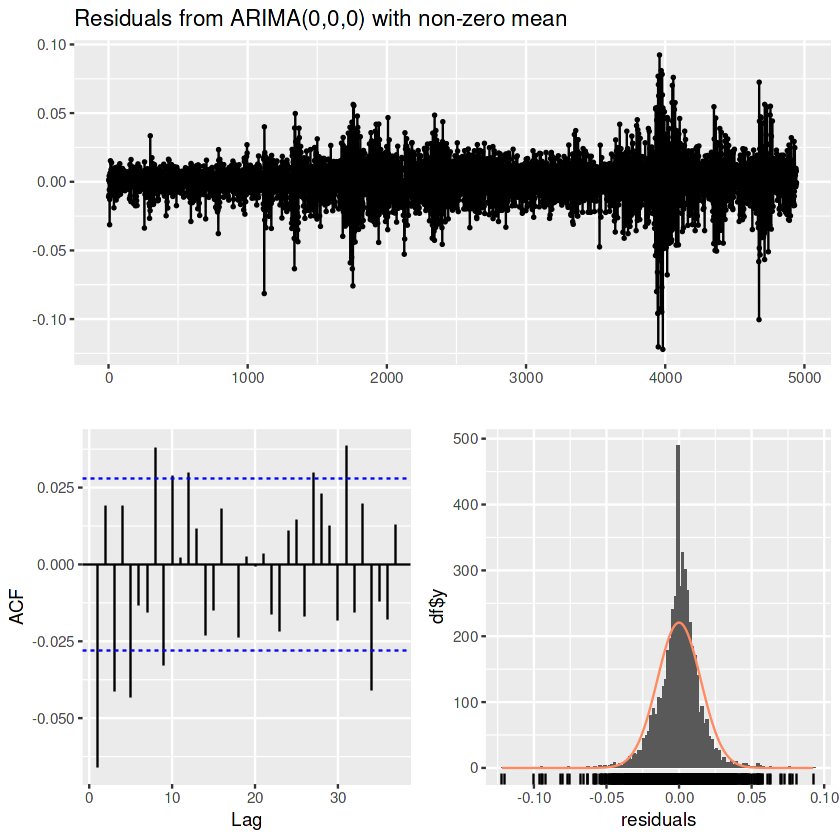


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 34.963, df = 9, p-value = 6.05e-05

Model df: 1.   Total lags used: 10



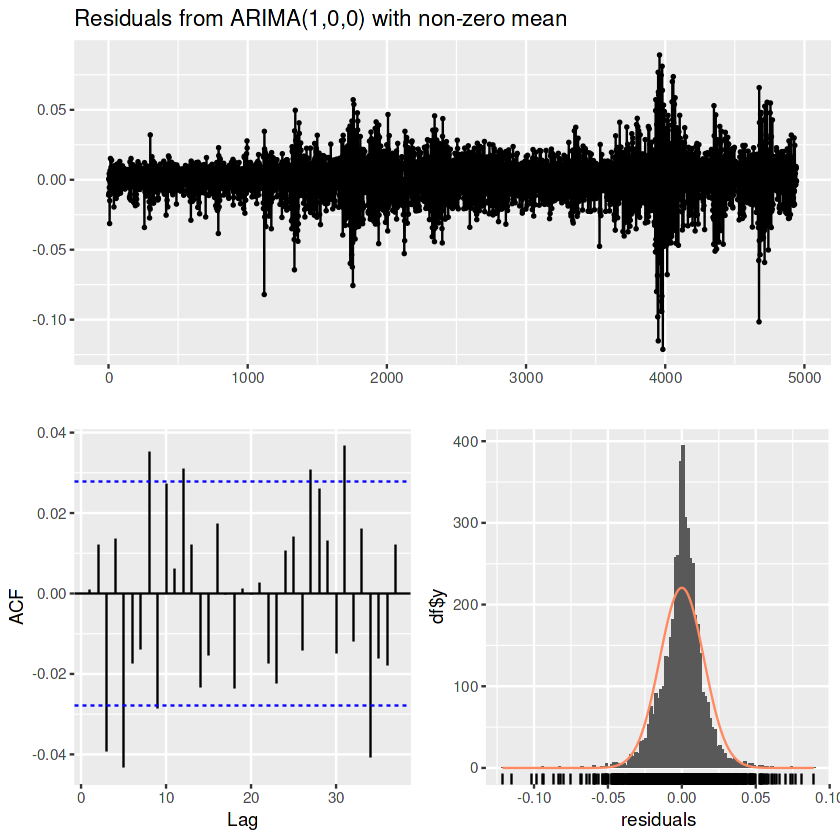


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 33.022, df = 8, p-value = 6.103e-05

Model df: 2.   Total lags used: 10



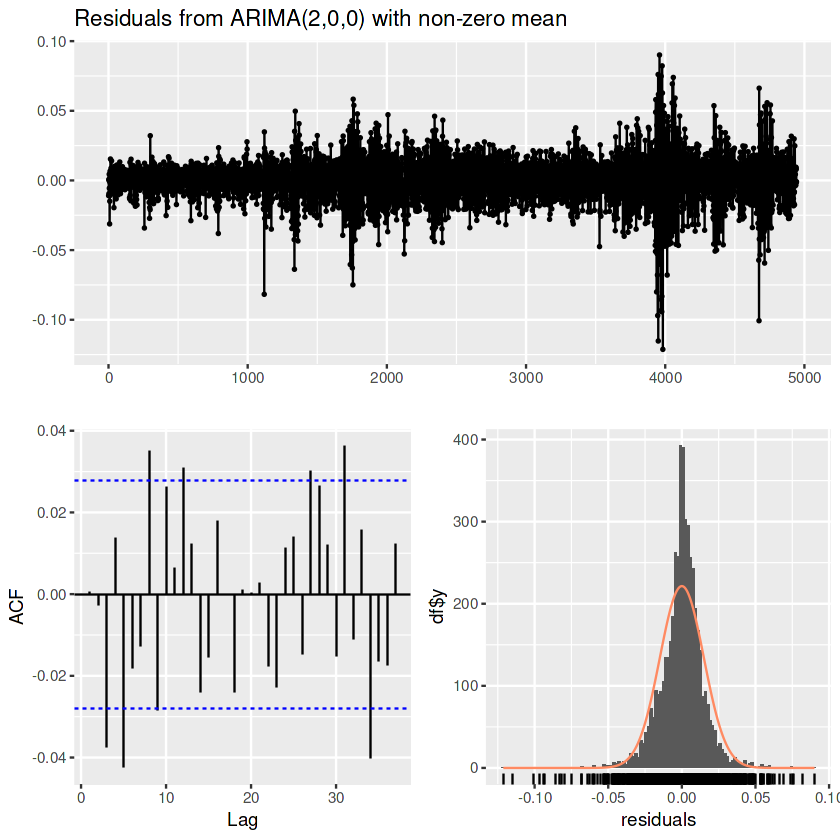


	Ljung-Box test

data:  Residuals from ARIMA(3,0,0) with non-zero mean
Q* = 24.666, df = 7, p-value = 0.0008696

Model df: 3.   Total lags used: 10



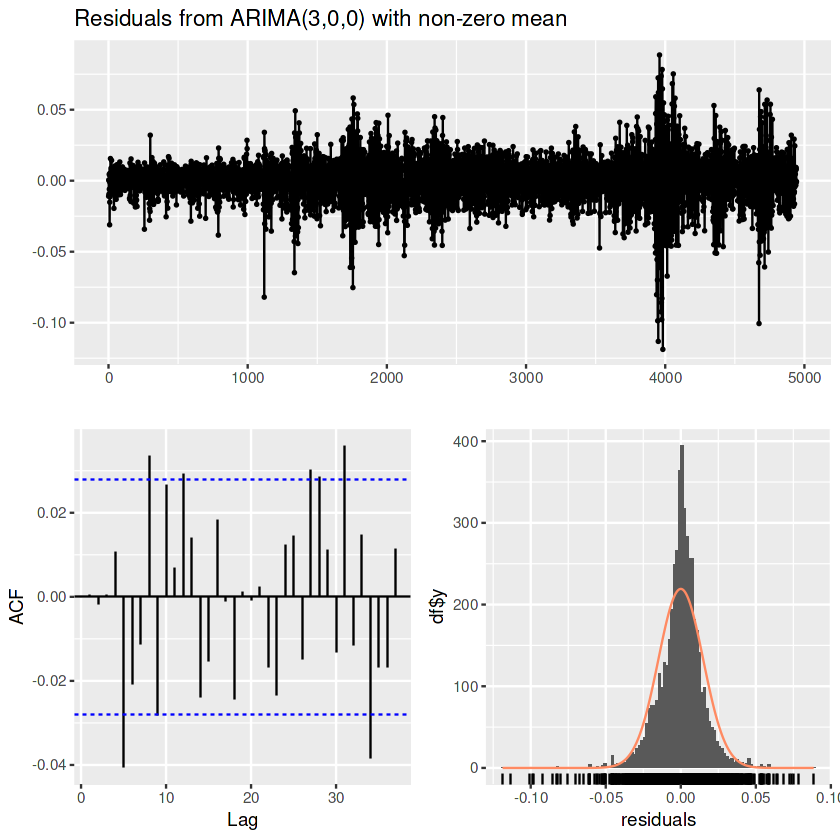


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 35.948, df = 9, p-value = 4.049e-05

Model df: 1.   Total lags used: 10



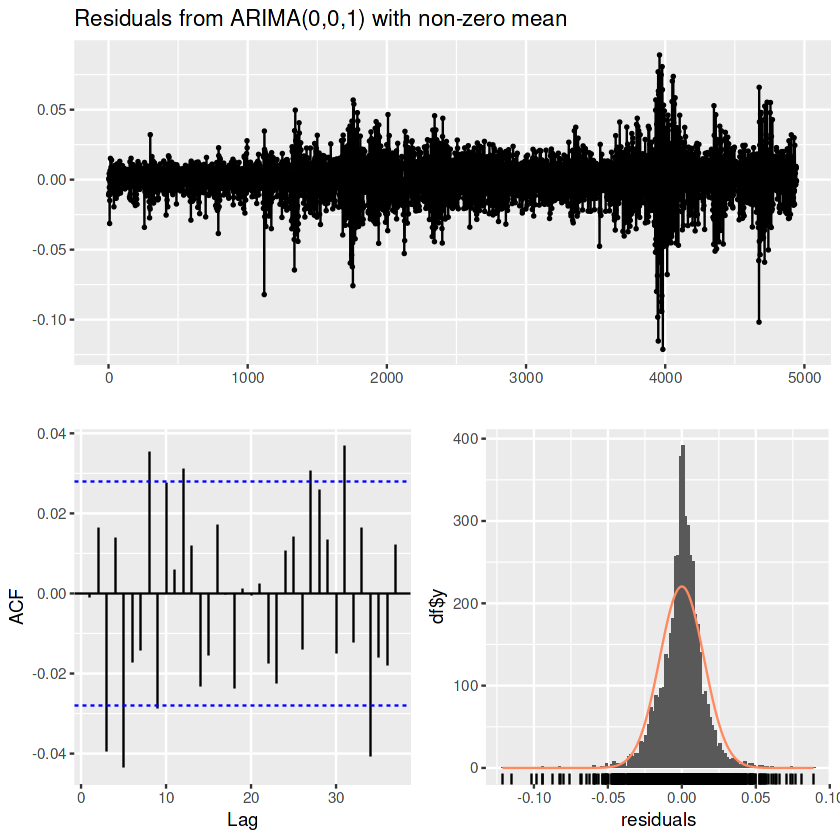


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 20.324, df = 8, p-value = 0.009178

Model df: 2.   Total lags used: 10



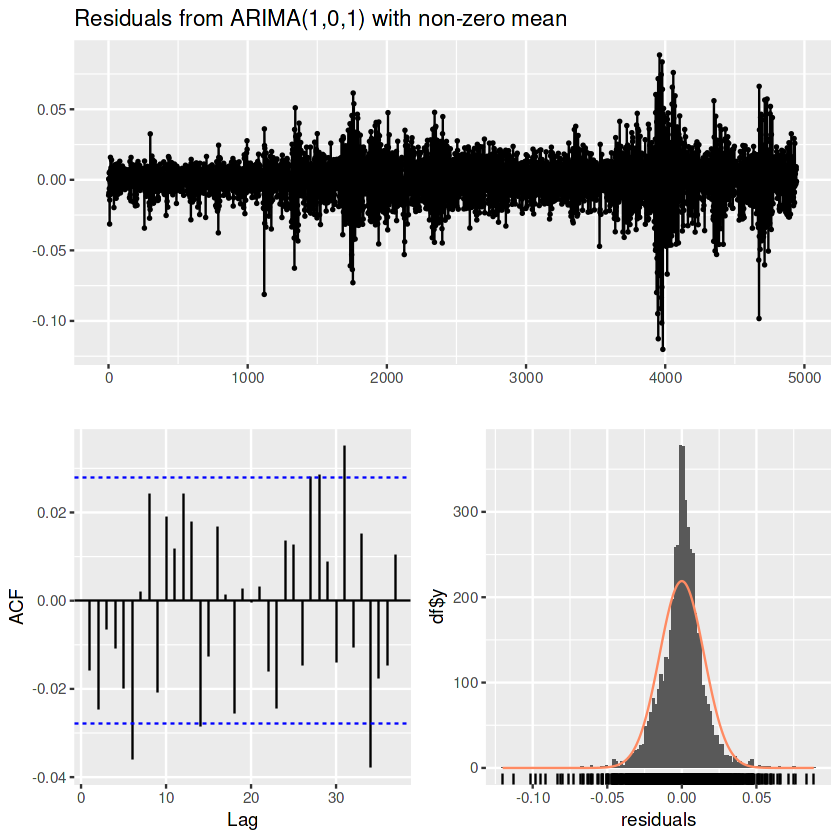


	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with non-zero mean
Q* = 17.432, df = 7, p-value = 0.01481

Model df: 3.   Total lags used: 10



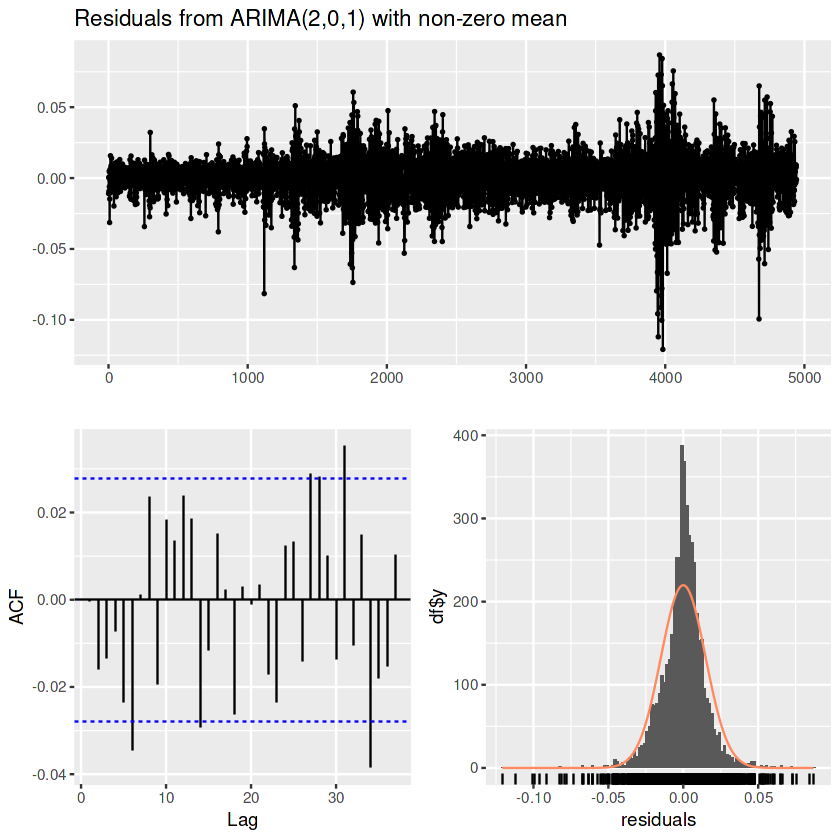


	Ljung-Box test

data:  Residuals from ARIMA(3,0,1) with non-zero mean
Q* = 16.125, df = 6, p-value = 0.0131

Model df: 4.   Total lags used: 10



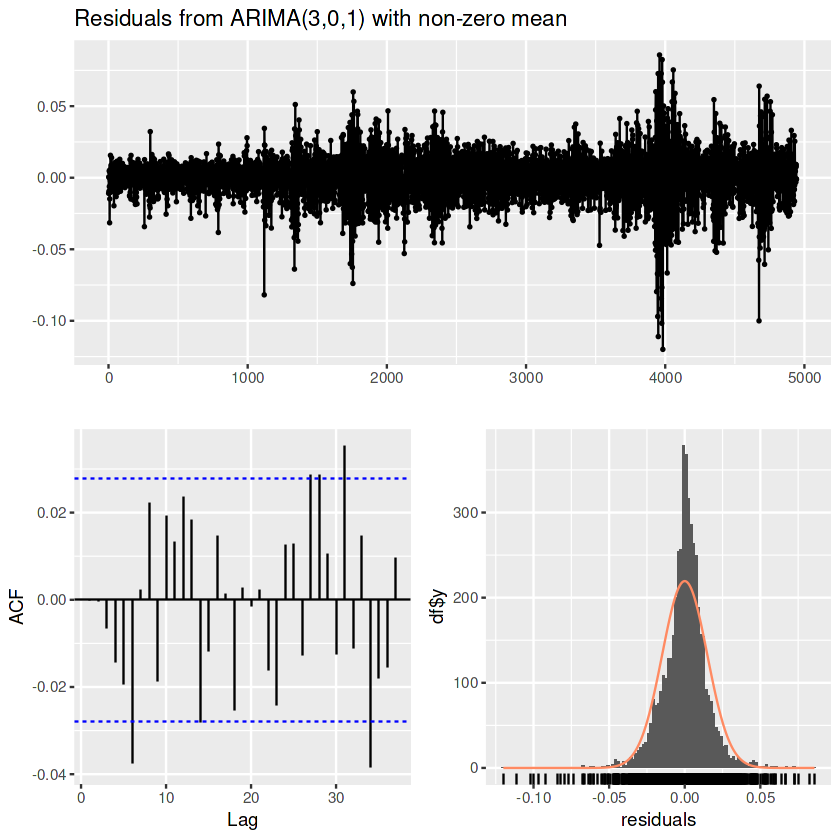


	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 34.142, df = 8, p-value = 3.828e-05

Model df: 2.   Total lags used: 10



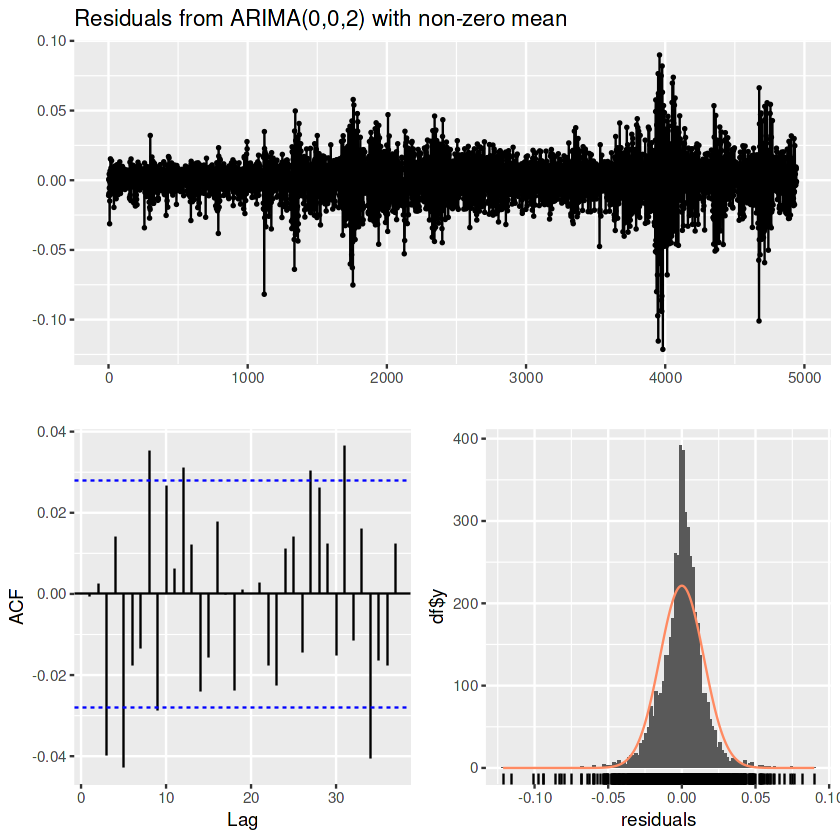


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with non-zero mean
Q* = 17.297, df = 7, p-value = 0.01558

Model df: 3.   Total lags used: 10



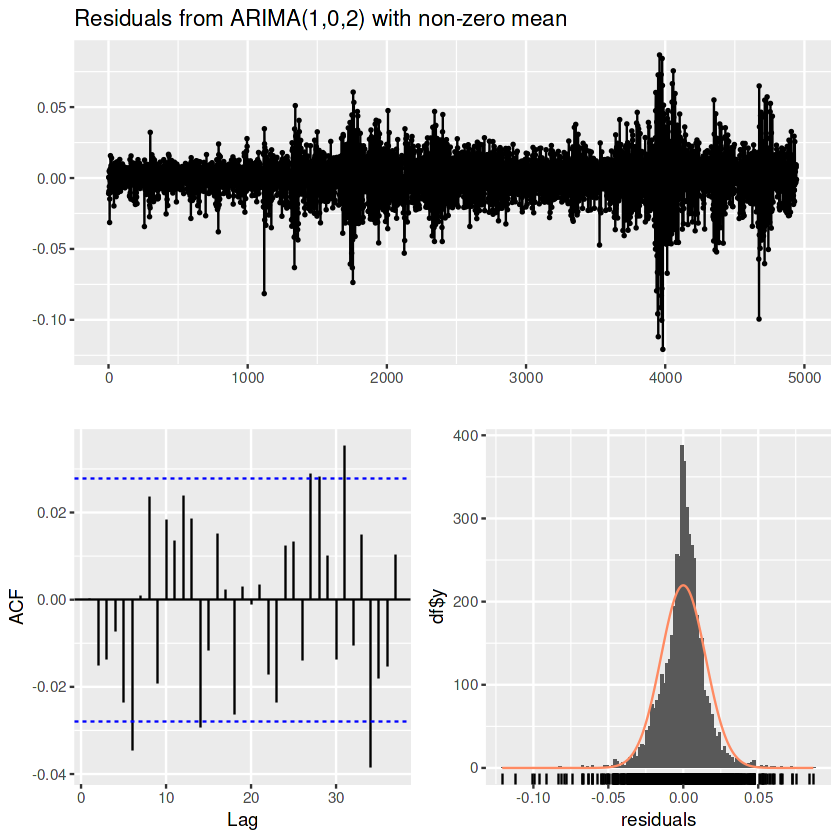


	Ljung-Box test

data:  Residuals from ARIMA(2,0,2) with non-zero mean
Q* = 12.432, df = 6, p-value = 0.053

Model df: 4.   Total lags used: 10



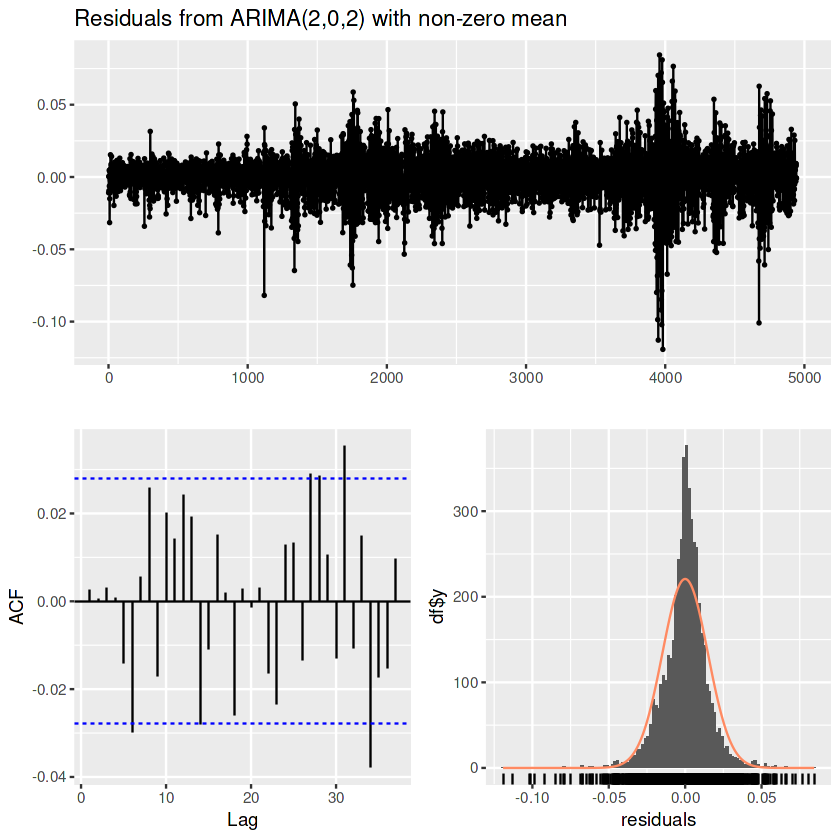


	Ljung-Box test

data:  Residuals from ARIMA(3,0,2) with non-zero mean
Q* = 12.595, df = 5, p-value = 0.02748

Model df: 5.   Total lags used: 10



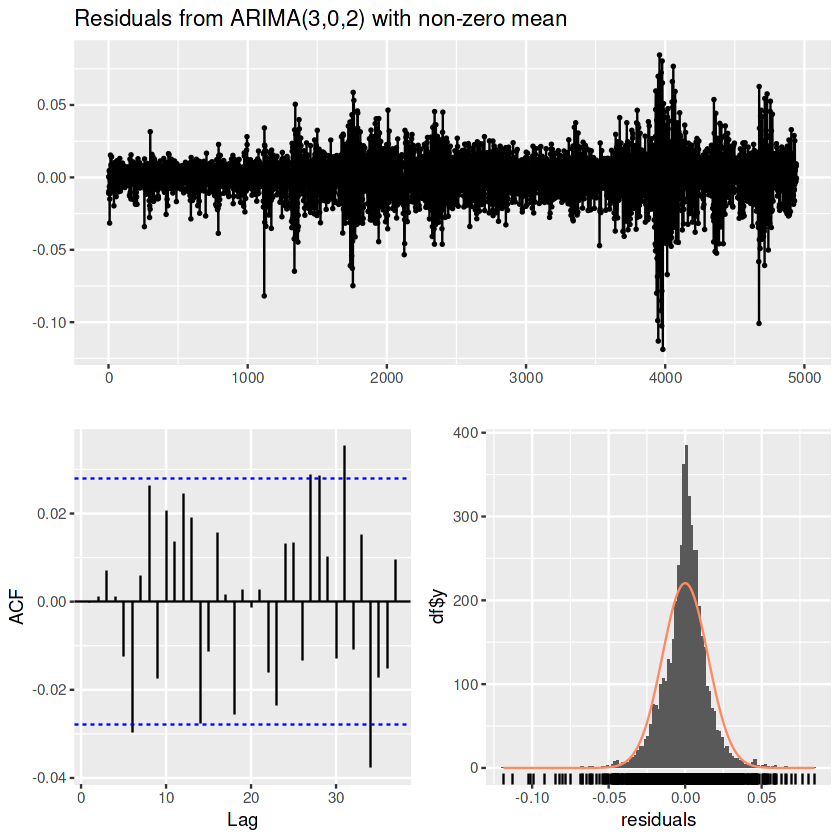


	Ljung-Box test

data:  Residuals from ARIMA(0,0,3) with non-zero mean
Q* = 25.728, df = 7, p-value = 0.0005633

Model df: 3.   Total lags used: 10



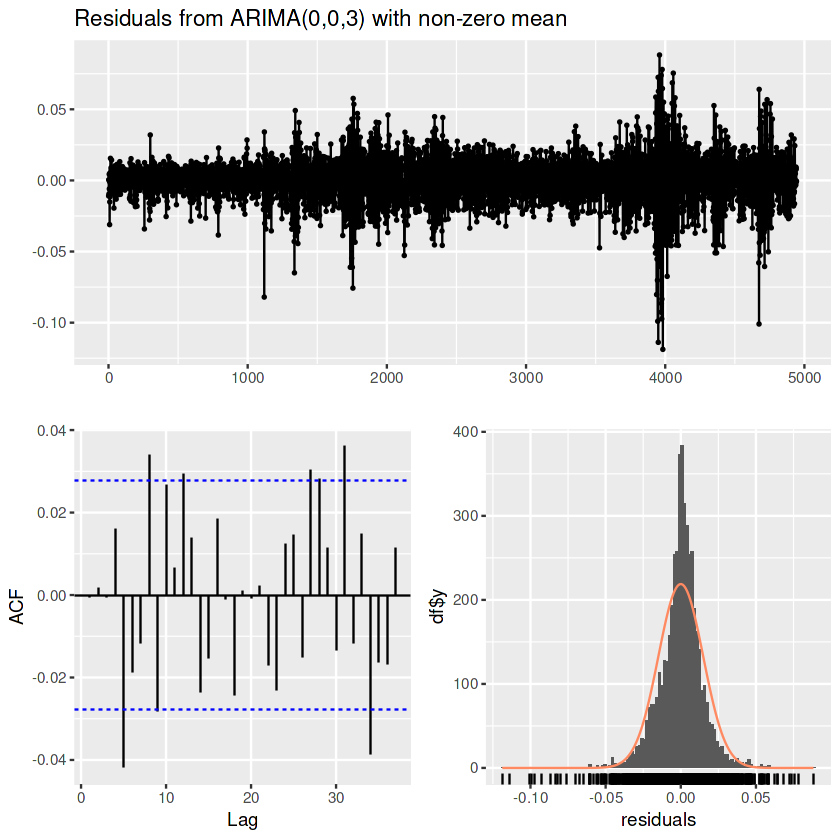


	Ljung-Box test

data:  Residuals from ARIMA(1,0,3) with non-zero mean
Q* = 16.098, df = 6, p-value = 0.01324

Model df: 4.   Total lags used: 10



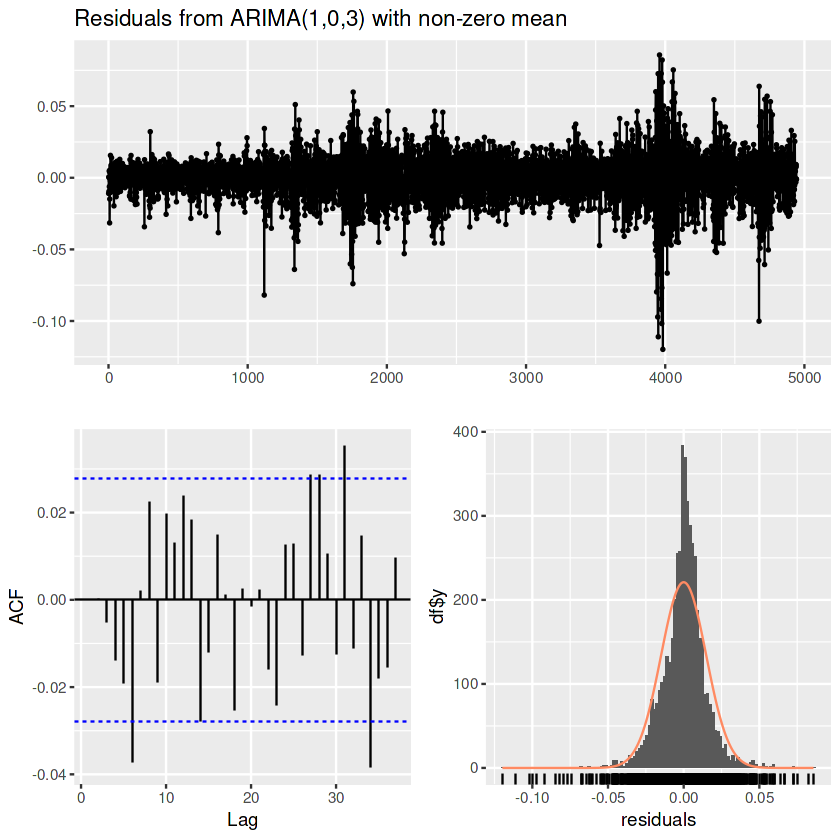


	Ljung-Box test

data:  Residuals from ARIMA(2,0,3) with non-zero mean
Q* = 12.702, df = 5, p-value = 0.02634

Model df: 5.   Total lags used: 10



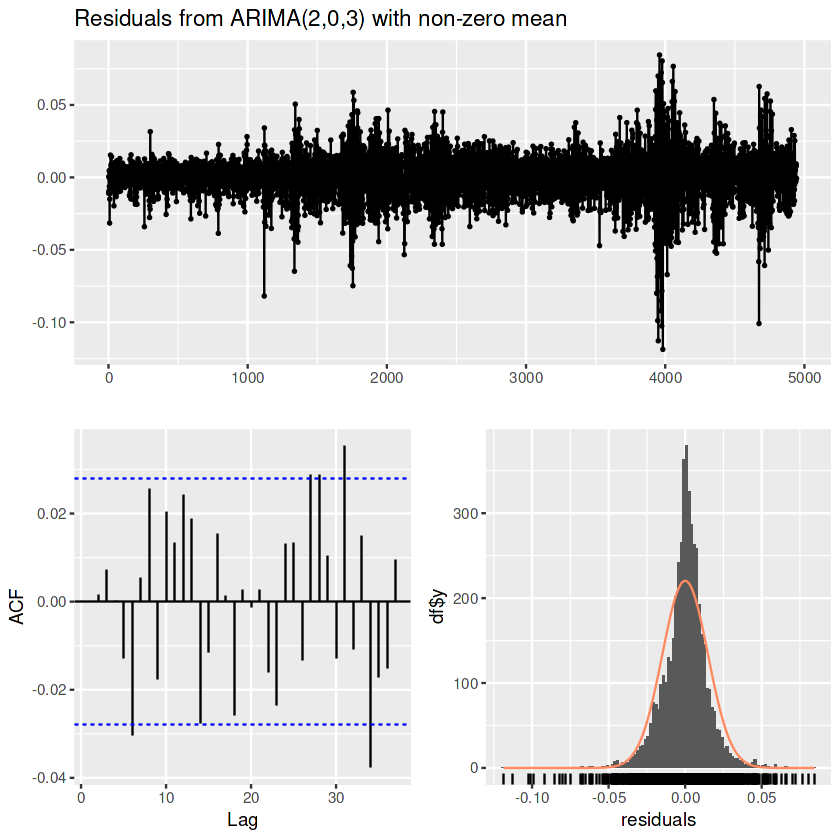


	Ljung-Box test

data:  Residuals from ARIMA(3,0,3) with non-zero mean
Q* = 12.606, df = 4, p-value = 0.01337

Model df: 6.   Total lags used: 10



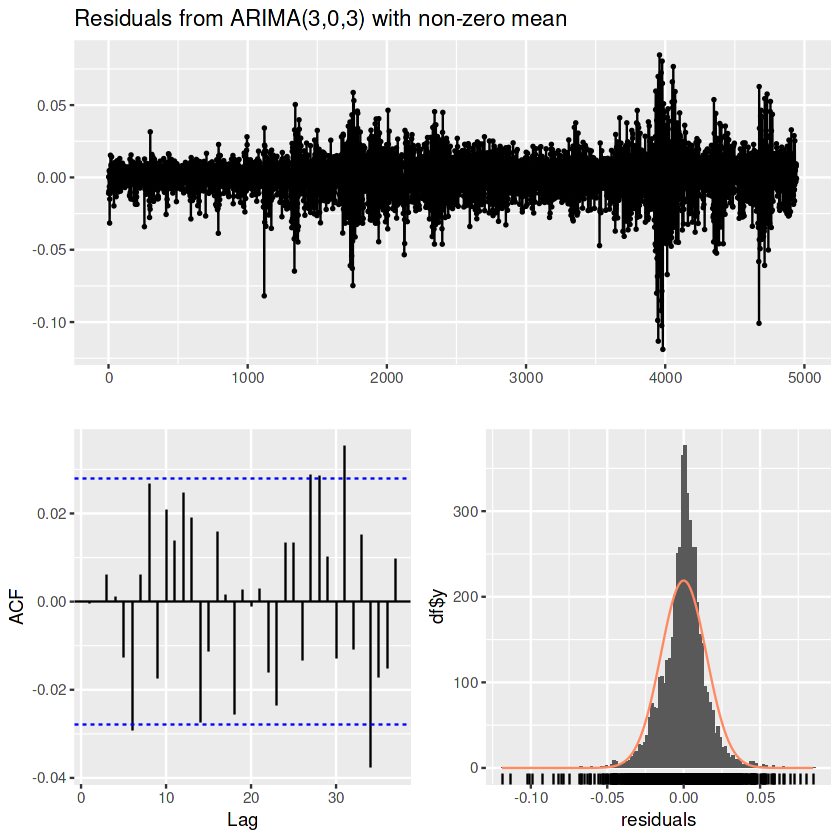

In [106]:
checkresiduals(slingshots_arma1)
checkresiduals(slingshots_arma2)
checkresiduals(slingshots_arma3)
checkresiduals(slingshots_arma4)

checkresiduals(slingshots_arma5)
checkresiduals(slingshots_arma6)
checkresiduals(slingshots_arma7)
checkresiduals(slingshots_arma8)

checkresiduals(slingshots_arma9)
checkresiduals(slingshots_arma10)
checkresiduals(slingshots_arma11)
checkresiduals(slingshots_arma12)

checkresiduals(slingshots_arma13)
checkresiduals(slingshots_arma14)
checkresiduals(slingshots_arma15)
checkresiduals(slingshots_arma16)

In [107]:
opt_fit <- auto.arima(slingshots_train)
opt_fit

Series: slingshots_train 
ARIMA(2,0,2) with zero mean 

Coefficients:
          ar1     ar2     ma1      ma2
      -0.1292  0.6258  0.0644  -0.6209
s.e.   0.1369  0.1068  0.1343   0.0985

sigma^2 = 0.0002223:  log likelihood = 13777.13
AIC=-27544.26   AICc=-27544.25   BIC=-27511.73

In [108]:
# models with acceptable p-value
slingshots_arma11

Series: slingshots_train 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
          ar1     ar2     ma1      ma2   mean
      -0.1512  0.6085  0.0855  -0.6056  2e-04
s.e.   0.1491  0.1173  0.1466   0.1084  2e-04

sigma^2 = 0.0002223:  log likelihood = 13777.5
AIC=-27542.99   AICc=-27542.98   BIC=-27503.96

#### 4. If the series has a high correlation with another model, make an additional set of models that use the same set up as was tried in 3. but now using the ARIMAX model version using the predictions from the correlated model as an additional input to the models 

In [109]:

# use our best model ARIMA(1,0,3) to predict 200 future points for guitars
pred <- forecast(guitars_arma14,200) # create pred for all 200 points
# Add in the forecasted 200 points for the guitars time series for the ARIMAX model predictions for slingshots
additional_guitars_200 <- pred$mean
# Fit ARIMAX model for slingshots (guitars doesnt have any seasonality so we just use the non-seasonal orders)
slingshots_arimax <- arimax(slingshots_train, xreg=guitars_train, order=c(1,0,3))

slingshots_residuals_arimax <- residuals(slingshots_arimax)

In [110]:

# use our best model ARIMA(2,0,2) to predict 200 future points for slingshots
pred <- forecast(slingshots_arma11,200) # create pred for all 200 points
# Add in the forecasted 200 points for the slinghsots time series for the ARIMAX model predictions for guitars
additional_slingshots_200 <- pred$mean
# Fit ARIMAX model for guitars (slingshots doesnt have any seasonality so we just use the non-seasonal orders)
guitars_arimax <- arimax(guitars_train, xreg=slingshots_train, order=c(2,0,2))

guitars_residuals_arimax <- residuals(guitars_arimax)

#### 5. For capturing volatility in the models an additional set of models are produced using the training data with GARCH and the model makeups from 3. and 4. as additional models to evaluate for performance in order to find the best model fit for the time series currently being investigated 

In [111]:
# Fit GARCH(1,1) model (simplest as the first GARCH model) to residuals from ARIMAX
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(1,3), include.mean = TRUE, external.regressors = matrix(guitars_train, ncol = 1))
)
slingshots_garch <- ugarchfit(spec, data = slingshots_residuals_arimax)

In [112]:
# Fit GARCH(1,1) model (simplest as the first GARCH model) to residuals from ARIMAX
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(2,2), include.mean = TRUE, external.regressors = matrix(slingshots_train, ncol = 1))
)
guitars_garch <- ugarchfit(spec, data = guitars_residuals_arimax)

#### 6. Using the test/evaluation set we now evaluate which of the models collected up to now that makes the best fit on the actual data. The best performing model will be chosen for predicting the extrapolated 200 point.

In [113]:
# We have 3 different models for slingshots forecasting to be evaluated on the test set to find the best performing model for forecasting
slingshots_arma11
slingshots_arimax
slingshots_garch

Series: slingshots_train 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
          ar1     ar2     ma1      ma2   mean
      -0.1512  0.6085  0.0855  -0.6056  2e-04
s.e.   0.1491  0.1173  0.1466   0.1084  2e-04

sigma^2 = 0.0002223:  log likelihood = 13777.5
AIC=-27542.99   AICc=-27542.98   BIC=-27503.96


Call:
arimax(x = slingshots_train, order = c(1, 0, 3), xreg = guitars_train)

Coefficients:
          ar1     ma1      ma2      ma3  intercept    xreg
      -0.8648  0.6346  -0.1848  -0.0293      0e+00  0.5612
s.e.   0.0539  0.0558   0.0219   0.0156      1e-04  0.0117

sigma^2 estimated as 0.0001532:  log likelihood = 14694.49,  aic = -29376.98


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,3)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.000051    0.000149     0.34274 0.731798
ar1    -0.918744    0.012921   -71.10556 0.000000
ma1     1.014581    0.000028 36833.79869 0.000000
ma2     0.072656    0.014833     4.89834 0.000001
ma3     0.009655    0.005802     1.66402 0.096109
mxreg1 -0.098260    0.012393    -7.92847 0.000000
omega   0.000003    0.000001     2.73764 0.006188
alpha1  0.089217    0.009244     9.65095 0.000000
beta1   0.891365    0.010787    82.63066 0.000000

Robust Standard Errors:
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.000051    0.000151     0.33754 0.735710
ar1    -0.918744    0.013839   -66.38830 0.000000
ma1     1.014581

In [114]:
# We have 3 different models for guitars forecasting to be evaluated on the test set to find the best performing model for forecasting
guitars_arma14
guitars_arimax
guitars_garch

Series: guitars_train 
ARIMA(1,0,3) with non-zero mean 

Coefficients:
          ar1     ma1      ma2      ma3   mean
      -0.7323  0.7268  -0.0331  -0.0509  2e-04
s.e.   0.1252  0.1254   0.0175   0.0146  2e-04

sigma^2 = 0.0002284:  log likelihood = 13710.57
AIC=-27409.14   AICc=-27409.12   BIC=-27370.1


Call:
arimax(x = guitars_train, order = c(2, 0, 2), xreg = slingshots_train)

Coefficients:
          ar1     ar2     ma1      ma2  intercept    xreg
      -0.5914  0.2797  0.4127  -0.4037      1e-04  0.5768
s.e.   0.1602  0.0809  0.1586   0.0689      1e-04  0.0125

sigma^2 estimated as 0.0001601:  log likelihood = 14585.66,  aic = -29159.33


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(2,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000385    0.000134   2.8810 0.003964
ar1     1.518321    0.005817 261.0277 0.000000
ar2    -0.927177    0.027259 -34.0132 0.000000
ma1    -1.496348    0.017758 -84.2652 0.000000
ma2     0.913069    0.030246  30.1879 0.000000
mxreg1 -0.086398    0.011544  -7.4839 0.000000
omega   0.000001    0.000001   1.2954 0.195190
alpha1  0.090222    0.014061   6.4163 0.000000
beta1   0.904017    0.013925  64.9202 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000385    0.000163   2.36374 0.018092
ar1     1.518321    0.030845  49.22452 0.000000
ar2    -0.927177    0.022751 -40.75379 0.000000
ma1 

In [115]:
# Slingshots ARMA evaluation on test data
pred_opt <- forecast(slingshots_arma11,200) # create pred for 200 points to evaluatea against the test data (of size 200)
slingshots_pred_values_arma <- as.numeric(pred_opt$mean)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
slingshots_arma_mae <- mean(abs(slingshots_test - slingshots_pred_values_arma))
# Root Mean Squared Error
slingshots_arma_rmse <- sqrt(mean((slingshots_test - slingshots_pred_values_arma)^2))

slingshots_arma_aic <- AIC(slingshots_arma11)
slingshots_arma_bic <- BIC(slingshots_arma11)

In [116]:
# Slingshots ARIMAX evaluation on test data
slingshots_arimax_forecast <- predict(slingshots_arimax, n.ahead = 200, newxreg = as.matrix(additional_guitars_200))
slingshots_pred_values_arimax <- as.numeric(slingshots_arimax_forecast$pred)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
slingshots_arimax_mae <- mean(abs(slingshots_test - slingshots_pred_values_arimax))
# Root Mean Squared Error
slingshots_arimax_rmse <- sqrt(mean((slingshots_test - slingshots_pred_values_arimax)^2))

slingshots_arimax_aic <- AIC(slingshots_arimax)
slingshots_arimax_bic <- BIC(slingshots_arimax)

In [117]:
# Slingshots GARCH evaluation on test data
slingshots_garch_forecast <- ugarchforecast(slingshots_garch, n.ahead = 200, external.forecasts = list(mregfor = matrix(additional_guitars_200, ncol = 1)))
slingshots_pred_values_garch <- as.numeric(fitted(slingshots_garch_forecast))

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
slingshots_garch_mae <- mean(abs(slingshots_test - slingshots_pred_values_garch))
# Root Mean Squared Error
slingshots_garch_rmse <- sqrt(mean((slingshots_test - slingshots_pred_values_garch)^2))
ic <- infocriteria(slingshots_garch)
slingshots_garch_aic <- ic[1]
slingshots_garch_bic <- ic[2]

In [118]:
rmse_values <- c(slingshots_arma_rmse, slingshots_arimax_rmse, slingshots_garch_rmse)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(rmse_values)]
cat("Best model based on RMSE is:", best_model, "\n")

Best model based on RMSE is: ARMA 


In [119]:
mae_values <- c(slingshots_arma_mae, slingshots_arimax_mae, slingshots_garch_mae)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(mae_values)]
cat("Best model based on MAE is:", best_model, "\n")

Best model based on MAE is: ARMA 


In [120]:
aic_values <- c(slingshots_arma_aic, slingshots_arimax_aic, slingshots_garch_aic)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(aic_values)]
cat("Best model based on AIC is:", best_model, "\n")

Best model based on AIC is: ARIMAX 


In [121]:
bic_values <- c(slingshots_arma_bic, slingshots_arimax_bic, slingshots_garch_bic)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(bic_values)]
cat("Best model based on BIC is:", best_model, "\n")

Best model based on BIC is: ARIMAX 


Best slingshots model by majority: tie arma/arimax

In [122]:
# Guitars ARMA evaluation on test data
pred_opt <- forecast(guitars_arma14,200) # create pred for 200 points to evaluatea against the test data (of size 200)
guitars_pred_values_arma <- as.numeric(pred_opt$mean)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
guitars_arma_mae <- mean(abs(guitars_test - guitars_pred_values_arma))
# Root Mean Squared Error
guitars_arma_rmse <- sqrt(mean((guitars_test - guitars_pred_values_arma)^2))

guitars_arma_aic <- AIC(guitars_arma14)
guitars_arma_bic <- BIC(guitars_arma14)

In [123]:
# Guitars ARIMAX evaluation on test data
guitars_arimax_forecast <- predict(guitars_arimax, n.ahead = 200, newxreg = as.matrix(additional_slingshots_200))
guitars_pred_values_arimax <- as.numeric(guitars_arimax_forecast$pred)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
guitars_arimax_mae <- mean(abs(guitars_test - guitars_pred_values_arimax))
# Root Mean Squared Error
guitars_arimax_rmse <- sqrt(mean((guitars_test - guitars_pred_values_arimax)^2))

guitars_arimax_aic <- AIC(guitars_arimax)
guitars_arimax_bic <- BIC(guitars_arimax)

In [124]:
# Guitars GARCH evaluation on test data
guitars_garch_forecast <- ugarchforecast(guitars_garch, n.ahead = 200)
guitars_pred_values_garch <- as.numeric(fitted(guitars_garch_forecast))

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
guitars_garch_mae <- mean(abs(guitars_test - guitars_pred_values_garch))
# Root Mean Squared Error
guitars_garch_rmse <- sqrt(mean((guitars_test - guitars_pred_values_garch)^2))
ic <- infocriteria(guitars_garch)
guitars_garch_aic <- ic[1]
guitars_garch_bic <- ic[2]

In [125]:
rmse_values <- c(guitars_arma_rmse, guitars_arimax_rmse, guitars_garch_rmse)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(rmse_values)]
cat("Best model based on RMSE is:", best_model, "\n")

Best model based on RMSE is: GARCH 


In [126]:
mae_values <- c(guitars_arma_mae, guitars_arimax_mae, guitars_garch_mae)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(mae_values)]
cat("Best model based on MAE is:", best_model, "\n")

Best model based on MAE is: GARCH 


In [127]:
aic_values <- c(guitars_arma_aic, guitars_arimax_aic, guitars_garch_aic)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(aic_values)]
cat("Best model based on AIC is:", best_model, "\n")

Best model based on AIC is: ARIMAX 


In [128]:
bic_values <- c(guitars_arma_bic, guitars_arimax_bic, guitars_garch_bic)

model_names <- c("ARMA", "ARIMAX", "GARCH")
best_model <- model_names[which.min(bic_values)]
cat("Best model based on BIC is:", best_model, "\n")

Best model based on BIC is: ARIMAX 


Best guitars model by majority: tie arimax/garch

## Stocks

In [129]:
# for acf and pacf plots we once again use interpolated values for the scattered NA values
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
for (i in c(36,1194,2836,3430,4118)) {
  data[c(i-1,i,i+1),] <- na.approx(data[c(i-1,i,i+1),])   
}
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))

In [130]:
stocks_lr <- data_lr[,13]    # stocks

which(is.na(stocks_lr))    #Looking for missing values in stocks, 5256 is last stocks value

[1]    1  799  800  801  802  803  804  805  806  807  808  809  810  811  812
 [16]  813  814  815  816  817  818  819  820  821  822  823  824  825  826  827
 [31]  828  829  830  831  832  833  834  835  836  837  838  839  840  841  842
 [46]  843  844  845  846  847  848  849 5257 5258 5259 5260 5261 5262 5263 5264
 [61] 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279
 [76] 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294
 [91] 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309
[106] 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324
[121] 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339
[136] 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354
[151] 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369
[166] 5370 5371 5372 5373 5374 5375 5376 5377 5378 5379 5380 5381 5382 5383 5384
[181] 5385 5386 5387 5388 5389 5390 5391 5392 5393 5394 5395 5396 5397 5398 5399
[196] 5400 5401 5402 5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414
[211] 5415 5416 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429
[226] 5430 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444
[241] 5445 5446 5447 5448 5449 5450 5451 5452 5453 5454 5455 5456

Since we in this first run only want to use observed data (no interpolated values) we choose to only model the continuous subsections for the 2 time series. We therefore chop off the time periods with data gaps.

In [131]:
# Create a data frame for smoothly omitting the nan where they occur in any of the time series
stocks_clean <- na.omit(stocks_lr)

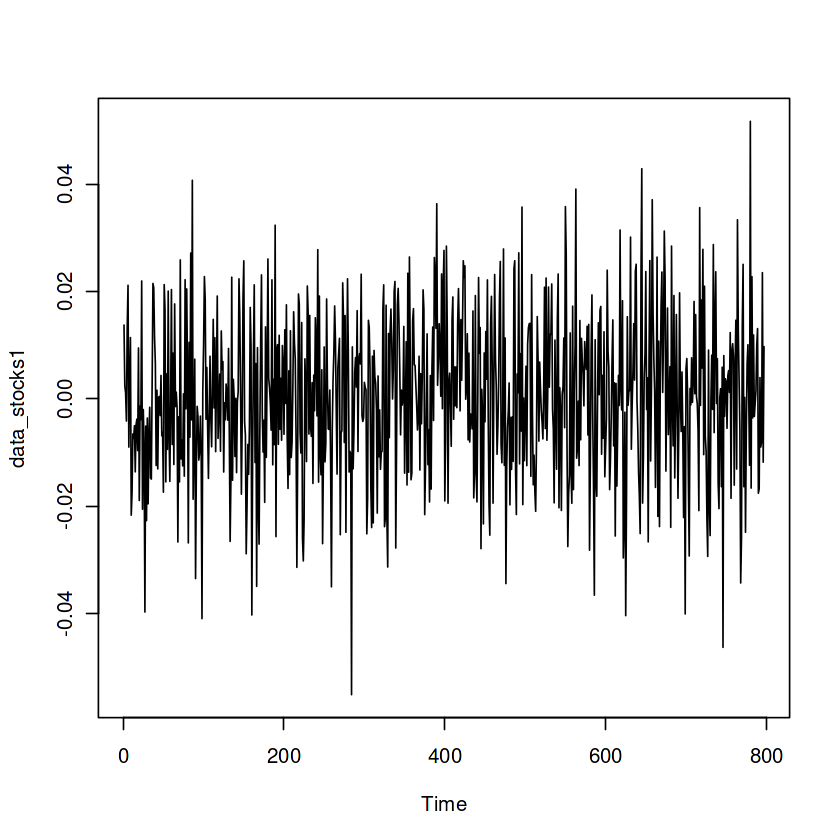

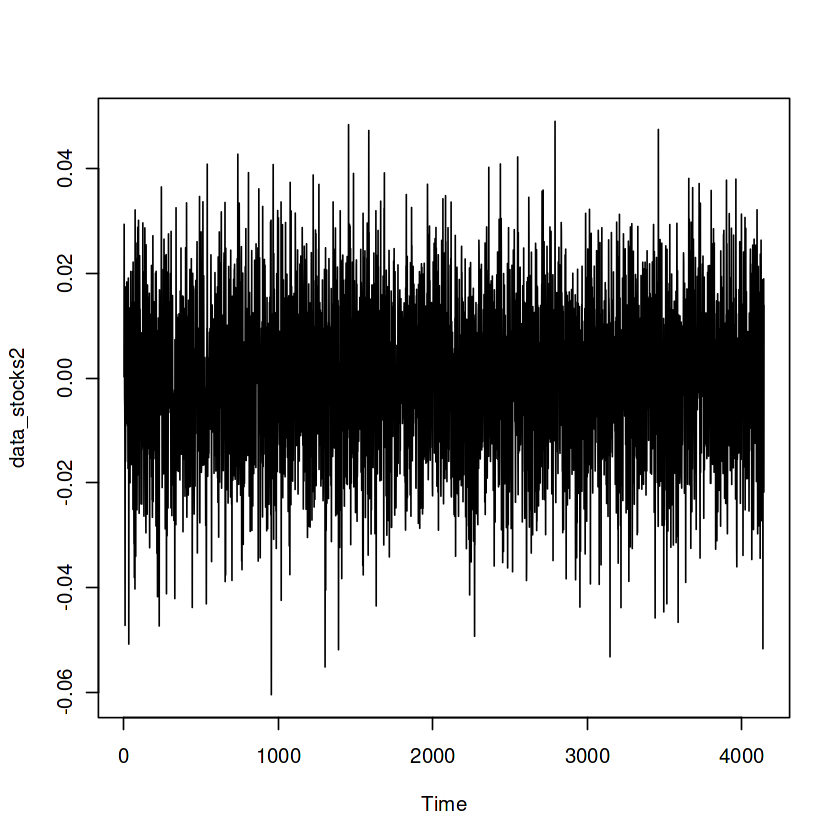

In [132]:
data_stocks1 <- stocks_clean[2:798]   #Creating object consisting of values before the NA gap at the endo of the t.s.
data_stocks2 <- stocks_clean[850:4994]   #Creating object consisting of values before the NA gap at the endo of the t.s.

plot.ts(data_stocks1)   
plot.ts(data_stocks2)

#### 1. Split into train/test/eval for the model fitting and evaluation of the best model approach

In [133]:
index <- 1:(5194 - 200) # to get 200 obs of stocks in test 

stocks_train <- stocks_clean[index]
stocks_test <- stocks_clean[-index]   

#### 2. Look at the ACF and PACF for what param. values for q and p to try out during the model fittings

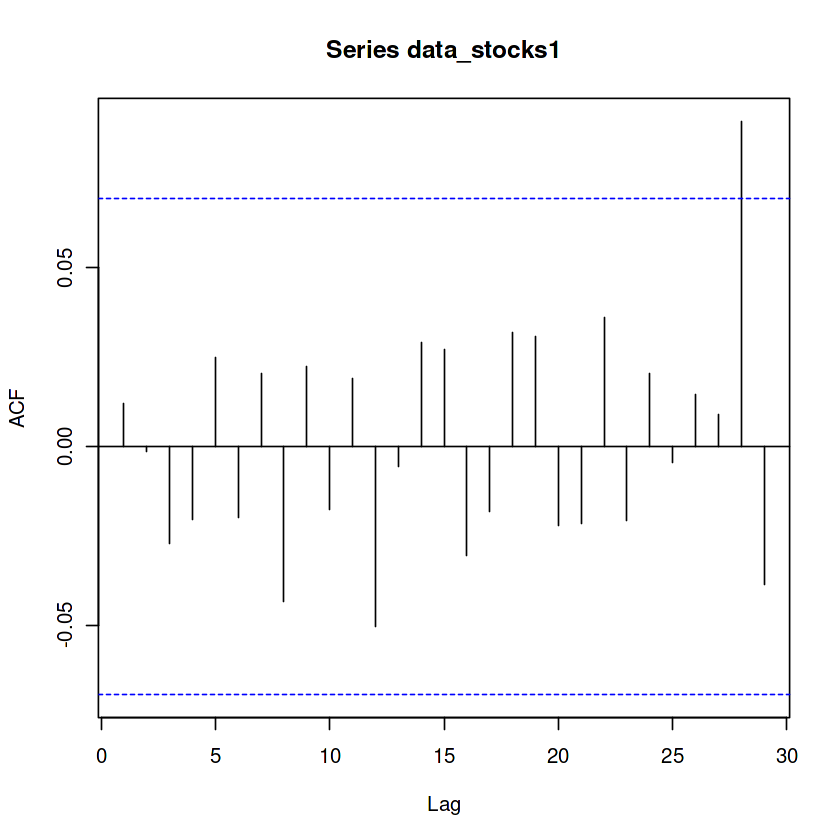

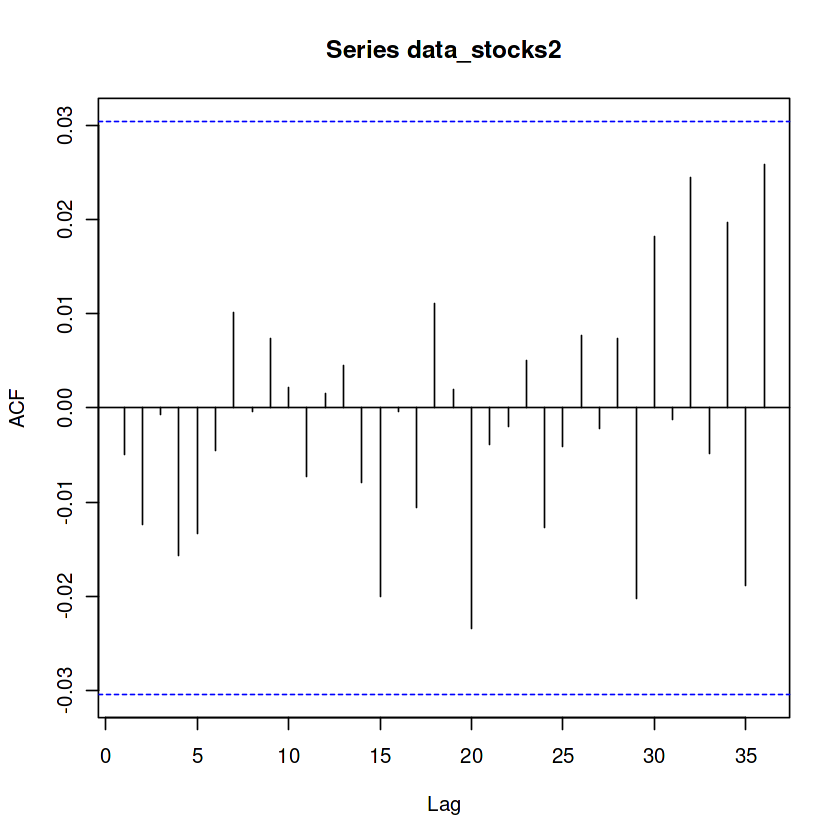

In [134]:
# ACF for stocks (looking at the time series before and after the nan gap separately)
acf(data_stocks1)     
acf(data_stocks2)

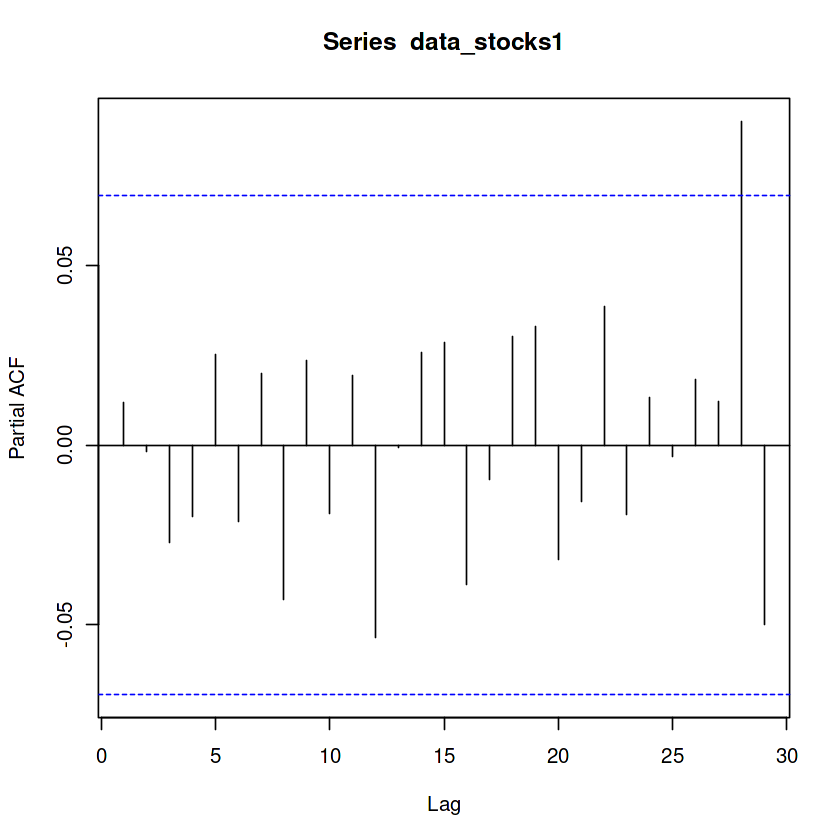

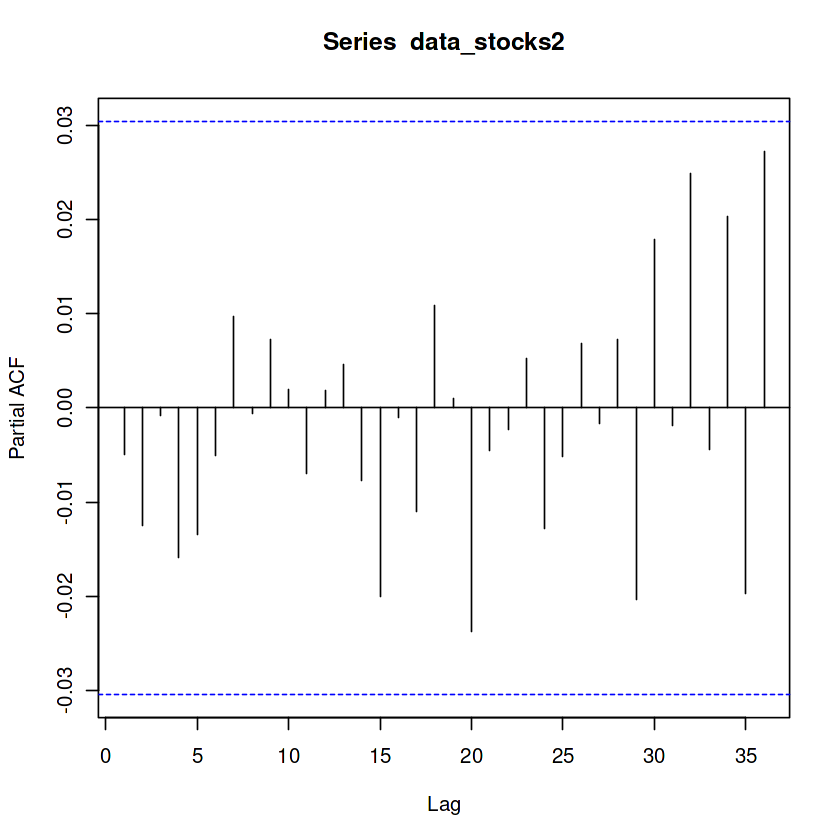

In [135]:
# PACF for stocks (looking at the time series before and after the nan gap separately)
pacf(data_stocks1)     #Looking at pacf
pacf(data_stocks2)     #Looking at pacf

In [136]:
# now after ACF and PACF we replace the scattered outliers with values > 100 by NA
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))
stocks_lr <- data_lr[,13]    #stocks

stocks_clean <- na.omit(stocks_lr)

index <- 1:(5194 - 200) 
stocks_train <- stocks_clean[index]
stocks_test <- stocks_clean[-index] 


- q={0,1},
- p={0,1}, 
- d=0 (since we already differentiated by taking the log-returns of the time series)
#### As the ADF tests conducted had that all series with the log return transformation were stationary we can assume stationarity

#### 3. Train/fit the models on the training data 


In [137]:
stocks_arma1 <- Arima(stocks_train, order = c(0,0,0))
stocks_arma2 <- Arima(stocks_train, order = c(1,0,0))
stocks_arma3 <- Arima(stocks_train, order = c(0,0,1))
stocks_arma4 <- Arima(stocks_train, order = c(1,0,1))


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 4.7905, df = 10, p-value = 0.9047

Model df: 0.   Total lags used: 10



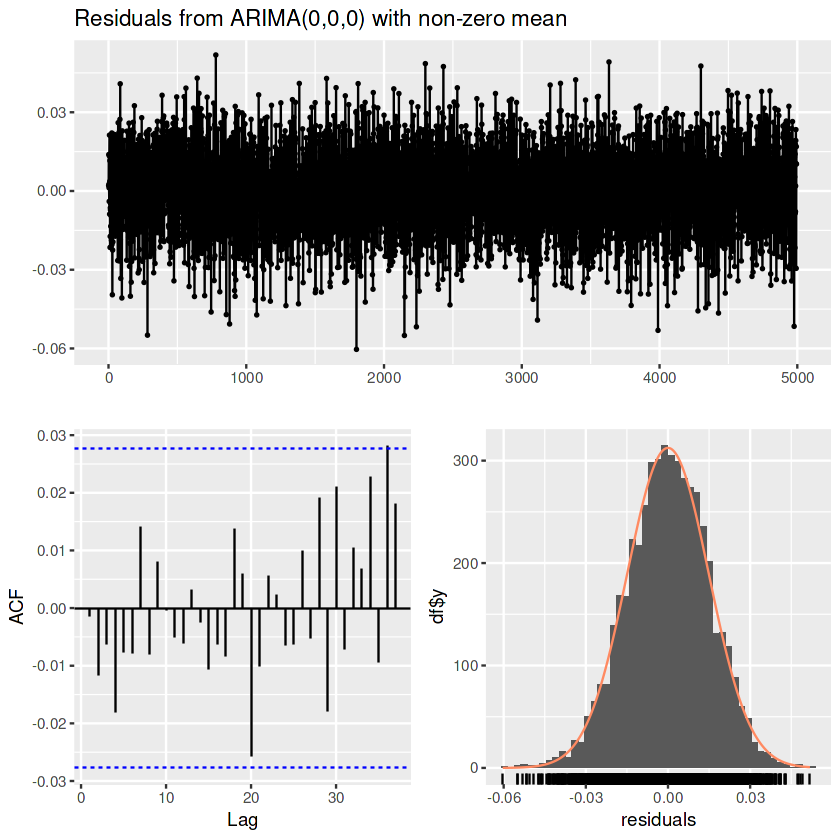


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 4.7832, df = 9, p-value = 0.8528

Model df: 1.   Total lags used: 10



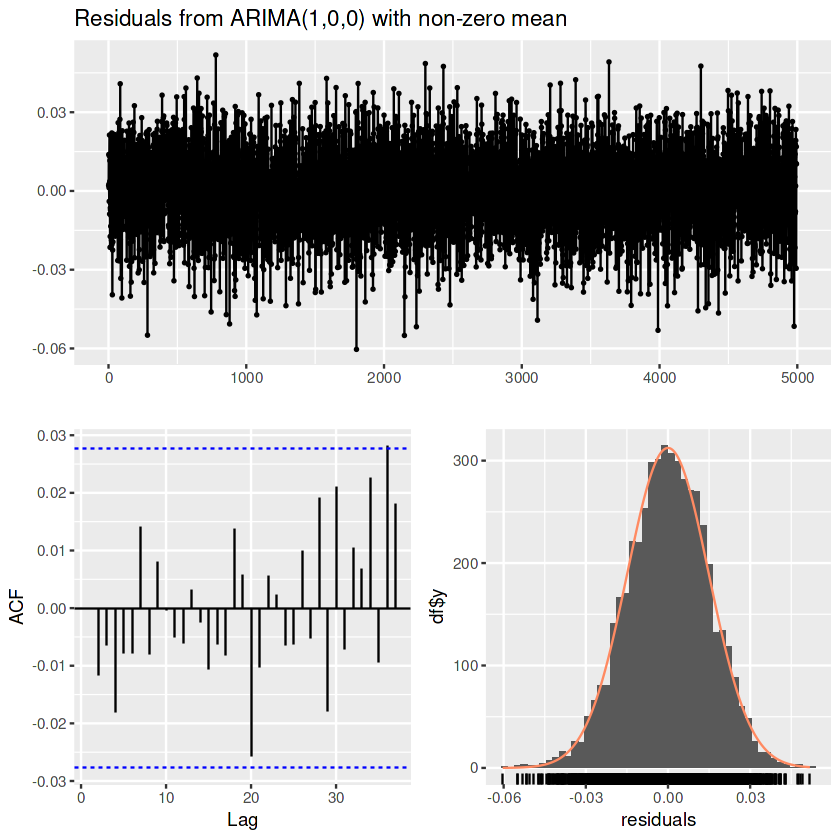


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 4.7831, df = 9, p-value = 0.8528

Model df: 1.   Total lags used: 10



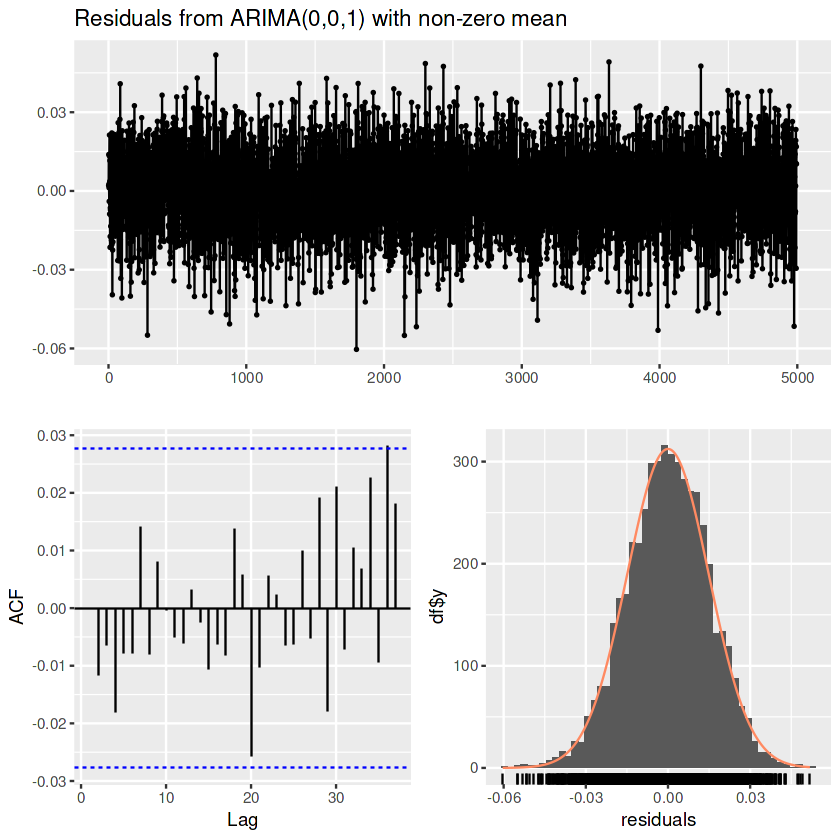


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 4.79, df = 8, p-value = 0.7798

Model df: 2.   Total lags used: 10



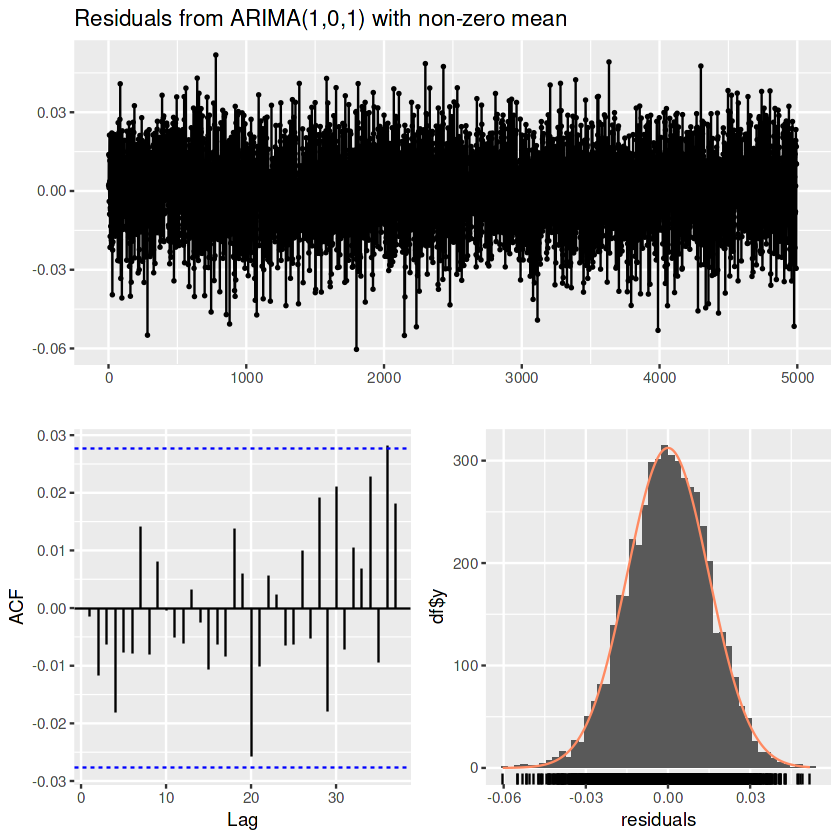

In [138]:
checkresiduals(stocks_arma1)
checkresiduals(stocks_arma2)
checkresiduals(stocks_arma3)
checkresiduals(stocks_arma4)

In [139]:
opt_fit <- auto.arima(guitars_train)
opt_fit

Series: guitars_train 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.0002288:  log likelihood = 13703.46
AIC=-27404.91   AICc=-27404.91   BIC=-27398.41

In [140]:
# models with acceptable p-value
stocks_arma1 # <- looks bet regarding AIC
stocks_arma2
stocks_arma3
stocks_arma4

Series: stocks_train 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
        mean
      -1e-04
s.e.   2e-04

sigma^2 = 0.000222:  log likelihood = 13920.69
AIC=-27837.38   AICc=-27837.38   BIC=-27824.35

Series: stocks_train 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1    mean
      -0.0014  -1e-04
s.e.   0.0141   2e-04

sigma^2 = 0.0002221:  log likelihood = 13920.7
AIC=-27835.39   AICc=-27835.39   BIC=-27815.84

Series: stocks_train 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1    mean
      -0.0015  -1e-04
s.e.   0.0143   2e-04

sigma^2 = 0.0002221:  log likelihood = 13920.7
AIC=-27835.39   AICc=-27835.39   BIC=-27815.84

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: stocks_train 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
      ar1     ma1    mean
        0  -1e-04  -1e-04
s.e.  NaN     NaN   2e-04

sigma^2 = 0.0002221:  log likelihood = 13920.69
AIC=-27833.38   AICc=-27833.37   BIC=-27807.32

#### 4. If the series has a high correlation with another model, make an additional set of models that use the same set up as was tried in 3. but now using the ARIMAX model version using the predictions from the correlated model as an additional input to the models. 

##### Stocks doesn't have such a time series

#### 5. For capturing volatility in the models an additional set of models are produced using the training data with GARCH and the model makeups from 3. and 4. as additional models to evaluate for performance in order to find the best model fit for the time series currently being investigated 

In [141]:
# Fit GARCH(1,1) model (simplest as the first GARCH model), arma order according to the order values found previously
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(0,0), include.mean = TRUE)
)
stocks_garch <- ugarchfit(spec, data = stocks_train)

#### 6. Using the test/evaluation set we now evaluate which of the models collected up to now that makes the best fit on the actual data. The best performing model will be chosen for predicting the extrapolated 200 point.

In [142]:
# We have 2 different models for stocks forecasting to be evaluated on the test set to find the best performing model for forecasting
stocks_arma1
stocks_garch

Series: stocks_train 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
        mean
      -1e-04
s.e.   2e-04

sigma^2 = 0.000222:  log likelihood = 13920.69
AIC=-27837.38   AICc=-27837.38   BIC=-27824.35


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu     -0.000117    0.000211    -0.55655  0.57783
omega   0.000000    0.000000   137.45163  0.00000
alpha1  0.000126    0.000005    27.27850  0.00000
beta1   0.998170    0.000045 22396.36833  0.00000

Robust Standard Errors:
        Estimate  Std. Error     t value Pr(>|t|)
mu     -0.000117    0.000201    -0.58315  0.55979
omega   0.000000    0.000000   510.39815  0.00000
alpha1  0.000126    0.000011    11.74483  0.00000
beta1   0.998170    0.000036 27411.25652  0.00000

LogLikelihood : 13920.53 

Information Criteria
------------------------------------
                    
Akaike       -5.5733
Bayes        -5.5681
Shibata      -5.5

#### How do the models perform on the test data

In [143]:
# Stocks ARMA evaluation on test data
pred_opt <- forecast(stocks_arma1,200) # create pred for 200 points to evaluatea against the test data (of size 200)
stocks_pred_values_arma <- as.numeric(pred_opt$mean)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
stocks_arma_mae <- mean(abs(stocks_test - stocks_pred_values_arma))
# Root Mean Squared Error
stocks_arma_rmse <- sqrt(mean((stocks_test - stocks_pred_values_arma)^2))

stocks_arma_aic <- AIC(stocks_arma1)
stocks_arma_bic <- BIC(stocks_arma1)

In [144]:
# Stocks GARCH evaluation on test data
stocks_garch_forecast <- ugarchforecast(stocks_garch, n.ahead = 200)
stocks_pred_values_garch <- as.numeric(fitted(stocks_garch_forecast))

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
stocks_garch_mae <- mean(abs(stocks_test - stocks_pred_values_garch))
# Root Mean Squared Error
stocks_garch_rmse <- sqrt(mean((stocks_test - stocks_pred_values_garch)^2))
ic <- infocriteria(stocks_garch)
stocks_garch_aic <- ic[1]
stocks_garch_bic <- ic[2]

In [145]:
rmse_values <- c(stocks_arma_rmse, stocks_garch_rmse)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(rmse_values)]
cat("Best model based on RMSE is:", best_model, "\n")

Best model based on RMSE is: GARCH 


In [146]:
mae_values <- c(stocks_arma_mae, stocks_garch_mae)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(mae_values)]
cat("Best model based on MAE is:", best_model, "\n")

Best model based on MAE is: GARCH 


In [147]:
aic_values <- c(stocks_arma_aic, stocks_garch_aic)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(aic_values)]
cat("Best model based on AIC is:", best_model, "\n")

Best model based on AIC is: ARMA 


In [148]:
bic_values <- c(stocks_arma_bic, stocks_garch_bic)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(bic_values)]
cat("Best model based on BIC is:", best_model, "\n")

Best model based on BIC is: ARMA 


Best stock model by majority: tie garch/arma

## Sugar

In [149]:
# for acf and pacf plots we once again use interpolated values for the scattered NA values
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
for (i in c(36,1194,2836,3430,4118)) {
  data[c(i-1,i,i+1),] <- na.approx(data[c(i-1,i,i+1),])   
}
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))

In [150]:
sugar_lr <- data_lr[,14]    #Sugar

which(is.na(sugar_lr))    #Looking for missing values in sugar

[1]    1  999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012
 [16] 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 [31] 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 [46] 1043 1044 1045 1046 1047 1048 1049 5257 5258 5259 5260 5261 5262 5263 5264
 [61] 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279
 [76] 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294
 [91] 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309
[106] 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324
[121] 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339
[136] 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354
[151] 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369
[166] 5370 5371 5372 5373 5374 5375 5376 5377 5378 5379 5380 5381 5382 5383 5384
[181] 5385 5386 5387 5388 5389 5390 5391 5392 5393 5394 5395 5396 5397 5398 5399
[196] 5400 5401 5402 5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414
[211] 5415 5416 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429
[226] 5430 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444
[241] 5445 5446 5447 5448 5449 5450 5451 5452 5453 5454 5455 5456

Since we in this first run only want to use observed data (no interpolated values) we choose to only model the continuous subsections for the 2 time series. We therefore chop off the time periods with data gaps.

In [151]:
# Create a data frame for smoothly omitting the nan where they occur in any of the time series

sugar_clean <- na.omit(sugar_lr)

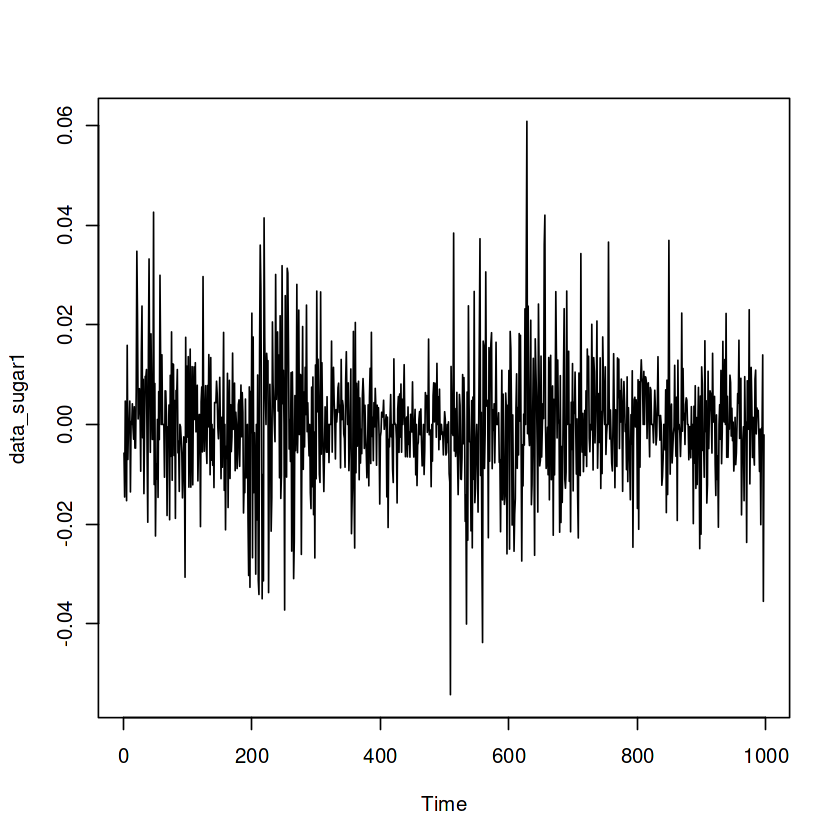

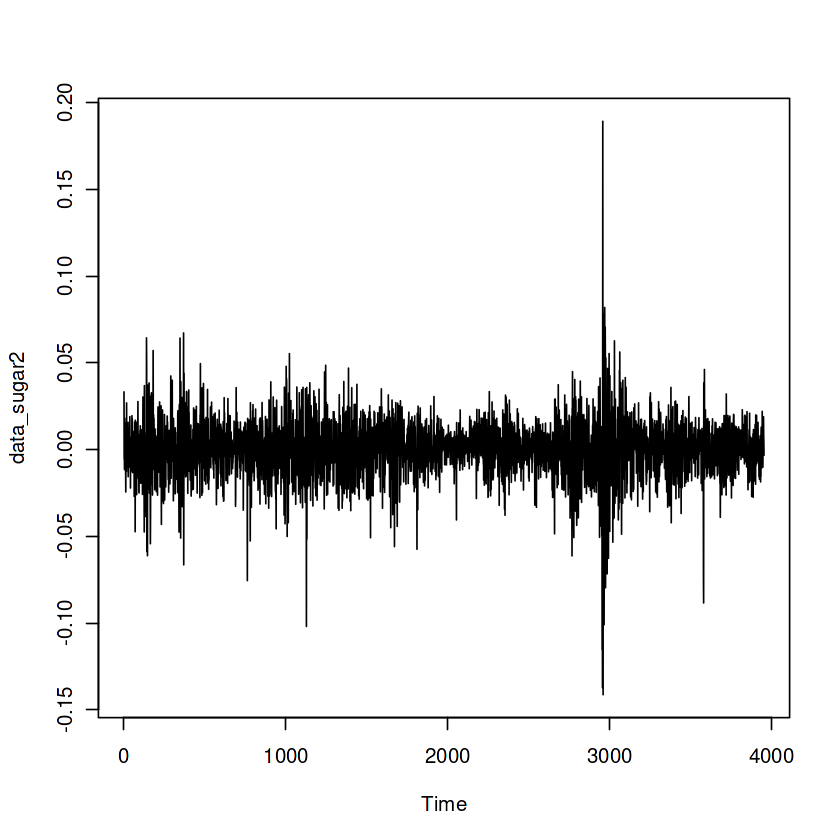

In [152]:
data_sugar1 <- sugar_clean[2:998]   #Creating object consisting of values before the NA gap at the endo of the t.s.
data_sugar2 <- sugar_clean[1050:5004]   #Creating object consisting of values before the NA gap at the endo of the t.s.

plot.ts(data_sugar1)   
plot.ts(data_sugar2)

#### 1. Split into train/test/eval for the model fitting and evaluation of the best model approach

In [153]:
index <- 1:(5204 - 200) # to get 200 obs of sugar in test 

sugar_train <- sugar_clean[index]
sugar_test <- sugar_clean[-index] 

#### 2. Look at the ACF and PACF for what param. values for q and p to try out during the model fittings

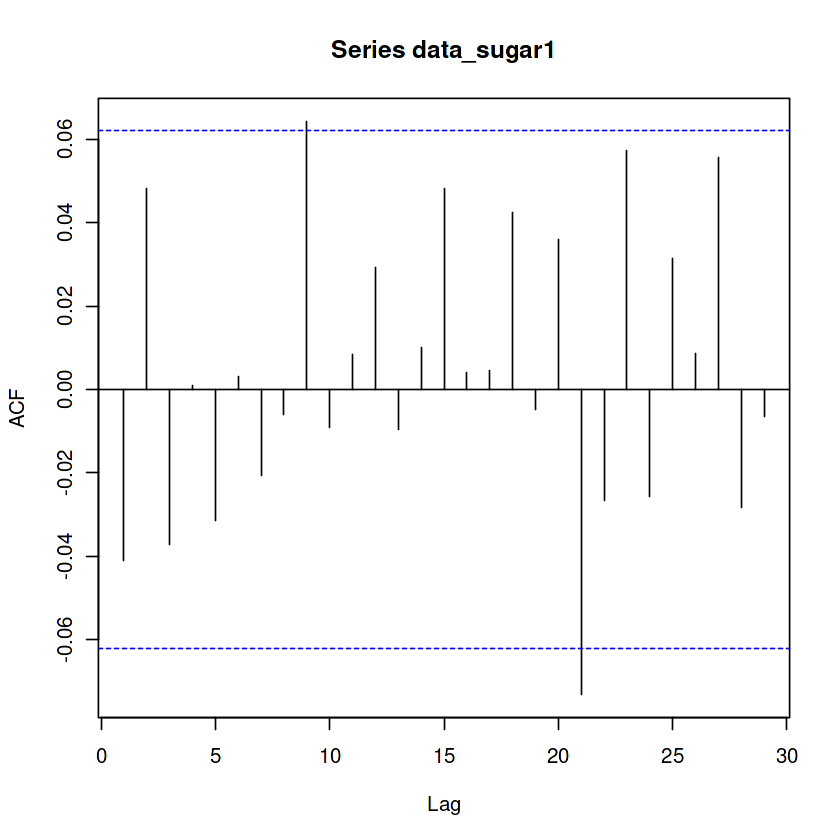

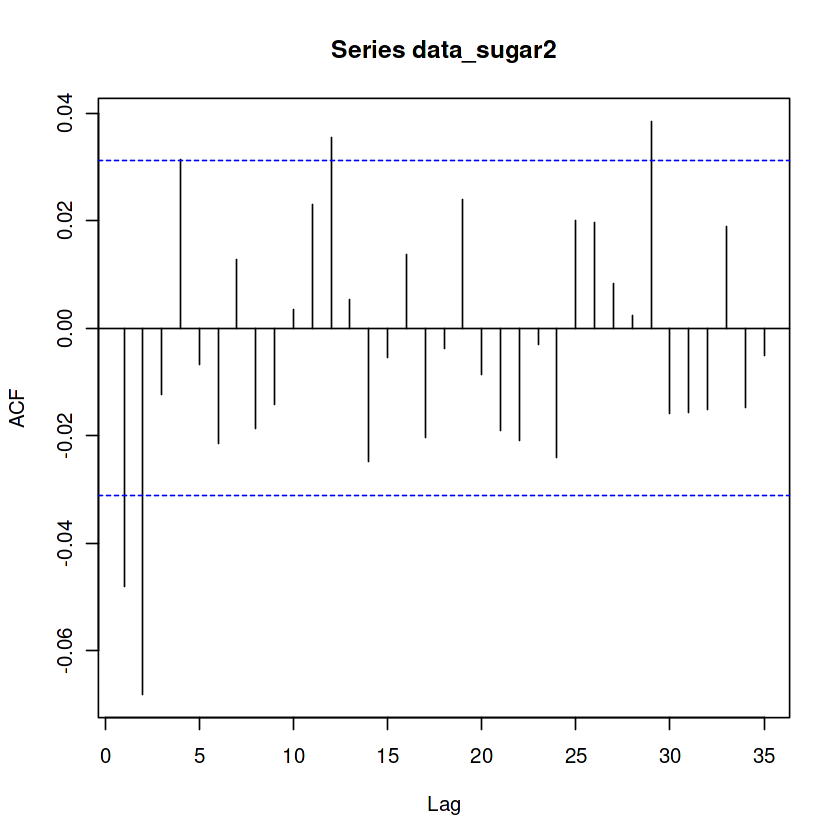

In [154]:
# ACF for stocks (looking at the time series before and after the nan gap separately)
acf(data_sugar1)     
acf(data_sugar2)

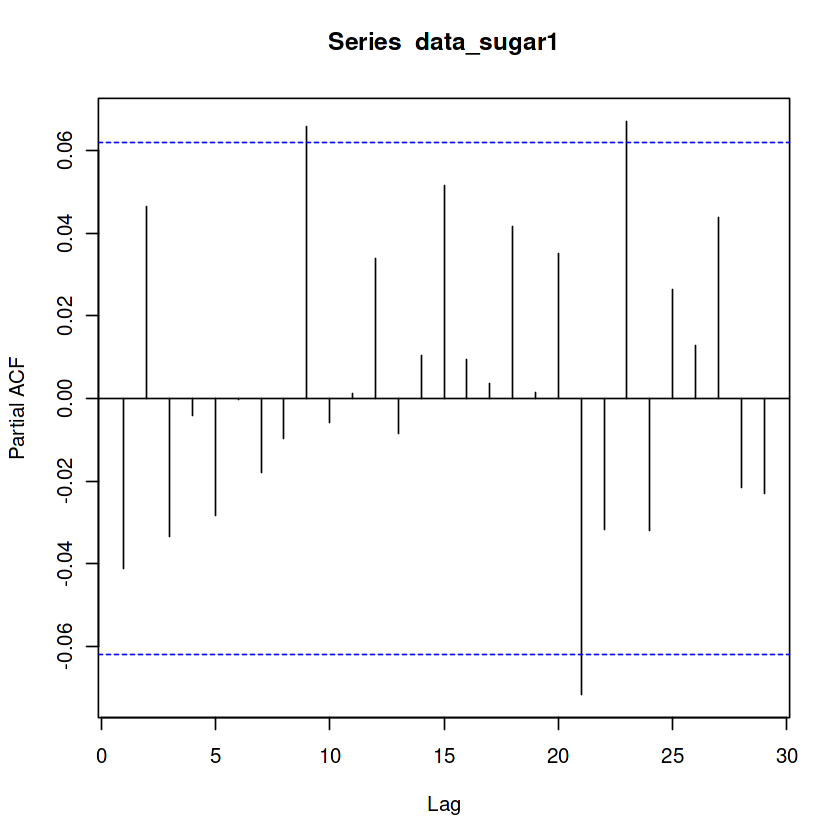

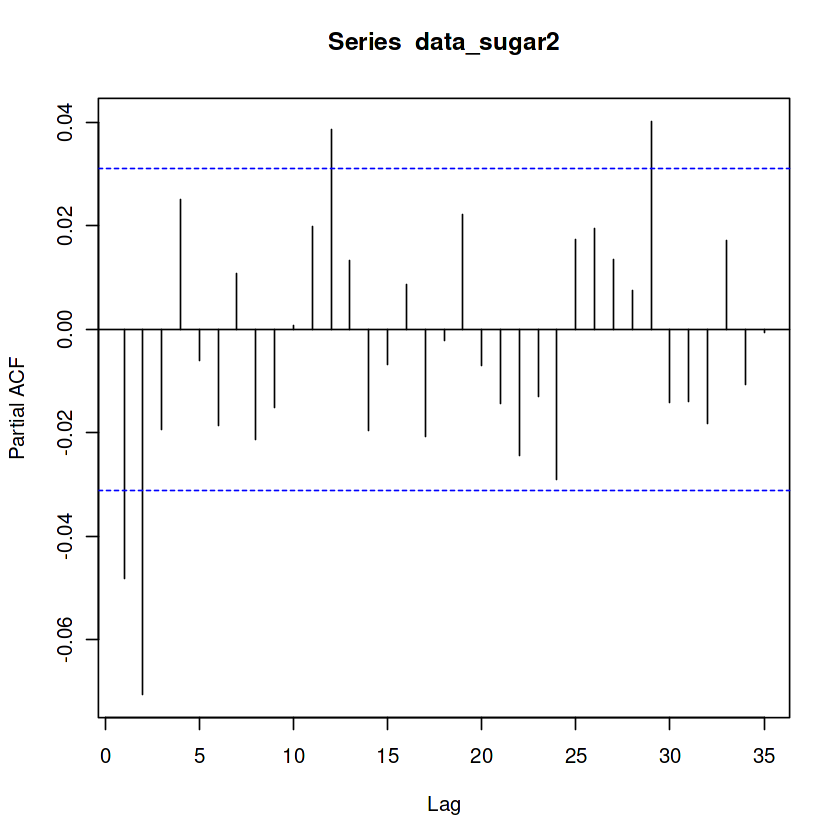

In [155]:
# PACF for gurkor (looking at the time series before and after the nan gap separately)
pacf(data_sugar1)     #Looking at pacf
pacf(data_sugar2)     #Looking at pacf

In [156]:
# now after acf and pacf we redo the cleaning we and replace the outliers with values > 100 by Nan
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))
sugar_lr <- data_lr[,14]    #Sugar

sugar_clean <- na.omit(sugar_lr)

index <- 1:(5194 - 200) # to get 200 obs of sugar in test 
sugar_train <- sugar_clean[index]
sugar_test <- sugar_clean[-index] 



- q={0,1,2},
- p={0,1,2},
- d=0 (since we already differentiated by taking the log-returns of the time series)

As the ADF tests conducted had that all series with the log return transformation were stationary we can assume stationarity

#### 3. Train/fit the models on the training data 

In [157]:
sugar_arma1 <- Arima(sugar_train, order = c(0,0,0))
sugar_arma2 <- Arima(sugar_train, order = c(1,0,0))
sugar_arma3 <- Arima(sugar_train, order = c(2,0,0))

sugar_arma4 <- Arima(sugar_train, order = c(0,0,1))
sugar_arma5 <- Arima(sugar_train, order = c(1,0,1))
sugar_arma6 <- Arima(sugar_train, order = c(2,0,1))

sugar_arma7 <- Arima(sugar_train, order = c(0,0,2))
sugar_arma8 <- Arima(sugar_train, order = c(1,0,2))
sugar_arma9 <- Arima(sugar_train, order = c(2,0,2))


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 33.777, df = 10, p-value = 0.0002015

Model df: 0.   Total lags used: 10



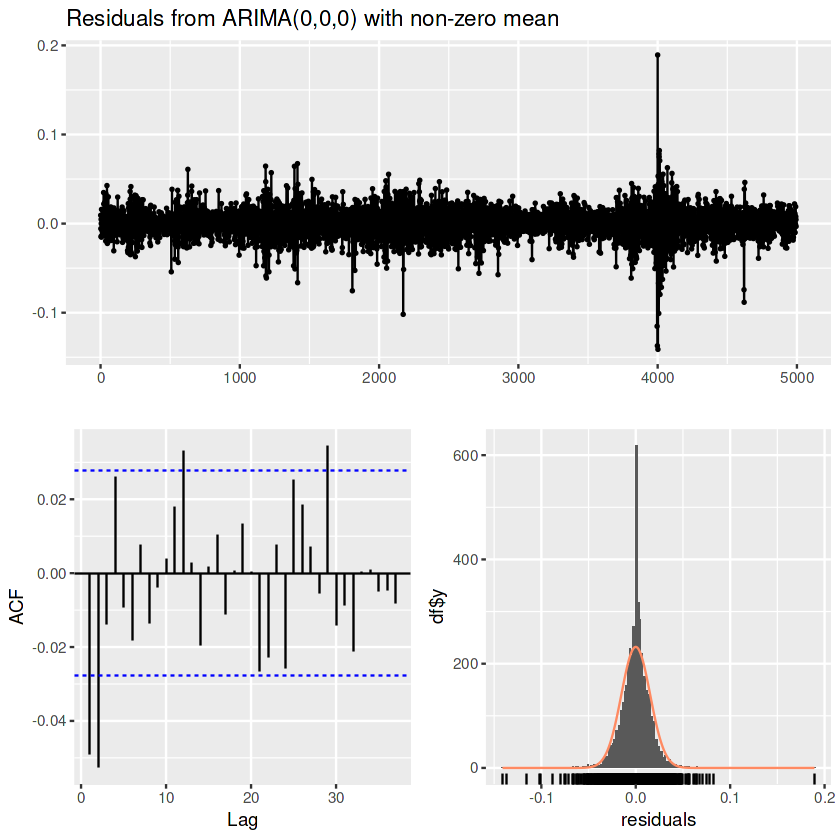


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 23.506, df = 9, p-value = 0.005155

Model df: 1.   Total lags used: 10



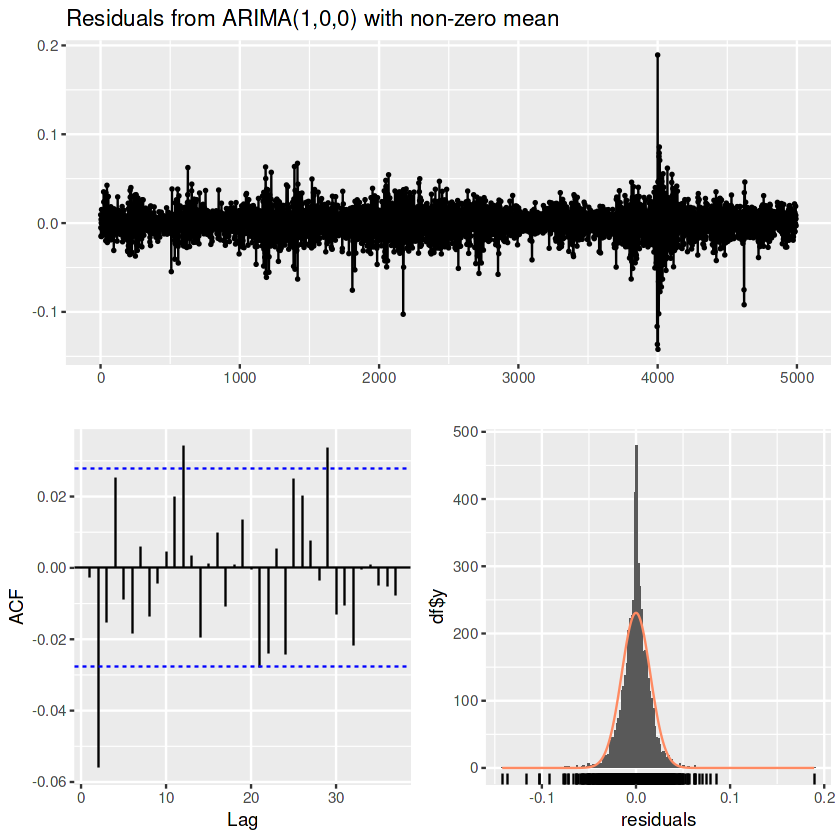


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 7.4568, df = 8, p-value = 0.4882

Model df: 2.   Total lags used: 10



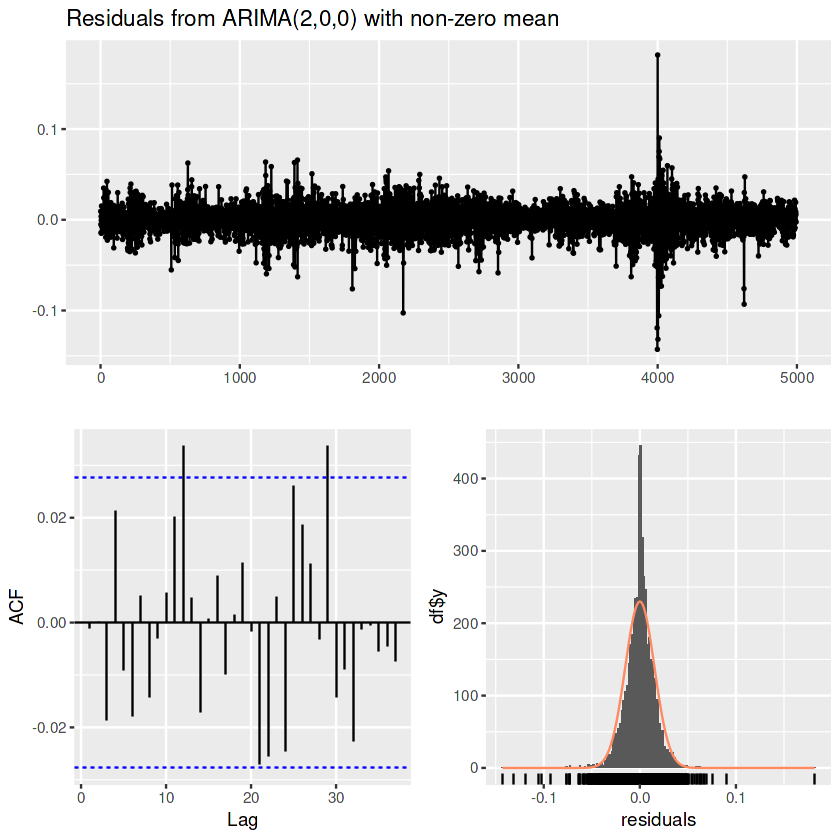


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 21.991, df = 9, p-value = 0.008909

Model df: 1.   Total lags used: 10



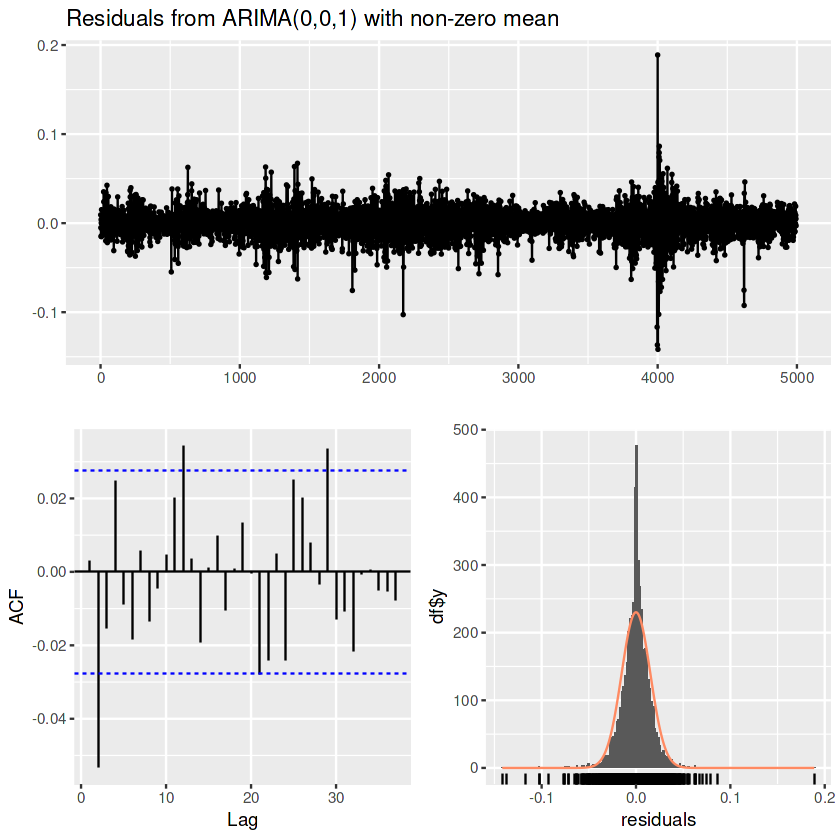


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 10.735, df = 8, p-value = 0.2172

Model df: 2.   Total lags used: 10



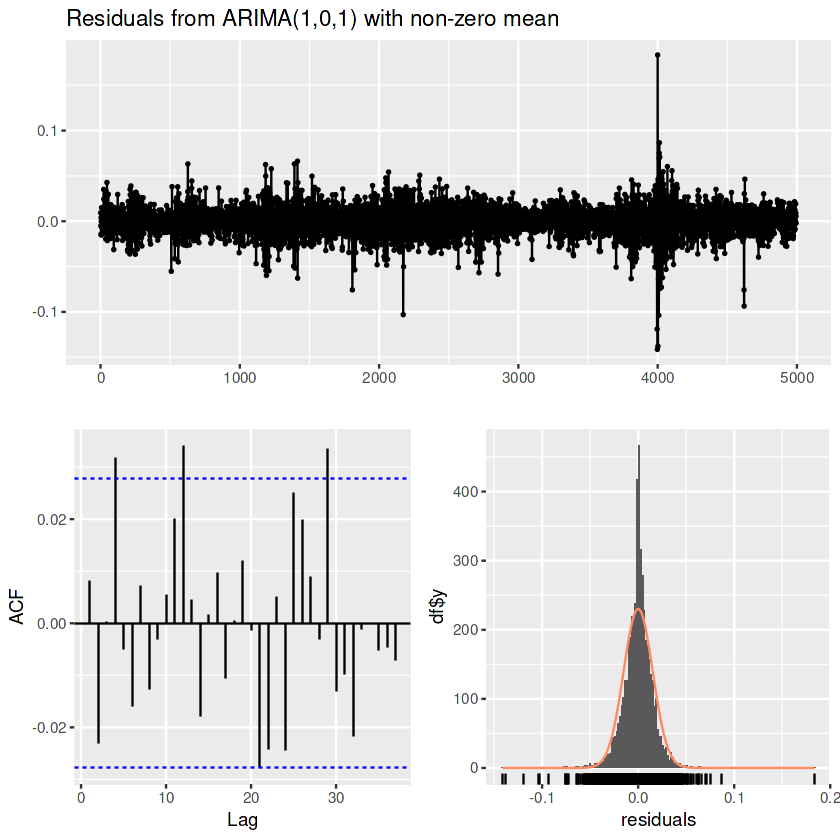


	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with non-zero mean
Q* = 6.4272, df = 7, p-value = 0.4908

Model df: 3.   Total lags used: 10



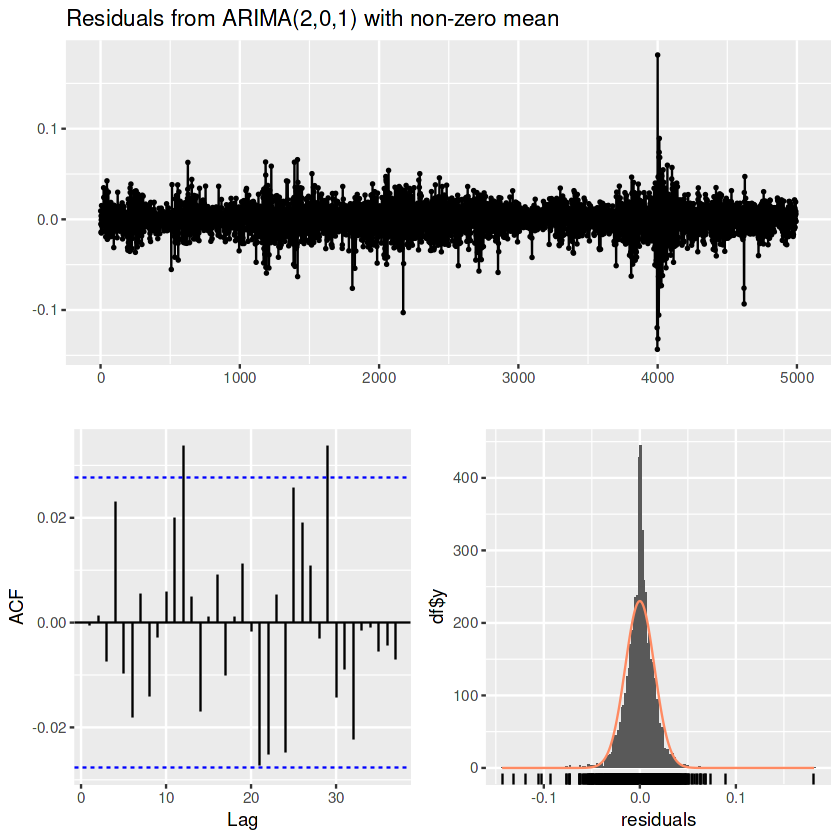


	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 7.2, df = 8, p-value = 0.5152

Model df: 2.   Total lags used: 10



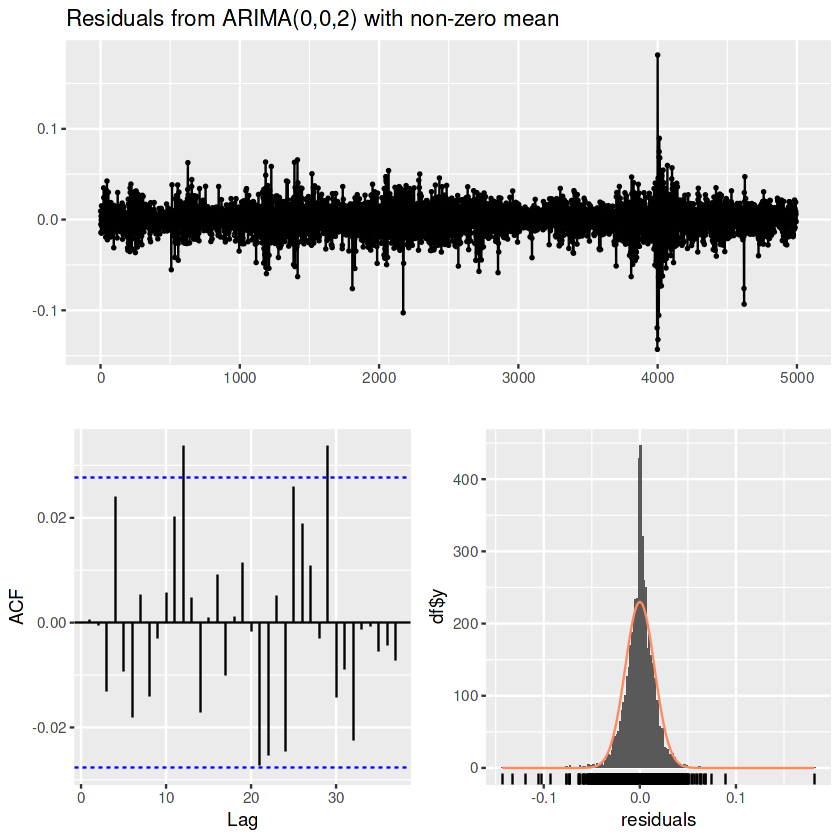


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with non-zero mean
Q* = 6.8362, df = 7, p-value = 0.4461

Model df: 3.   Total lags used: 10



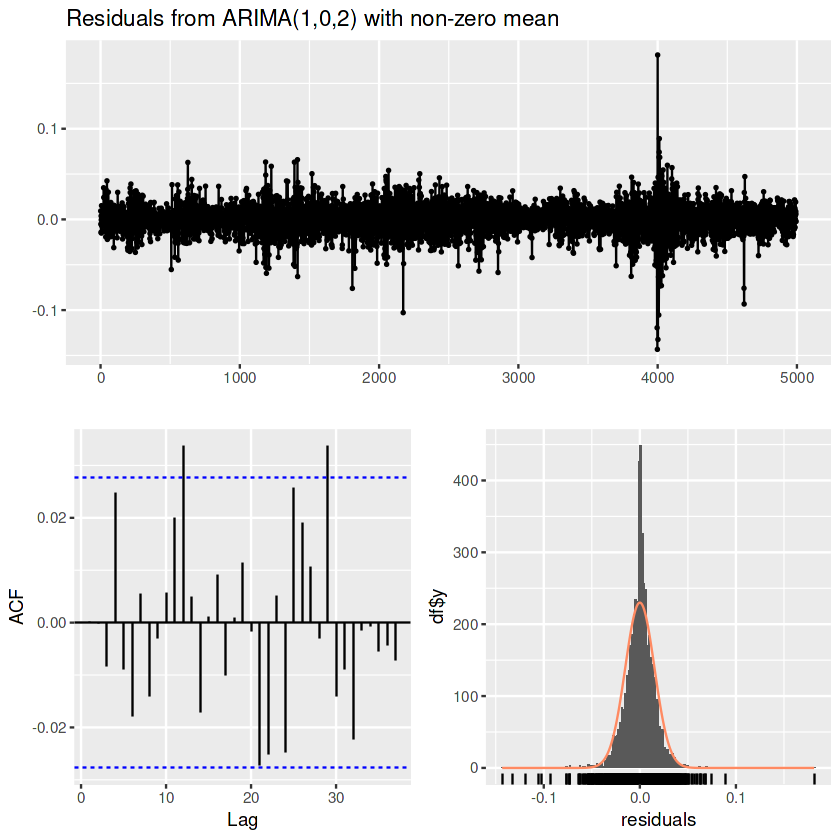


	Ljung-Box test

data:  Residuals from ARIMA(2,0,2) with non-zero mean
Q* = 5.2049, df = 6, p-value = 0.5178

Model df: 4.   Total lags used: 10



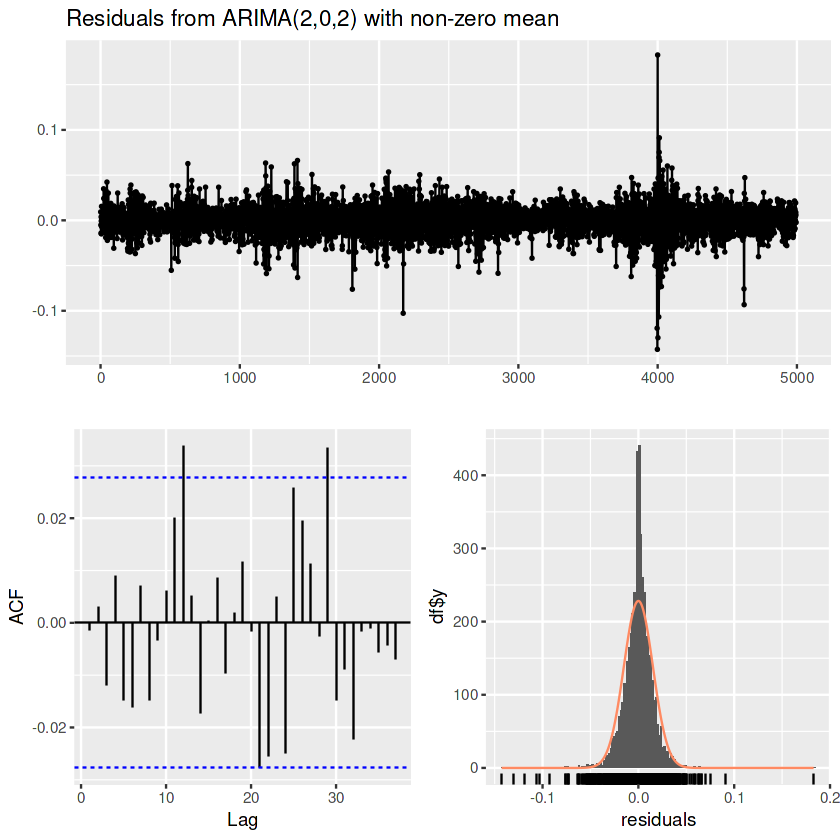

In [158]:
checkresiduals(sugar_arma1)
checkresiduals(sugar_arma2)
checkresiduals(sugar_arma3)

checkresiduals(sugar_arma4)
checkresiduals(sugar_arma5)
checkresiduals(sugar_arma6)

checkresiduals(sugar_arma7)
checkresiduals(sugar_arma8)
checkresiduals(sugar_arma9)

In [159]:
opt_fit <- auto.arima(sugar_train)
opt_fit

Series: sugar_train 
ARIMA(0,0,2) with zero mean 

Coefficients:
          ma1      ma2
      -0.0533  -0.0518
s.e.   0.0141   0.0138

sigma^2 = 0.000231:  log likelihood = 13822.12
AIC=-27638.24   AICc=-27638.24   BIC=-27618.7

In [160]:
# models with acceptable p-value
sugar_arma3
sugar_arma4
sugar_arma6
sugar_arma7 # <- best BIC
sugar_arma8
sugar_arma9 


Series: sugar_train 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
          ar1      ar2    mean
      -0.0517  -0.0552  -1e-04
s.e.   0.0141   0.0141   2e-04

sigma^2 = 0.0002311:  log likelihood = 13822.11
AIC=-27636.23   AICc=-27636.22   BIC=-27610.16

Series: sugar_train 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1    mean
      -0.0551  -1e-04
s.e.   0.0150   2e-04

sigma^2 = 0.0002317:  log likelihood = 13815.22
AIC=-27624.44   AICc=-27624.43   BIC=-27604.89

Series: sugar_train 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1      ar2      ma1    mean
      0.1536  -0.0459  -0.2056  -1e-04
s.e.  0.1990   0.0187   0.1990   2e-04

sigma^2 = 0.0002311:  log likelihood = 13822.65
AIC=-27635.3   AICc=-27635.29   BIC=-27602.72

Series: sugar_train 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
          ma1      ma2    mean
      -0.0534  -0.0519  -1e-04
s.e.   0.0141   0.0138   2e-04

sigma^2 = 0.0002311:  log likelihood = 13822.24
AIC=-27636.48   AICc=-27636.47   BIC=-27610.41

Series: sugar_train 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1      ma1      ma2    mean
      0.0938  -0.1466  -0.0473  -1e-04
s.e.  0.2028   0.2023   0.0178   2e-04

sigma^2 = 0.0002311:  log likelihood = 13822.43
AIC=-27634.87   AICc=-27634.86   BIC=-27602.29

Series: sugar_train 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1     ma2    mean
      0.2887  -0.2900  -0.3398  0.2494  -1e-04
s.e.  0.2560   0.1758   0.2587  0.1829   2e-04

sigma^2 = 0.0002311:  log likelihood = 13823.32
AIC=-27634.63   AICc=-27634.62   BIC=-27595.54

#### 4. If the series has a high correlation with another model, make an additional set of models that use the same set up as was tried in 3. but now using the ARIMAX model version using the predictions from the correlated model as an additional input to the models.

##### Sugar has no such time series

#### 5. For capturing volatility in the models an additional set of models are produced using the training data with GARCH and the model makeups from 3. and 4. as additional models to evaluate for performance in order to find the best model fit for the time series currently being investigated.

In [161]:
# Fit GARCH(1,1) model (simplest as the first GARCH model) and the arma order values found previously
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(0,2), include.mean = TRUE))

sugar_garch <- ugarchfit(spec, data = sugar_train)


#### 6. Using the test/evaluation set we now evaluate which of the models collected up to now that makes the best fit on the actual data. The best performing model will be chosen for predicting the extrapolated 200 point.

In [162]:
# We have 2 different models for sugar forecasting to be evaluated on the test set to find the best performing model for forecasting
sugar_arma9
sugar_garch

Series: sugar_train 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1     ma2    mean
      0.2887  -0.2900  -0.3398  0.2494  -1e-04
s.e.  0.2560   0.1758   0.2587  0.1829   2e-04

sigma^2 = 0.0002311:  log likelihood = 13823.32
AIC=-27634.63   AICc=-27634.62   BIC=-27595.54


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000282    0.000167   1.6889 0.091241
ma1    -0.040216    0.015199  -2.6460 0.008144
ma2     0.009653    0.014916   0.6472 0.517505
omega   0.000004    0.000001   3.1549 0.001605
alpha1  0.083451    0.007008  11.9077 0.000000
beta1   0.899187    0.007804 115.2245 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000282    0.000177  1.59489  0.11074
ma1    -0.040216    0.012944 -3.10699  0.00189
ma2     0.009653    0.014909  0.64748  0.51732
omega   0.000004    0.000006  0.70699  0.47957
alpha1  0.083451    0.011895  7.01583  0.00000
beta1   0.899187    0.021346 42.12370  0.00000

LogLike

#### How do the models perform on the test data

In [163]:
# Sugar ARMA evaluation on test data
pred_opt <- forecast(sugar_arma9,200) # create pred for 200 points to evaluatea against the test data (of size 200)
sugar_pred_values_arma <- as.numeric(pred_opt$mean)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
sugar_arma_mae <- mean(abs(sugar_test - sugar_pred_values_arma))
# Root Mean Squared Error
sugar_arma_rmse <- sqrt(mean((sugar_test - sugar_pred_values_arma)^2))

sugar_arma_aic <- AIC(sugar_arma9)
sugar_arma_bic <- BIC(sugar_arma9)

In [164]:
# Sugar GARCH evaluation on test data
sugar_garch_forecast <- ugarchforecast(sugar_garch, n.ahead = 200)
sugar_pred_values_garch <- as.numeric(fitted(sugar_garch_forecast))

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
sugar_garch_mae <- mean(abs(sugar_test - sugar_pred_values_garch))
# Root Mean Squared Error
sugar_garch_rmse <- sqrt(mean((sugar_test - sugar_pred_values_garch)^2))
ic <- infocriteria(sugar_garch)
sugar_garch_aic <- ic[1]
sugar_garch_bic <-ic[2]

In [165]:
rmse_values <- c(sugar_arma_rmse, sugar_garch_rmse)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(rmse_values)]
cat("Best model based on RMSE is:", best_model, "\n")

Best model based on RMSE is: GARCH 


In [166]:
mae_values <- c(sugar_arma_mae, sugar_garch_mae)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(mae_values)]
cat("Best model based on MAE is:", best_model, "\n")

Best model based on MAE is: GARCH 


In [167]:
aic_values <- c(sugar_arma_aic, sugar_garch_aic)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(aic_values)]
cat("Best model based on AIC is:", best_model, "\n")

Best model based on AIC is: ARMA 


In [168]:
bic_values <- c(sugar_arma_bic, sugar_garch_bic)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(bic_values)]
cat("Best model based on BIC is:", best_model, "\n")

Best model based on BIC is: ARMA 


Best sugar model by majority: tie garch/arma

## Tranquility

In [169]:
# for acf and pacf plots we once again use interpolated values for the scattered NA values
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
for (i in c(36,1194,2836,3430,4118)) {
  data[c(i-1,i,i+1),] <- na.approx(data[c(i-1,i,i+1),])   
}
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))

In [170]:
tranquility_lr <- data_lr[,16]    # tranquility

which(is.na(tranquility_lr))    #Looking for missing values in tranquility

[1]    1 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412
 [16] 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427
 [31] 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442
 [46] 1443 1444 1445 1446 1447 1448 1449 5257 5258 5259 5260 5261 5262 5263 5264
 [61] 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279
 [76] 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294
 [91] 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309
[106] 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324
[121] 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339
[136] 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354
[151] 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369
[166] 5370 5371 5372 5373 5374 5375 5376 5377 5378 5379 5380 5381 5382 5383 5384
[181] 5385 5386 5387 5388 5389 5390 5391 5392 5393 5394 5395 5396 5397 5398 5399
[196] 5400 5401 5402 5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414
[211] 5415 5416 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429
[226] 5430 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444
[241] 5445 5446 5447 5448 5449 5450 5451 5452 5453 5454 5455 5456

Since we in this first run only want to use observed data (no interpolated values) we choose to only model the continuous subsections for the 2 time series. We therefore chop off the time periods with data gaps.

In [171]:
# Create a data frame for smoothly omitting the nan where they occur in any of the time series

tranquility_clean <- na.omit(tranquility_lr)

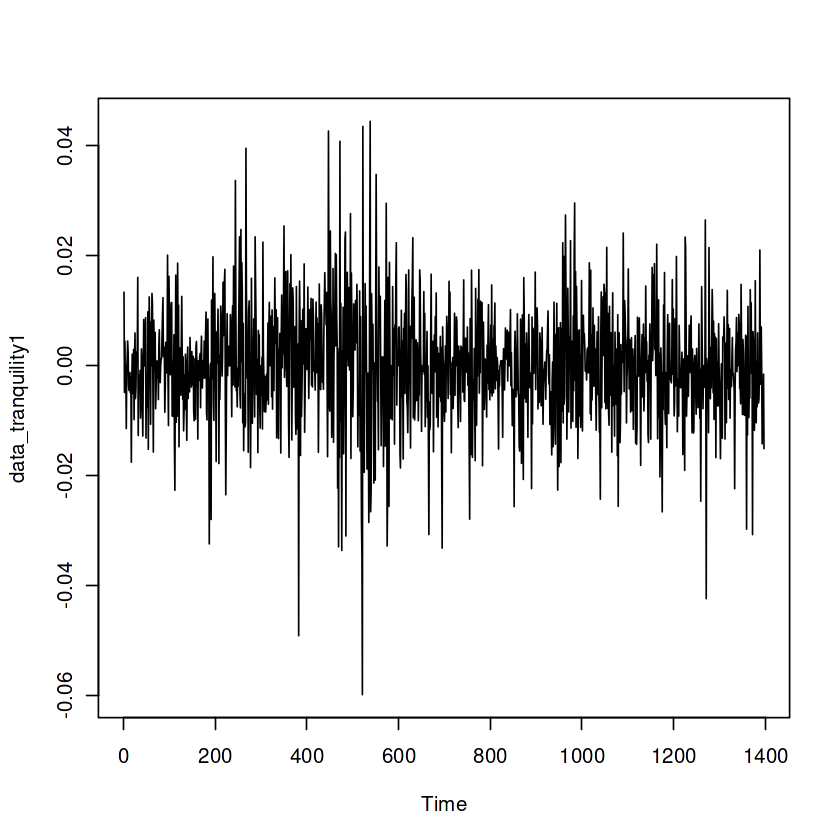

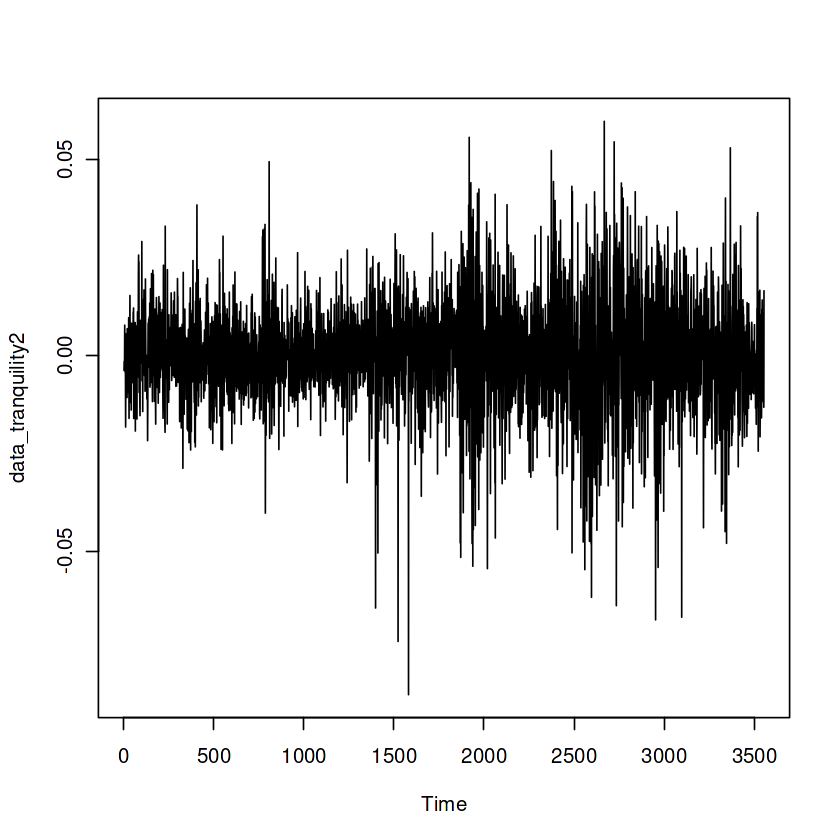

In [172]:
data_tranquility1 <- tranquility_clean[2:1398]   #Creating object consisting of values before the NA gap at the endo of the t.s.
data_tranquility2 <- tranquility_clean[1450:5004]   #Creating object consisting of values before the NA gap at the endo of the t.s.

plot.ts(data_tranquility1)   
plot.ts(data_tranquility2)

#### 1. Split into train/test/eval for the model fitting and evaluation of the best model approach

In [173]:
index <- 1:(5204 - 200) # to get 200 obs of gurkor in test 

tranquility_train <- tranquility_clean[index]
tranquility_test <- tranquility_clean[-index] 

#### 2. Look at the ACF and PACF for what param. values for q and p to try out during the model fittings

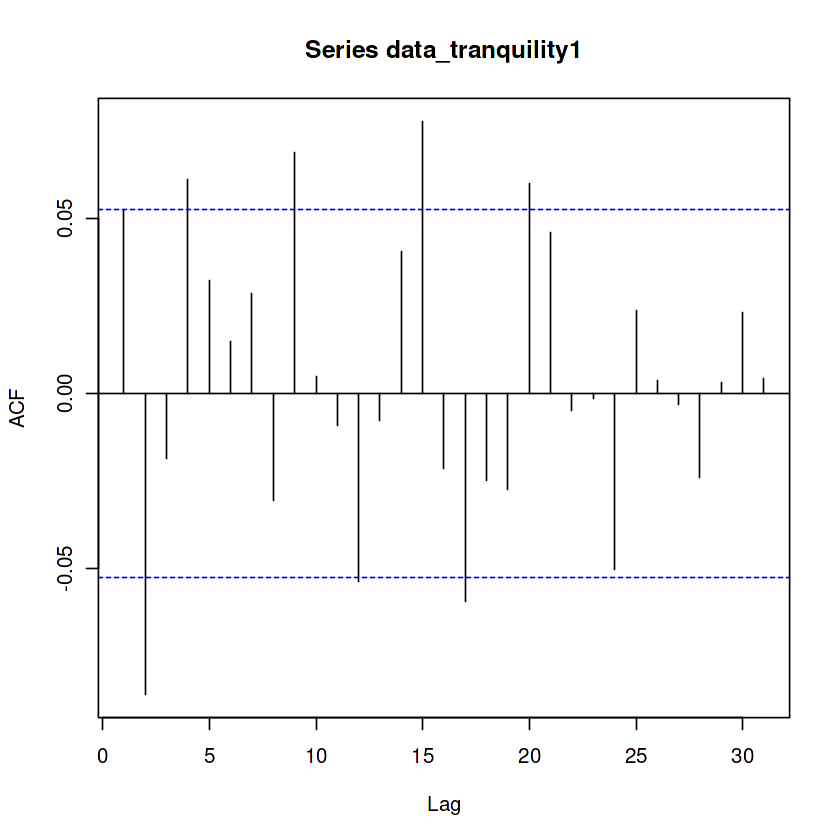

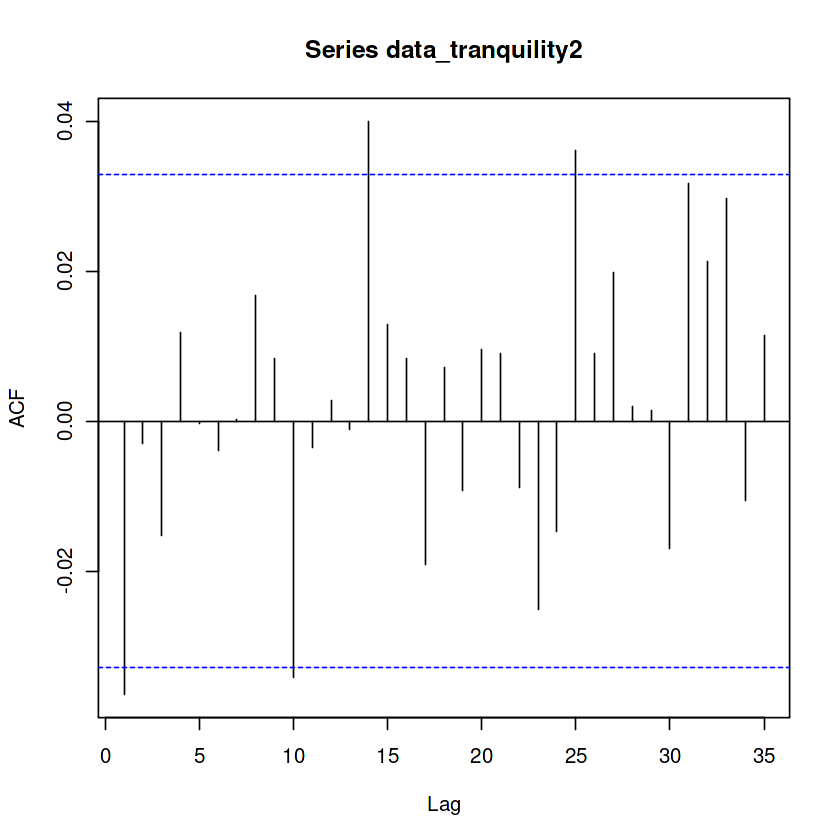

In [174]:
# ACF for tranquility (looking at the time series before and after the nan gap separately)
acf(data_tranquility1)     
acf(data_tranquility2)

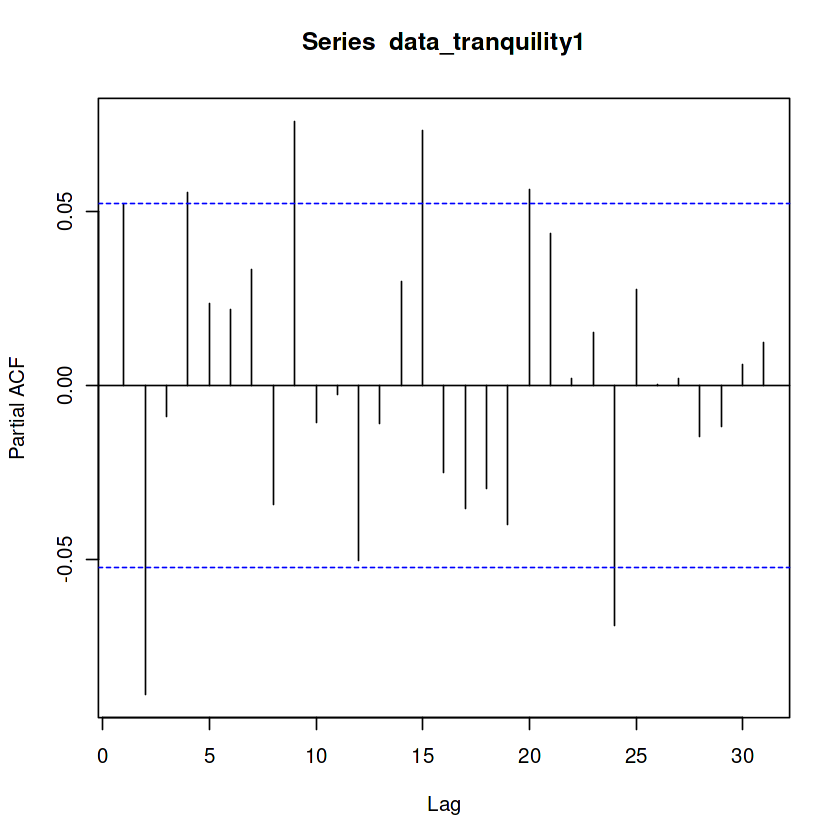

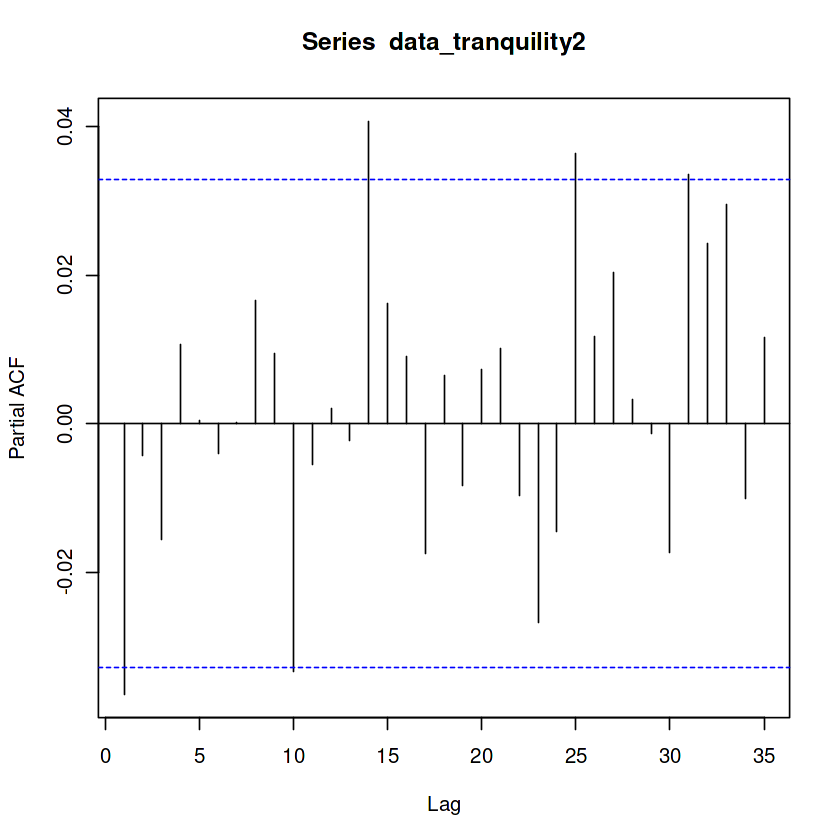

In [175]:
# PACF for tranquility (looking at the time series before and after the nan gap separately)
pacf(data_tranquility1)     #Looking at pacf
pacf(data_tranquility2)     #Looking at pacf

In [176]:
# now after the acf and pacf plots we redo the cleaning and we replace the outliers with values > 100 by Nan
data[c(36,1194,2836,3430,4118),-c(1,2)] <- NA
data_lr <- data %>%
  arrange(day) %>%  # Ensure the data is ordered by date
  mutate(across(-c(X, day), ~ log(. / lag(.)), .names = "log_return_{.col}"))
tranquility_lr <- data_lr[,16]    #tranquility

tranquility_clean <- na.omit(tranquility_lr)

index <- 1:(5194 - 200) # to get 200 obs of tranquility in test 
tranquility_train <- tranquility_clean[index]
tranquility_test <- tranquility_clean[-index] 



- q={0,1,2},
- p={0,1,2},
- d=0 (since we already differentiated by taking the log-returns of the time series)

#### As the ADF tests conducted had that all series with the log return transformation were stationary we can assume stationarity

#### 3. Train/fit the models on the training data 


In [177]:
tranquility_arma1 <- Arima(tranquility_train, order = c(0,0,0))
tranquility_arma2 <- Arima(tranquility_train, order = c(1,0,0))
tranquility_arma3 <- Arima(tranquility_train, order = c(2,0,0))

tranquility_arma4 <- Arima(tranquility_train, order = c(0,0,1))
tranquility_arma5 <- Arima(tranquility_train, order = c(1,0,1))
tranquility_arma6 <- Arima(tranquility_train, order = c(2,0,1))

tranquility_arma7 <- Arima(tranquility_train, order = c(0,0,2))
tranquility_arma8 <- Arima(tranquility_train, order = c(1,0,2))
tranquility_arma9 <- Arima(tranquility_train, order = c(2,0,2))


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 10.66, df = 10, p-value = 0.3846

Model df: 0.   Total lags used: 10



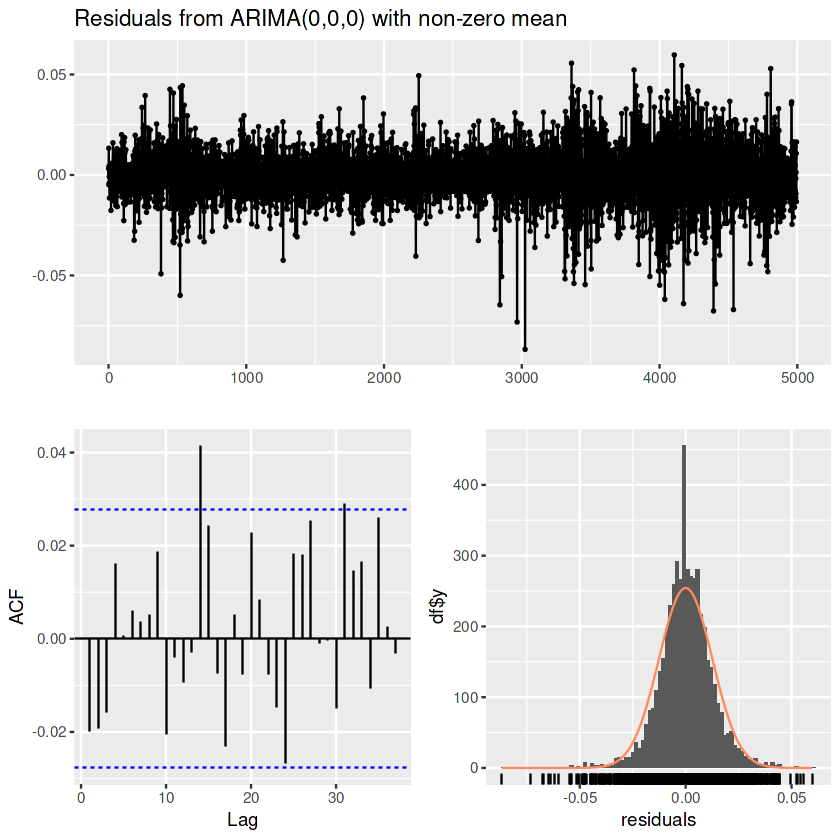


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 8.7284, df = 9, p-value = 0.4627

Model df: 1.   Total lags used: 10



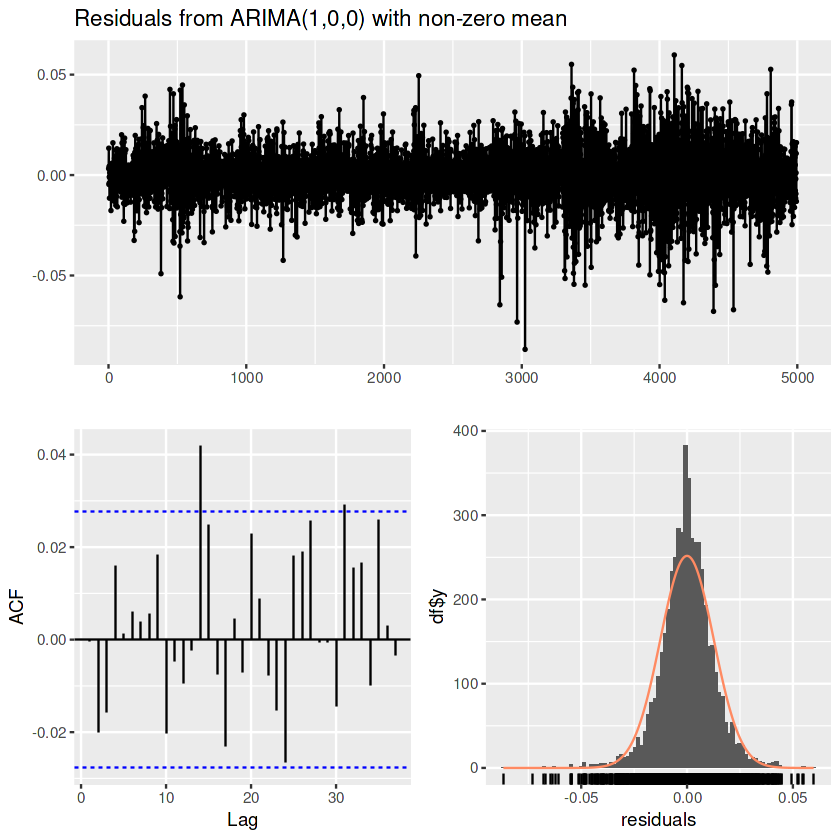


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 6.7837, df = 8, p-value = 0.5601

Model df: 2.   Total lags used: 10



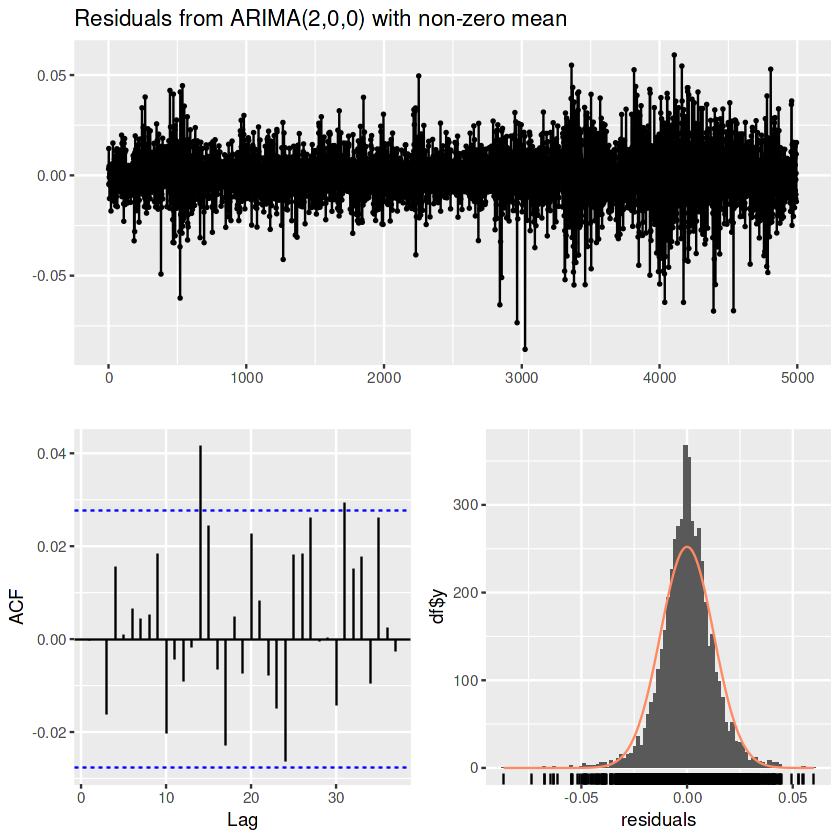


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 8.644, df = 9, p-value = 0.4708

Model df: 1.   Total lags used: 10



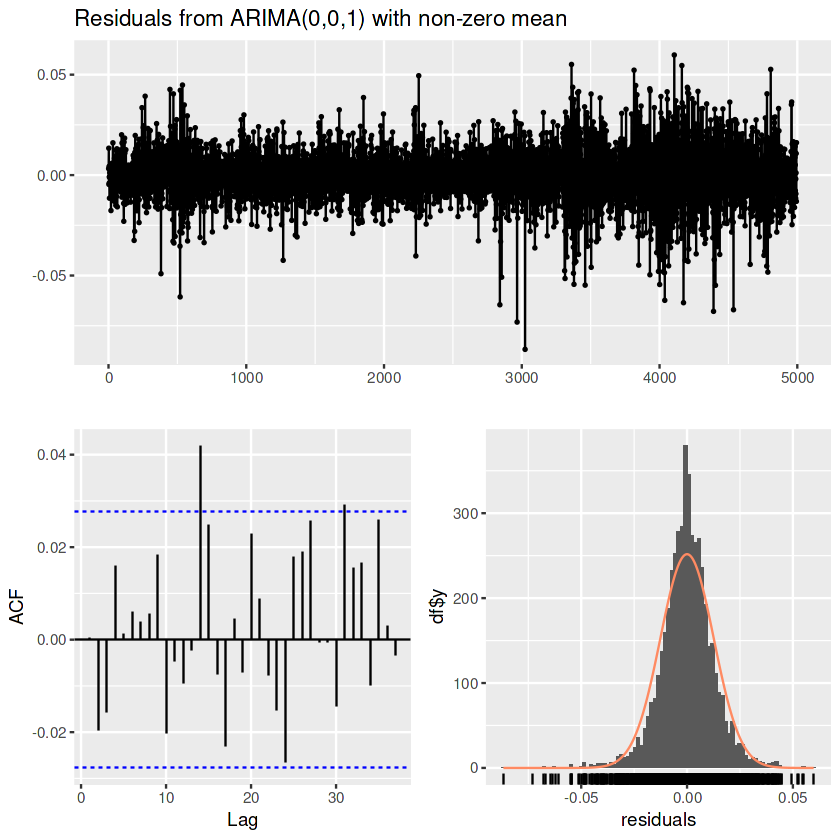


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 6.9727, df = 8, p-value = 0.5396

Model df: 2.   Total lags used: 10



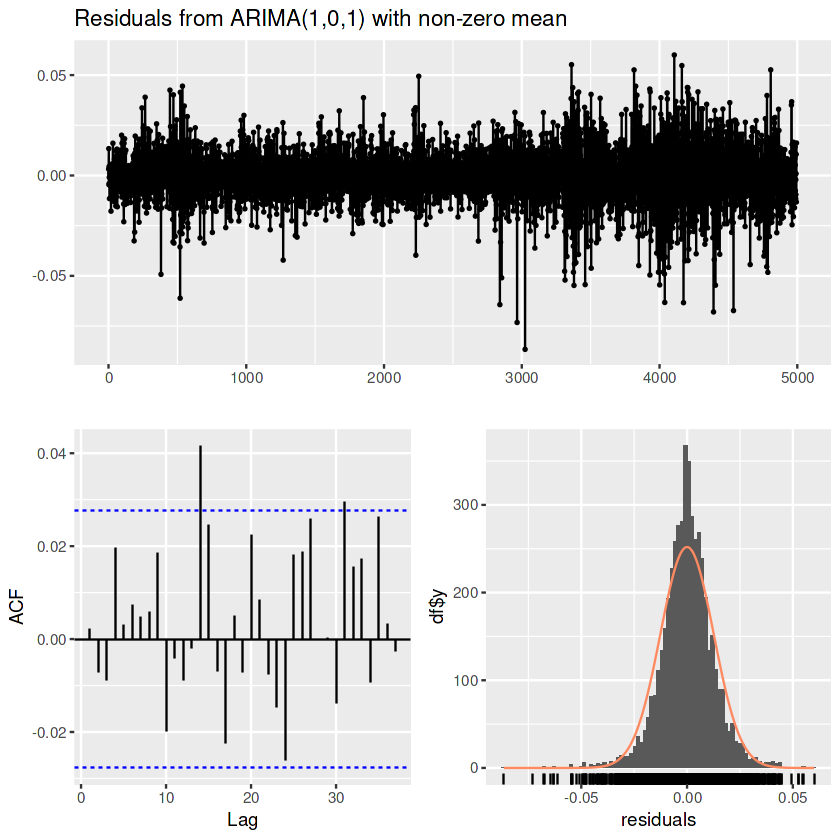


	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with non-zero mean
Q* = 6.2578, df = 7, p-value = 0.51

Model df: 3.   Total lags used: 10



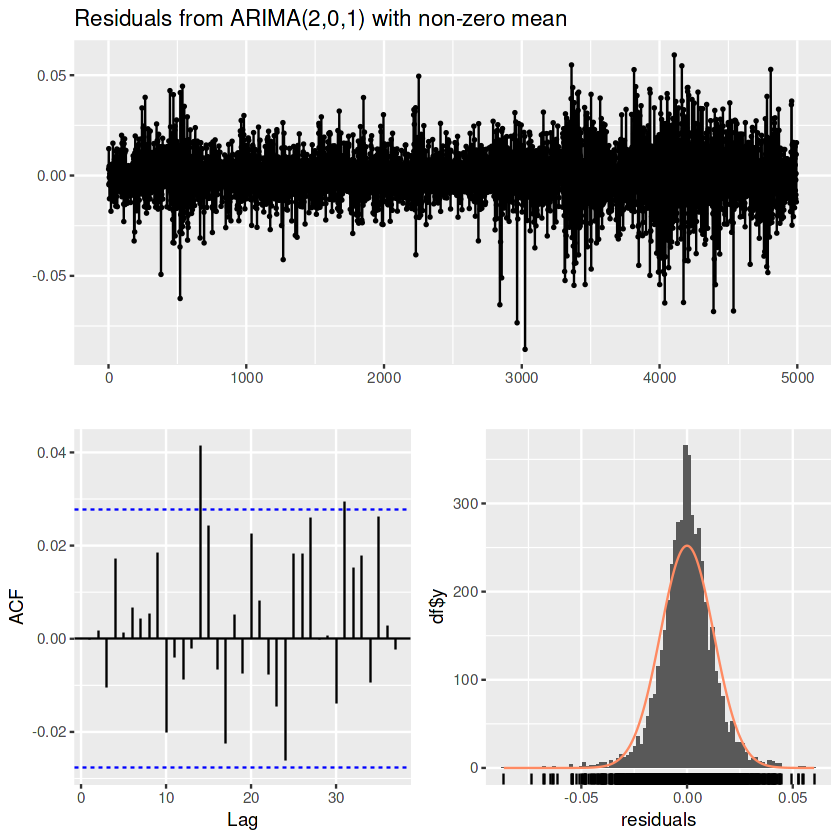


	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 6.707, df = 8, p-value = 0.5685

Model df: 2.   Total lags used: 10



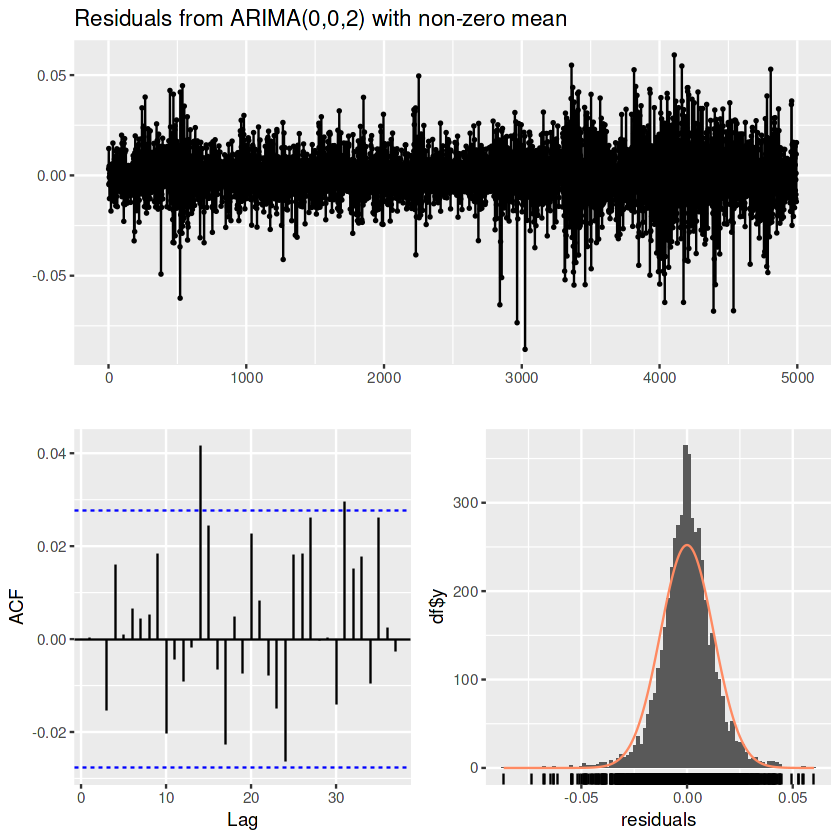


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with non-zero mean
Q* = 6.393, df = 7, p-value = 0.4947

Model df: 3.   Total lags used: 10



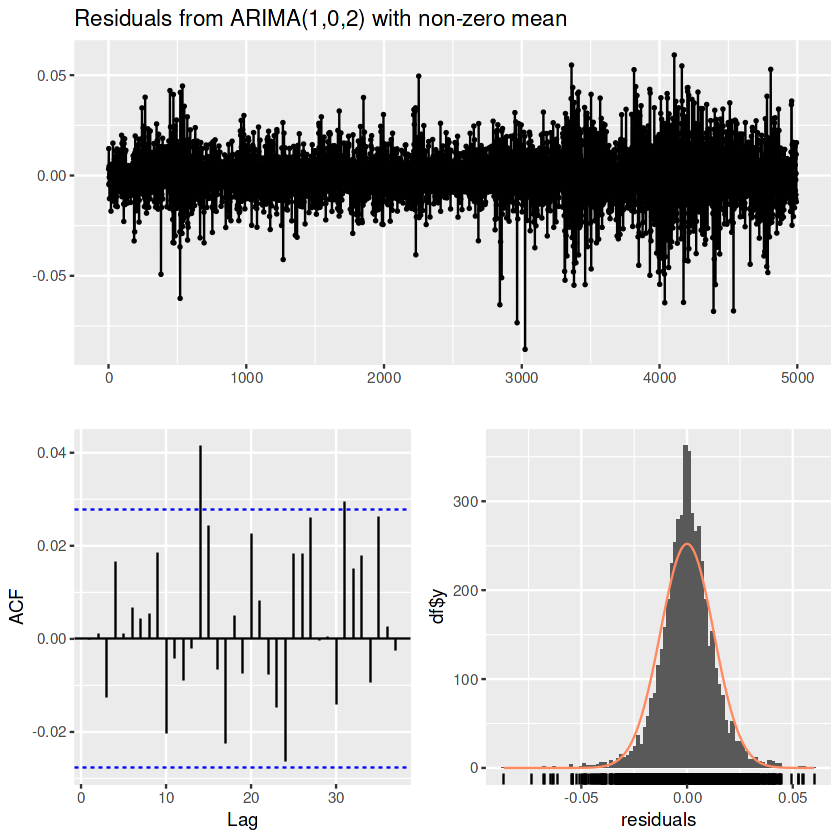


	Ljung-Box test

data:  Residuals from ARIMA(2,0,2) with non-zero mean
Q* = 6.7442, df = 6, p-value = 0.3452

Model df: 4.   Total lags used: 10



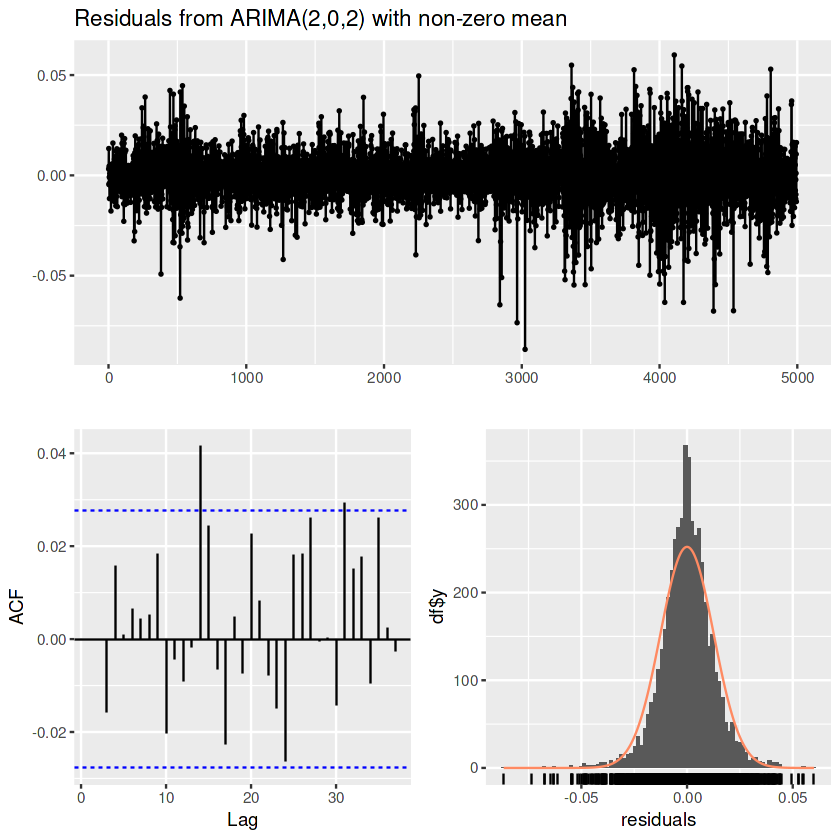

In [178]:

checkresiduals(tranquility_arma1)
checkresiduals(tranquility_arma2)
checkresiduals(tranquility_arma3)

checkresiduals(tranquility_arma4)
checkresiduals(tranquility_arma5)
checkresiduals(tranquility_arma6)

checkresiduals(tranquility_arma7)
checkresiduals(tranquility_arma8)
checkresiduals(tranquility_arma9)

In [179]:
opt_fit <- auto.arima(tranquility_train)
opt_fit

Series: tranquility_train 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.000159:  log likelihood = 14754.36
AIC=-29506.73   AICc=-29506.72   BIC=-29500.21

In [180]:
tranquility_arma1 # looks to possibly have the best BIC AIC combination
tranquility_arma2
tranquility_arma3
tranquility_arma4
tranquility_arma5
tranquility_arma6
tranquility_arma7
tranquility_arma8
tranquility_arma9

Series: tranquility_train 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
       mean
      1e-04
s.e.  2e-04

sigma^2 = 0.000159:  log likelihood = 14754.45
AIC=-29504.9   AICc=-29504.9   BIC=-29491.87

Series: tranquility_train 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1   mean
      -0.0199  1e-04
s.e.   0.0141  2e-04

sigma^2 = 0.000159:  log likelihood = 14755.44
AIC=-29504.88   AICc=-29504.87   BIC=-29485.33

Series: tranquility_train 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
          ar1      ar2   mean
      -0.0203  -0.0197  1e-04
s.e.   0.0141   0.0142  2e-04

sigma^2 = 0.0001589:  log likelihood = 14756.41
AIC=-29504.82   AICc=-29504.81   BIC=-29478.75

Series: tranquility_train 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1   mean
      -0.0207  1e-04
s.e.   0.0144  2e-04

sigma^2 = 0.000159:  log likelihood = 14755.48
AIC=-29504.96   AICc=-29504.95   BIC=-29485.41

Series: tranquility_train 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1   mean
      0.5362  -0.5588  1e-04
s.e.  0.2572   0.2509  2e-04

sigma^2 = 0.000159:  log likelihood = 14756.29
AIC=-29504.57   AICc=-29504.56   BIC=-29478.51

Series: tranquility_train 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1      ar2      ma1   mean
      0.2502  -0.0160  -0.2707  1e-04
s.e.  0.3608   0.0169   0.3608  2e-04

sigma^2 = 0.000159:  log likelihood = 14756.67
AIC=-29503.33   AICc=-29503.32   BIC=-29470.75

Series: tranquility_train 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
          ma1      ma2   mean
      -0.0209  -0.0193  1e-04
s.e.   0.0141   0.0139  2e-04

sigma^2 = 0.0001589:  log likelihood = 14756.44
AIC=-29504.89   AICc=-29504.88   BIC=-29478.82

Series: tranquility_train 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1      ma1      ma2   mean
      0.1401  -0.1606  -0.0177  1e-04
s.e.  0.4101   0.4099   0.0156  2e-04

sigma^2 = 0.000159:  log likelihood = 14756.6
AIC=-29503.2   AICc=-29503.19   BIC=-29470.62

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: tranquility_train 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
          ar1      ar2      ma1      ma2   mean
      -0.0099  -0.0096  -0.0106  -0.0099  1e-04
s.e.      NaN      NaN      NaN      NaN  2e-04

sigma^2 = 0.000159:  log likelihood = 14756.43
AIC=-29500.85   AICc=-29500.84   BIC=-29461.76

#### 4. If the series has a high correlation with another model, make an additional set of models that use the same set up as was tried in 3. but now using the ARIMAX model version using the predictions from the correlated model as an additional input to the models.

##### Tranquility has no such time series

#### 5. For capturing volatility in the models an additional set of models are produced using the training data with GARCH and the model makeups from 3. and 4. as additional models to evaluate for performance in order to find the best model fit for the time series currently being investigated 

In [181]:
# Fit GARCH(1,1) model (simplest as the first GARCH model) using the arma orders found previously
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(0,0), include.mean = TRUE))
tranquility_garch <- ugarchfit(spec, data = tranquility_train)

#### 6. Using the test/evaluation set we now evaluate which of the models collected up to now that makes the best fit on the actual data. The best performing model will be chosen for predicting the extrapolated 200 point.

In [182]:
# We have 2 different models for tranquility forecasting to be evaluated on the test set to find the best performing model for forecasting
tranquility_arma1
tranquility_garch

Series: tranquility_train 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
       mean
      1e-04
s.e.  2e-04

sigma^2 = 0.000159:  log likelihood = 14754.45
AIC=-29504.9   AICc=-29504.9   BIC=-29491.87


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu     -0.000053    0.000151  -0.35204  0.72481
omega   0.000001    0.000000   2.69972  0.00694
alpha1  0.045885    0.005180   8.85872  0.00000
beta1   0.946445    0.005761 164.28635  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000053    0.000168 -0.31712  0.75115
omega   0.000001    0.000002  0.56643  0.57110
alpha1  0.045885    0.034053  1.34746  0.17783
beta1   0.946445    0.035673 26.53145  0.00000

LogLikelihood : 15173.68 

Information Criteria
------------------------------------
                    
Akaike       -6.0752
Bayes        -6.0699
Shibata      -6.0752
Hannan-Quinn -6.0733


#### How do the models perform on the test data

In [183]:
# Tranquility ARMA evaluation on test data
pred_opt <- forecast(tranquility_arma1,200) # create pred for 200 points to evaluatea against the test data (of size 200)
tranquility_pred_values_arma <- as.numeric(pred_opt$mean)

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
tranquility_arma_mae <- mean(abs(tranquility_test - tranquility_pred_values_arma))
# Root Mean Squared Error
tranquility_arma_rmse <- sqrt(mean((tranquility_test - tranquility_pred_values_arma)^2))

tranquility_arma_aic <- AIC(tranquility_arma1)
tranquility_arma_bic <- BIC(tranquility_arma1)

In [184]:
# Tranquility GARCH evaluation on test data
tranquility_garch_forecast <- ugarchforecast(tranquility_garch, n.ahead = 200)
tranquility_pred_values_garch <- as.numeric(fitted(tranquility_garch_forecast))

# since both the test set and the forecasted values are on the log-return scale no transformations are needed before any evaluationmetric computations
# Mean Absolute Error 
tranquility_garch_mae <- mean(abs(tranquility_test - tranquility_pred_values_garch))
# Root Mean Squared Error
tranquility_garch_rmse <- sqrt(mean((tranquility_test - tranquility_pred_values_garch)^2))
ic <- infocriteria(tranquility_garch)
tranquility_garch_aic <- ic[1]
tranquility_garch_bic <- ic[2]

In [185]:
rmse_values <- c(tranquility_arma_rmse, tranquility_garch_rmse)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(rmse_values)]
cat("Best model based on RMSE is:", best_model, "\n")

Best model based on RMSE is: ARMA 


In [186]:
mae_values <- c(tranquility_arma_mae,tranquility_garch_mae)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(mae_values)]
cat("Best model based on MAE is:", best_model, "\n")

Best model based on MAE is: GARCH 


In [188]:
aic_values <- c(tranquility_arma_aic,tranquility_garch_aic)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(aic_values)]
cat("Best model based on AIC is:", best_model, "\n")

Best model based on AIC is: ARMA 


In [189]:
bic_values <- c(tranquility_arma_bic,tranquility_garch_bic)

model_names <- c("ARMA", "GARCH")
best_model <- model_names[which.min(bic_values)]
cat("Best model based on BIC is:", best_model, "\n")

Best model based on BIC is: ARMA 


Best tranquility model by majority: ARMA